Data Loading

In [ ]:
#! pip install kaggle
#! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d csafrit2/plant-leaves-for-image-classification

100% 6.56G/6.56G [00:51<00:00, 168MB/s]
100% 6.56G/6.56G [00:51<00:00, 137MB/s]


In [ ]:
!unzip /content/plant-leaves-for-image-classification.zip

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
import torch
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings("ignore")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
import numpy as np
import torch
from torchvision import transforms
from torchvision.datasets.folder import ImageFolder
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import time
from tqdm import tqdm
from timeit import default_timer as timer
import tensorflow as tf
import torch
import warnings
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from tqdm import tqdm
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
warnings.filterwarnings("ignore")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
import pathlib
data_dir = '/content/Plants_2/train//'
data_dir = pathlib.Path(data_dir)
path = data_dir
path

PosixPath('/content/Plants_2/train')

In [ ]:
folder_list = ['Alstonia Scholaris diseased (P2a)','Alstonia Scholaris healthy (P2b)','Arjun diseased (P1a)',
              'Arjun healthy (P1b)','Bael diseased (P4b)','Basil healthy (P8)','Chinar diseased (P11b)','Chinar healthy (P11a)',
              'Gauva diseased (P3b)','Gauva healthy (P3a)','Jamun diseased (P5b)','Jamun healthy (P5a)','Jatropha diseased (P6b)',
              'Jatropha healthy (P6a)','Lemon diseased (P10b)','Lemon healthy (P10a)','Mango diseased (P0b)','Mango healthy (P0a)',
              'Pomegranate diseased (P9b)','Pomegranate healthy (P9a)','Pongamia Pinnata diseased (P7b)','Pongamia Pinnata healthy (P7a)']

In [ ]:
x = []
y = []
#data_dir.glob('Alstonia Scholaris diseased (P2a)/*')
i = 1
for folder in folder_list:
    string = folder + '/*'
    images = list(data_dir.glob(string))
    for img in images:
        pic = cv2.resize(cv2.imread(str(img)),(64,64))
        x.append(pic) 
        y.append(folder)
    print(f'Folder {i} complete.\n')
    i = i+1

Folder 1 complete.

Folder 2 complete.

Folder 3 complete.

Folder 4 complete.

Folder 5 complete.

Folder 6 complete.

Folder 7 complete.

Folder 8 complete.

Folder 9 complete.

Folder 10 complete.

Folder 11 complete.

Folder 12 complete.

Folder 13 complete.

Folder 14 complete.

Folder 15 complete.

Folder 16 complete.

Folder 17 complete.

Folder 18 complete.

Folder 19 complete.

Folder 20 complete.

Folder 21 complete.

Folder 22 complete.



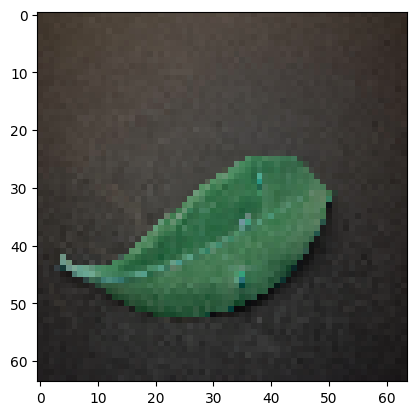

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
x = np.array(x,dtype='float32')
x = x/255
plt.imshow(x[0])

In [ ]:
height = 64
width = 64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.30)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test,test_size=0.66)
print(x_train.shape,x_val.shape,x_test.shape)

(2991, 64, 64, 3) (436, 64, 64, 3) (847, 64, 64, 3)


In [ ]:
a = torch.tensor(x_train)
b = torch.tensor(y_train)
c = torch.tensor(x_test)
d = torch.tensor(y_test)
e = torch.tensor(x_val)
f = torch.tensor(y_val)
d = d.type(torch.LongTensor)
b = b.type(torch.LongTensor)
f = f.type(torch.LongTensor)
a =a.reshape(2991,3,height,width)
c = c.reshape(847,3,height,width)
e = e.reshape(436,3,height,width)
print(a.shape)
print(c.shape)
print(e.shape)
from torch.utils.data import TensorDataset,DataLoader
tensor_data1 = TensorDataset(a,b)
tensor_data2 = TensorDataset(c,d)
tensor_data3 = TensorDataset(e,f)
teacher_loader = DataLoader(tensor_data1,shuffle=1,batch_size=128)
test_loader = DataLoader(tensor_data2,shuffle=1,batch_size=128)
val_loader = DataLoader(tensor_data3,shuffle=1,batch_size=128)

torch.Size([2991, 3, 64, 64])
torch.Size([847, 3, 64, 64])
torch.Size([436, 3, 64, 64])


# Teacher Traning

In [ ]:
tmodel = torchvision.models.densenet121()
tmodel.classifier = nn.Linear(in_features=1024, out_features=22, bias=True)
for name, child in tmodel.named_children():
   if name in ['features','avgpool','classifier']:
       print(name + ' is unfrozen')
       for param in child.parameters():
           param.requires_grad = True
   else:
       print(name + ' is frozen')
       for param in child.parameters():
           param.requires_grad = False
optimizer2 = torch.optim.Adadelta(filter(lambda p: p.requires_grad, tmodel.parameters()), lr=0.05)
#optimizer2 = torch.optim.SGD(model.parameters(), lr=0.5)
import time
from timeit import default_timer as timer
tmodel = tmodel.cuda()

features is unfrozen
classifier is unfrozen


In [ ]:
train_loss = []
val_los = []
train_acc = []
val_acc = []
for i in range(10):
        l1 = []
        l2 = []
        a1 = []
        a2 = []
        start = timer()
        for img,labels in tqdm(teacher_loader, desc='Training', unit=' unit',leave=False,colour='red'):
            



           # print(end - start)
            
            
            
            img = img.to(device)
            labels = labels.to(device)
            output = tmodel(img)
            probs = F.softmax(output,dim=1)
            max_prob,preds = torch.max(probs,dim=1)
            acc1 = (torch.sum(preds == labels).item() / len(preds))
            
            
            #accu=[]
            a1.append(acc1)
            #gg = np.mean(accu)
            
            loss = nn.CrossEntropyLoss()(output,labels)
            l1.append(loss.item())
            loss.backward()
            optimizer2.step()
            optimizer2.zero_grad()
            
        for a,b in tqdm(val_loader, desc='Training', unit=' unit',leave=False,colour='red'):
                a = a.to(device)
                b = b.to(device)
                rr = tmodel(a)
                val_loss = nn.CrossEntropyLoss()(rr,b)
                l2.append(val_loss.item())
                probs = F.softmax(rr,dim=1)
                max_prob,preds = torch.max(probs,dim=1)
                acc = (torch.sum(preds == b).item() / len(preds))
                a2.append(acc)
        train_loss.append(np.mean(l1))
        val_los.append(np.mean(l2))
        train_acc.append(np.mean(a1))
        val_acc.append(np.mean(a2))
        end = timer()
        time = end - start
        time = time/60
        print(f'Epoch {i+1}/10: Train Loss==> {np.mean(l1):.2f} Val Loss==> {np.mean(l2):.2f} Train_Acc==> {np.mean(a1):.2f} Val_Acc==> {np.mean(a2):.2f}')   
        #print(i+1,loss,acc)

Epoch 1/10: Train Loss==> 2.67 Val Loss==> 2.35 Train_Acc==> 0.27 Val_Acc==> 0.35


Epoch 2/10: Train Loss==> 2.14 Val Loss==> 2.00 Train_Acc==> 0.42 Val_Acc==> 0.44


Epoch 3/10: Train Loss==> 1.80 Val Loss==> 1.73 Train_Acc==> 0.51 Val_Acc==> 0.51


Epoch 4/10: Train Loss==> 1.53 Val Loss==> 1.52 Train_Acc==> 0.60 Val_Acc==> 0.58


Epoch 5/10: Train Loss==> 1.28 Val Loss==> 1.28 Train_Acc==> 0.67 Val_Acc==> 0.64


Epoch 6/10: Train Loss==> 1.08 Val Loss==> 1.18 Train_Acc==> 0.71 Val_Acc==> 0.65


Epoch 7/10: Train Loss==> 0.93 Val Loss==> 0.99 Train_Acc==> 0.76 Val_Acc==> 0.74


Epoch 8/10: Train Loss==> 0.79 Val Loss==> 0.92 Train_Acc==> 0.79 Val_Acc==> 0.73


Epoch 9/10: Train Loss==> 0.68 Val Loss==> 0.89 Train_Acc==> 0.83 Val_Acc==> 0.72


Epoch 10/10: Train Loss==> 0.58 Val Loss==> 0.78 Train_Acc==> 0.85 Val_Acc==> 0.77


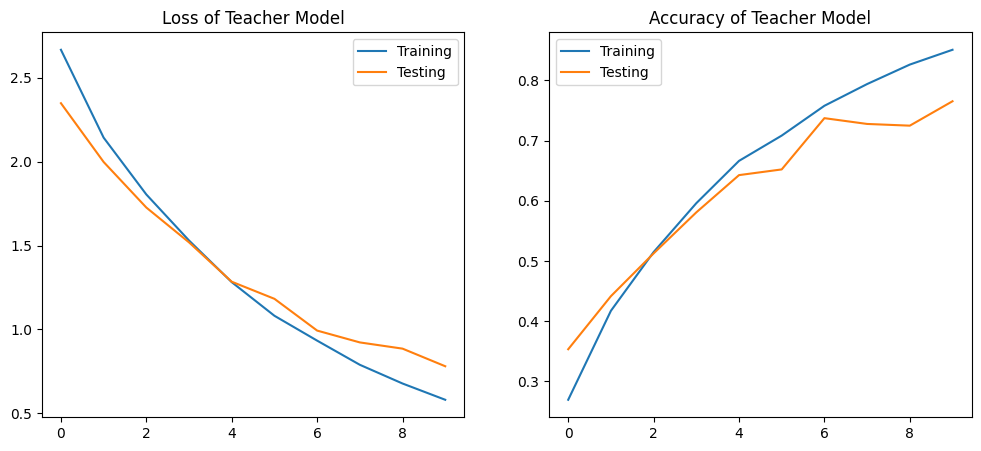

In [ ]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1, 2, 1)
  
# showing image
plt.plot(train_loss,label='Training')
plt.plot(val_los,label='Testing')
plt.legend()
plt.title("Loss of Teacher Model")
fig.add_subplot(1, 2, 2)
  
# showing image
plt.plot(train_acc,label='Training')
plt.plot(val_acc,label='Testing')
plt.legend()
plt.title("Accuracy of Teacher Model")
plt.show()


In [ ]:
import joblib
joblib.dump(tmodel, 'tmodel1.pkl')

['tmodel1.pkl']

In [ ]:
start = timer()
predictions = []
accu = []
l_act = []
i = 0
for images_test,labels_test in test_loader:
    #i = i+1```````````````````````````````
    images_test = images_test.to(device)
    labels_test = labels_test.to(device)
    ypred = tmodel(images_test)
    probs = F.softmax(ypred,dim=1)
    max_prob,preds = torch.max(probs,dim=1)
    #print(preds)
    #print(max_prob)
    acc = (torch.sum(preds == labels_test).item() / len(preds))
    accu.append(acc)
    predictions.append(preds)
    l_act.append(labels_test)
    
print(f'Accuracy of Teacher(Densenet121) is : {np.mean(accu):.2f}')
predictions = [t.cpu().numpy() for t in predictions]
predictions = np.array(np.concatenate(predictions))
pd.DataFrame(predictions).value_counts()
ytrue = [t.cpu().numpy() for t in l_act]
ytrue = np.array(np.concatenate(ytrue))
pd.DataFrame(ytrue).value_counts()
report = pd.DataFrame()
report['Actual'] = ytrue
report['Predicted'] = predictions
report['Actual1'] = le.inverse_transform(report['Actual'])
report['Predicted1'] = le.inverse_transform(report['Predicted'])
report5 = report.copy()
from sklearn.metrics import classification_report
print(classification_report(report['Actual1'], report['Predicted1']))

Accuracy of Teacher(Densenet121) is : 0.75
                                   precision    recall  f1-score   support

Alstonia Scholaris diseased (P2a)       0.64      0.94      0.76        50
 Alstonia Scholaris healthy (P2b)       0.86      0.56      0.68        34
             Arjun diseased (P1a)       0.75      0.76      0.75        50
              Arjun healthy (P1b)       0.81      0.69      0.74        42
              Bael diseased (P4b)       0.91      0.95      0.93        21
               Basil healthy (P8)       0.81      0.84      0.82        25
           Chinar diseased (P11b)       0.85      0.44      0.58        25
            Chinar healthy (P11a)       0.67      0.12      0.20        17
             Gauva diseased (P3b)       0.67      0.36      0.47        28
              Gauva healthy (P3a)       0.86      0.74      0.80        50
             Jamun diseased (P5b)       0.68      0.88      0.77        51
              Jamun healthy (P5a)       0.70      0.80  

In [ ]:
tmodel2 = torchvision.models.resnet101()
tmodel2.fc = nn.Linear(in_features=2048, out_features=22, bias=True)
for name, child in tmodel2.named_children():
   if name in ['conv1','layer1','layer2','layer3','layer4','fc']:
       print(name + ' is unfrozen')
       for param in child.parameters():
           param.requires_grad = True
   else:
       print(name + ' is frozen')
       for param in child.parameters():
           param.requires_grad = False
optimizer2 = torch.optim.Adadelta(filter(lambda p: p.requires_grad, tmodel2.parameters()), lr=0.4,weight_decay=0.0004)
#optimizer2 = torch.optim.SGD(model.parameters(), lr=0.5)
import time
from timeit import default_timer as timer
tmodel2 = tmodel2.cuda()

conv1 is unfrozen
bn1 is frozen
relu is frozen
maxpool is frozen
layer1 is unfrozen
layer2 is unfrozen
layer3 is unfrozen
layer4 is unfrozen
avgpool is frozen
fc is unfrozen


In [ ]:
train_loss = []
val_los = []
train_acc = []
val_acc = []
for i in range(15):
        l1 = []
        l2 = []
        a1 = []
        a2 = []
        start = timer()
        for img,labels in tqdm(teacher_loader, desc='Training', unit=' unit',leave=False,colour='red'):
            



           # print(end - start)
            
            
            
            img = img.to(device)
            labels = labels.to(device)
            output = tmodel2(img)
            probs = F.softmax(output,dim=1)
            max_prob,preds = torch.max(probs,dim=1)
            acc1 = (torch.sum(preds == labels).item() / len(preds))
            
            
            #accu=[]
            a1.append(acc1)
            #gg = np.mean(accu)
            
            loss = nn.CrossEntropyLoss()(output,labels)
            l1.append(loss.item())
            loss.backward()
            optimizer2.step()
            optimizer2.zero_grad()
            
        for a,b in tqdm(val_loader, desc='Training', unit=' unit',leave=False,colour='red'):
                a = a.to(device)
                b = b.to(device)
                rr = tmodel2(a)
                val_loss = nn.CrossEntropyLoss()(rr,b)
                l2.append(val_loss.item())
                probs = F.softmax(rr,dim=1)
                max_prob,preds = torch.max(probs,dim=1)
                acc = (torch.sum(preds == b).item() / len(preds))
                a2.append(acc)
        train_loss.append(np.mean(l1))
        val_los.append(np.mean(l2))
        train_acc.append(np.mean(a1))
        val_acc.append(np.mean(a2))
        end = timer()
        time = end - start
        time = time/60
        print(f'Epoch {i+1}/15: Train Loss==> {np.mean(l1):.2f} Val Loss==> {np.mean(l2):.2f} Train_Acc==> {np.mean(a1):.2f} Val_Acc==> {np.mean(a2):.2f}')   
        #print(i+1,loss,acc)

Epoch 1/15: Train Loss==> 3.28 Val Loss==> 2.55 Train_Acc==> 0.14 Val_Acc==> 0.16


Epoch 2/15: Train Loss==> 2.40 Val Loss==> 2.90 Train_Acc==> 0.26 Val_Acc==> 0.26


Epoch 3/15: Train Loss==> 2.20 Val Loss==> 2.51 Train_Acc==> 0.33 Val_Acc==> 0.38


Epoch 4/15: Train Loss==> 1.74 Val Loss==> 1.79 Train_Acc==> 0.45 Val_Acc==> 0.42


Epoch 5/15: Train Loss==> 1.53 Val Loss==> 2.03 Train_Acc==> 0.50 Val_Acc==> 0.48


Epoch 6/15: Train Loss==> 1.26 Val Loss==> 1.98 Train_Acc==> 0.60 Val_Acc==> 0.48


Epoch 7/15: Train Loss==> 1.07 Val Loss==> 1.87 Train_Acc==> 0.65 Val_Acc==> 0.47


Epoch 8/15: Train Loss==> 0.97 Val Loss==> 1.38 Train_Acc==> 0.69 Val_Acc==> 0.55


Epoch 9/15: Train Loss==> 0.89 Val Loss==> 1.03 Train_Acc==> 0.72 Val_Acc==> 0.70


Epoch 10/15: Train Loss==> 0.79 Val Loss==> 1.64 Train_Acc==> 0.78 Val_Acc==> 0.55


Epoch 11/15: Train Loss==> 0.69 Val Loss==> 1.69 Train_Acc==> 0.80 Val_Acc==> 0.60


Epoch 12/15: Train Loss==> 0.71 Val Loss==> 0.86 Train_Acc==> 0.80 Val_Acc==> 0.74


Epoch 13/15: Train Loss==> 0.65 Val Loss==> 2.07 Train_Acc==> 0.82 Val_Acc==> 0.54


Epoch 14/15: Train Loss==> 0.52 Val Loss==> 1.89 Train_Acc==> 0.84 Val_Acc==> 0.56


Epoch 15/15: Train Loss==> 0.62 Val Loss==> 1.15 Train_Acc==> 0.81 Val_Acc==> 0.74


In [ ]:
import joblib
joblib.dump(tmodel2, 'tmodel2.pkl')

['tmodel2.pkl']

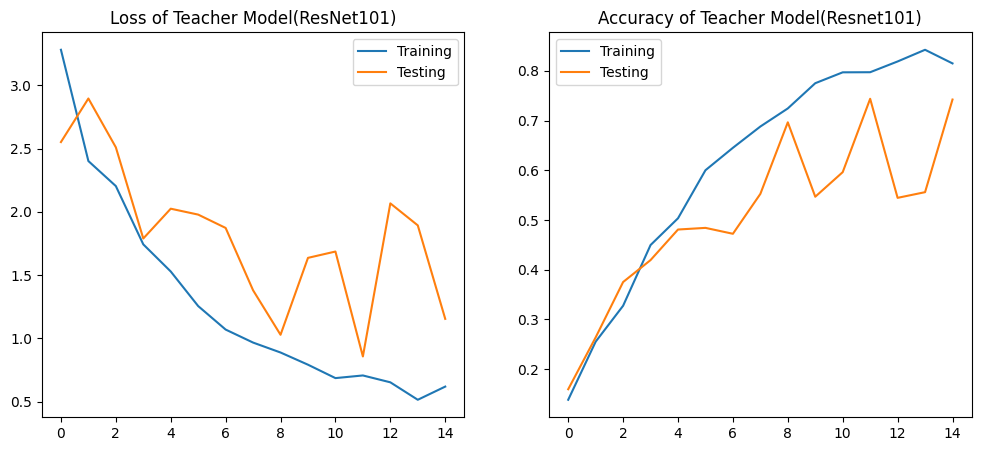

In [ ]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1, 2, 1)
  
# showing image
plt.plot(train_loss,label='Training')
plt.plot(val_los,label='Testing')
plt.legend()
plt.title("Loss of Teacher Model(ResNet101)")
fig.add_subplot(1, 2, 2)
  
# showing image
plt.plot(train_acc,label='Training')
plt.plot(val_acc,label='Testing')
plt.legend()
plt.title("Accuracy of Teacher Model(Resnet101)")
plt.show()


In [ ]:
start = timer()
predictions = []
accu = []
l_act = []
i = 0
for images_test,labels_test in test_loader:
    #i = i+1```````````````````````````````
    images_test = images_test.to(device)
    labels_test = labels_test.to(device)
    ypred = tmodel2(images_test)
    probs = F.softmax(ypred,dim=1)
    max_prob,preds = torch.max(probs,dim=1)
    #print(preds)
    #print(max_prob)
    acc = (torch.sum(preds == labels_test).item() / len(preds))
    accu.append(acc)
    predictions.append(preds)
    l_act.append(labels_test)
    
print(f'Accuracy of Teacher(ResNet101) is : {np.mean(accu):.2f}')
predictions = [t.cpu().numpy() for t in predictions]
predictions = np.array(np.concatenate(predictions))
pd.DataFrame(predictions).value_counts()
ytrue = [t.cpu().numpy() for t in l_act]
ytrue = np.array(np.concatenate(ytrue))
pd.DataFrame(ytrue).value_counts()
report = pd.DataFrame()
report['Actual'] = ytrue
report['Predicted'] = predictions
report['Actual1'] = le.inverse_transform(report['Actual'])
report['Predicted1'] = le.inverse_transform(report['Predicted'])
report5 = report.copy()
from sklearn.metrics import classification_report
print(classification_report(report['Actual1'], report['Predicted1']))

Accuracy of Teacher(ResNet101) is : 0.77
                                   precision    recall  f1-score   support

Alstonia Scholaris diseased (P2a)       0.40      0.92      0.56        50
 Alstonia Scholaris healthy (P2b)       0.89      0.50      0.64        34
             Arjun diseased (P1a)       0.86      0.88      0.87        50
              Arjun healthy (P1b)       0.81      0.90      0.85        42
              Bael diseased (P4b)       1.00      0.90      0.95        21
               Basil healthy (P8)       0.80      0.80      0.80        25
           Chinar diseased (P11b)       0.75      0.36      0.49        25
            Chinar healthy (P11a)       0.47      0.41      0.44        17
             Gauva diseased (P3b)       0.89      0.57      0.70        28
              Gauva healthy (P3a)       0.85      0.82      0.84        50
             Jamun diseased (P5b)       0.86      0.86      0.86        51
              Jamun healthy (P5a)       0.73      0.65    

# Student

In [ ]:
sdata1,sdata2 = random_split(tensor_data1,[2990,1])
sdata1,sdata2 = random_split(sdata1,[1495,1495])

In [ ]:
sloader1 = DataLoader((sdata1),shuffle=1,batch_size=64)
sloader2 = DataLoader((sdata2),shuffle=1,batch_size=64)

# DenseNet Teacher

In [ ]:
import torch
import torch.nn as nn

class smodel(nn.Module):
    def __init__(self):
        super(smodel, self).__init__()
        
        # Define convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=5, stride=2)
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv4 = nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3, padding=1)
        self.relu4 = nn.ReLU()
        # Define fully connected layers
        self.fc1 = nn.Linear(in_features=392 , out_features=22)
        #self.relu3 = nn.ReLU()
        #self.fc2 = nn.Linear(in_features=250, out_features=22)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.pool3(x)
        x = self.conv4(x)
        x = self.relu4(x)
        #print(x.shape)
        x = torch.flatten(x,1)
        #print(x.shape)
        x = self.fc1(x)
        #x = self.relu3(x)
        #x = self.fc2(x)
        #print(x.shape)
        return x


In [ ]:
smodel3 = smodel()
smodel3 = smodel3.cuda()
smodel4 = smodel()
smodel4 = smodel4.cuda()
optimizers = torch.optim.Adadelta(smodel4.parameters(), lr=0.3)
optimizers2 = torch.optim.Adadelta(smodel3.parameters(), lr=0.3)

In [ ]:
train_loss = []
val_los = []
train_acc = []
val_acc = []
for i in range(100):
        l1 = []
        l2 = []
        a1 = []
        a2 = []
        start = timer()
        for img,labels in tqdm(sloader2, desc='Training', unit=' unit',leave=False,colour='red'):
            



           # print(end - start)
            
            
            
            img = img.to(device)
            labels = labels.to(device)
            
            output = smodel3(img)
            #print(output.shape)
            probs = F.softmax(output,dim=1)
            max_prob,preds = torch.max(probs,dim=1)
            #print(len(labels))
            acc1 = (torch.sum(preds == labels).item() / len(preds))
            compare = smodel3(img)
            pdist = F.softmax(compare/4,dim=1)  ##Teacher distribution
            max_prob1,preds1 = torch.max(pdist,dim=1)   #Teacher output
            #accu=[]
            a1.append(acc1)
            #gg = np.mean(accu)
            soft_loss_teacher = nn.KLDivLoss(reduction='batchmean')(F.log_softmax(output / 4, dim=1), pdist)
            loss = nn.CrossEntropyLoss()(output,labels)
            loss = 0.2*loss + 0.8*soft_loss_teacher
            l1.append(loss.item())
            loss.backward()
            optimizers2.step()
            optimizers2.zero_grad()
            
        for a,b in tqdm(val_loader, desc='Training', unit=' unit',leave=False,colour='red'):
                a = a.to(device)
                b = b.to(device)
                rr = smodel3(a)
                val_loss = nn.CrossEntropyLoss()(rr,b)
                l2.append(val_loss.item())
                probs = F.softmax(rr,dim=1)
                max_prob,preds = torch.max(probs,dim=1)
                acc = (torch.sum(preds == b).item() / len(preds))
                a2.append(acc)
        train_loss.append(np.mean(l1))
        val_los.append(np.mean(l2))
        train_acc.append(np.mean(a1))
        val_acc.append(np.mean(a2))
        end = timer()
        time = end - start
        time = time/60
        print(f'Epoch {i+1}/100: Train Loss==> {np.mean(l1):.2f} Val Loss==> {np.mean(l2):.2f} Train_Acc==> {np.mean(a1):.2f} Val_Acc==> {np.mean(a2):.2f}')   
        #print(i+1,loss,acc)

Epoch 1/100: Train Loss==> 0.62 Val Loss==> 3.08 Train_Acc==> 0.07 Val_Acc==> 0.05


Epoch 2/100: Train Loss==> 0.61 Val Loss==> 3.05 Train_Acc==> 0.06 Val_Acc==> 0.05


Epoch 3/100: Train Loss==> 0.61 Val Loss==> 3.03 Train_Acc==> 0.06 Val_Acc==> 0.05


Epoch 4/100: Train Loss==> 0.61 Val Loss==> 3.02 Train_Acc==> 0.06 Val_Acc==> 0.06


Epoch 5/100: Train Loss==> 0.60 Val Loss==> 3.03 Train_Acc==> 0.07 Val_Acc==> 0.08


Epoch 6/100: Train Loss==> 0.60 Val Loss==> 3.02 Train_Acc==> 0.07 Val_Acc==> 0.09


Epoch 7/100: Train Loss==> 0.60 Val Loss==> 3.02 Train_Acc==> 0.07 Val_Acc==> 0.08


Epoch 8/100: Train Loss==> 0.60 Val Loss==> 3.00 Train_Acc==> 0.07 Val_Acc==> 0.09


Epoch 9/100: Train Loss==> 0.60 Val Loss==> 2.99 Train_Acc==> 0.07 Val_Acc==> 0.10


Epoch 10/100: Train Loss==> 0.60 Val Loss==> 2.96 Train_Acc==> 0.07 Val_Acc==> 0.09


Epoch 11/100: Train Loss==> 0.59 Val Loss==> 2.92 Train_Acc==> 0.07 Val_Acc==> 0.08


Epoch 12/100: Train Loss==> 0.58 Val Loss==> 2.82 Train_Acc==> 0.07 Val_Acc==> 0.08


Epoch 13/100: Train Loss==> 0.56 Val Loss==> 2.77 Train_Acc==> 0.08 Val_Acc==> 0.11


Epoch 14/100: Train Loss==> 0.55 Val Loss==> 2.75 Train_Acc==> 0.09 Val_Acc==> 0.15


Epoch 15/100: Train Loss==> 0.54 Val Loss==> 2.79 Train_Acc==> 0.13 Val_Acc==> 0.09


Epoch 16/100: Train Loss==> 0.54 Val Loss==> 2.68 Train_Acc==> 0.15 Val_Acc==> 0.18


Epoch 17/100: Train Loss==> 0.54 Val Loss==> 2.66 Train_Acc==> 0.17 Val_Acc==> 0.15


Epoch 18/100: Train Loss==> 0.53 Val Loss==> 2.58 Train_Acc==> 0.19 Val_Acc==> 0.17


Epoch 19/100: Train Loss==> 0.51 Val Loss==> 2.49 Train_Acc==> 0.20 Val_Acc==> 0.15


Epoch 20/100: Train Loss==> 0.49 Val Loss==> 2.45 Train_Acc==> 0.21 Val_Acc==> 0.21


Epoch 21/100: Train Loss==> 0.48 Val Loss==> 2.36 Train_Acc==> 0.22 Val_Acc==> 0.20


Epoch 22/100: Train Loss==> 0.48 Val Loss==> 2.37 Train_Acc==> 0.21 Val_Acc==> 0.16


Epoch 23/100: Train Loss==> 0.47 Val Loss==> 2.33 Train_Acc==> 0.22 Val_Acc==> 0.23


Epoch 24/100: Train Loss==> 0.47 Val Loss==> 2.31 Train_Acc==> 0.22 Val_Acc==> 0.27


Epoch 25/100: Train Loss==> 0.46 Val Loss==> 2.28 Train_Acc==> 0.24 Val_Acc==> 0.24


Epoch 26/100: Train Loss==> 0.46 Val Loss==> 2.31 Train_Acc==> 0.24 Val_Acc==> 0.24


Epoch 27/100: Train Loss==> 0.46 Val Loss==> 2.29 Train_Acc==> 0.25 Val_Acc==> 0.23


Epoch 28/100: Train Loss==> 0.45 Val Loss==> 2.25 Train_Acc==> 0.26 Val_Acc==> 0.28


Epoch 29/100: Train Loss==> 0.45 Val Loss==> 2.24 Train_Acc==> 0.27 Val_Acc==> 0.26


Epoch 30/100: Train Loss==> 0.44 Val Loss==> 2.22 Train_Acc==> 0.28 Val_Acc==> 0.26


Epoch 31/100: Train Loss==> 0.44 Val Loss==> 2.09 Train_Acc==> 0.27 Val_Acc==> 0.34


Epoch 32/100: Train Loss==> 0.43 Val Loss==> 2.20 Train_Acc==> 0.30 Val_Acc==> 0.27


Epoch 33/100: Train Loss==> 0.42 Val Loss==> 2.08 Train_Acc==> 0.33 Val_Acc==> 0.33


Epoch 34/100: Train Loss==> 0.41 Val Loss==> 2.06 Train_Acc==> 0.33 Val_Acc==> 0.28


Epoch 35/100: Train Loss==> 0.40 Val Loss==> 2.25 Train_Acc==> 0.35 Val_Acc==> 0.30


Epoch 36/100: Train Loss==> 0.40 Val Loss==> 2.06 Train_Acc==> 0.36 Val_Acc==> 0.32


Epoch 37/100: Train Loss==> 0.40 Val Loss==> 2.06 Train_Acc==> 0.35 Val_Acc==> 0.34


Epoch 38/100: Train Loss==> 0.38 Val Loss==> 1.93 Train_Acc==> 0.39 Val_Acc==> 0.40


Epoch 39/100: Train Loss==> 0.38 Val Loss==> 1.90 Train_Acc==> 0.38 Val_Acc==> 0.38


Epoch 40/100: Train Loss==> 0.37 Val Loss==> 2.21 Train_Acc==> 0.40 Val_Acc==> 0.28


Epoch 41/100: Train Loss==> 0.37 Val Loss==> 1.83 Train_Acc==> 0.40 Val_Acc==> 0.40


Epoch 42/100: Train Loss==> 0.36 Val Loss==> 2.01 Train_Acc==> 0.42 Val_Acc==> 0.36


Epoch 43/100: Train Loss==> 0.36 Val Loss==> 1.74 Train_Acc==> 0.41 Val_Acc==> 0.44


Epoch 44/100: Train Loss==> 0.35 Val Loss==> 1.89 Train_Acc==> 0.44 Val_Acc==> 0.36


Epoch 45/100: Train Loss==> 0.35 Val Loss==> 1.73 Train_Acc==> 0.42 Val_Acc==> 0.46


Epoch 46/100: Train Loss==> 0.36 Val Loss==> 1.76 Train_Acc==> 0.42 Val_Acc==> 0.43


Epoch 47/100: Train Loss==> 0.34 Val Loss==> 1.81 Train_Acc==> 0.44 Val_Acc==> 0.41


Epoch 48/100: Train Loss==> 0.34 Val Loss==> 1.83 Train_Acc==> 0.45 Val_Acc==> 0.38


Epoch 49/100: Train Loss==> 0.34 Val Loss==> 1.76 Train_Acc==> 0.45 Val_Acc==> 0.43


Epoch 50/100: Train Loss==> 0.33 Val Loss==> 1.95 Train_Acc==> 0.45 Val_Acc==> 0.33


Epoch 51/100: Train Loss==> 0.34 Val Loss==> 1.91 Train_Acc==> 0.45 Val_Acc==> 0.33


Epoch 52/100: Train Loss==> 0.33 Val Loss==> 1.99 Train_Acc==> 0.45 Val_Acc==> 0.40


Epoch 53/100: Train Loss==> 0.33 Val Loss==> 1.75 Train_Acc==> 0.44 Val_Acc==> 0.43


Epoch 54/100: Train Loss==> 0.32 Val Loss==> 1.81 Train_Acc==> 0.48 Val_Acc==> 0.39


Epoch 55/100: Train Loss==> 0.33 Val Loss==> 1.75 Train_Acc==> 0.47 Val_Acc==> 0.42


Epoch 56/100: Train Loss==> 0.32 Val Loss==> 1.77 Train_Acc==> 0.49 Val_Acc==> 0.46


Epoch 57/100: Train Loss==> 0.32 Val Loss==> 1.89 Train_Acc==> 0.46 Val_Acc==> 0.42


Epoch 58/100: Train Loss==> 0.31 Val Loss==> 1.75 Train_Acc==> 0.49 Val_Acc==> 0.43


Epoch 59/100: Train Loss==> 0.32 Val Loss==> 1.74 Train_Acc==> 0.49 Val_Acc==> 0.45


Epoch 60/100: Train Loss==> 0.32 Val Loss==> 1.85 Train_Acc==> 0.49 Val_Acc==> 0.39


Epoch 61/100: Train Loss==> 0.32 Val Loss==> 1.80 Train_Acc==> 0.49 Val_Acc==> 0.39


Epoch 62/100: Train Loss==> 0.31 Val Loss==> 1.56 Train_Acc==> 0.51 Val_Acc==> 0.50


Epoch 63/100: Train Loss==> 0.31 Val Loss==> 1.54 Train_Acc==> 0.50 Val_Acc==> 0.48


Epoch 64/100: Train Loss==> 0.31 Val Loss==> 1.82 Train_Acc==> 0.50 Val_Acc==> 0.41


Epoch 65/100: Train Loss==> 0.30 Val Loss==> 1.65 Train_Acc==> 0.51 Val_Acc==> 0.47


Epoch 66/100: Train Loss==> 0.30 Val Loss==> 1.60 Train_Acc==> 0.51 Val_Acc==> 0.47


Epoch 67/100: Train Loss==> 0.30 Val Loss==> 1.64 Train_Acc==> 0.53 Val_Acc==> 0.46


Epoch 68/100: Train Loss==> 0.30 Val Loss==> 1.86 Train_Acc==> 0.51 Val_Acc==> 0.38


Epoch 69/100: Train Loss==> 0.30 Val Loss==> 1.60 Train_Acc==> 0.53 Val_Acc==> 0.45


Epoch 70/100: Train Loss==> 0.29 Val Loss==> 1.61 Train_Acc==> 0.53 Val_Acc==> 0.46


Epoch 71/100: Train Loss==> 0.30 Val Loss==> 2.03 Train_Acc==> 0.52 Val_Acc==> 0.33


Epoch 72/100: Train Loss==> 0.30 Val Loss==> 1.60 Train_Acc==> 0.53 Val_Acc==> 0.47


Epoch 73/100: Train Loss==> 0.30 Val Loss==> 1.65 Train_Acc==> 0.51 Val_Acc==> 0.47


Epoch 74/100: Train Loss==> 0.28 Val Loss==> 1.76 Train_Acc==> 0.54 Val_Acc==> 0.43


Epoch 75/100: Train Loss==> 0.29 Val Loss==> 1.53 Train_Acc==> 0.53 Val_Acc==> 0.50


Epoch 76/100: Train Loss==> 0.29 Val Loss==> 1.76 Train_Acc==> 0.53 Val_Acc==> 0.42


Epoch 77/100: Train Loss==> 0.28 Val Loss==> 1.70 Train_Acc==> 0.54 Val_Acc==> 0.44


Epoch 78/100: Train Loss==> 0.28 Val Loss==> 1.73 Train_Acc==> 0.56 Val_Acc==> 0.46


Epoch 79/100: Train Loss==> 0.28 Val Loss==> 1.70 Train_Acc==> 0.54 Val_Acc==> 0.45


Epoch 80/100: Train Loss==> 0.28 Val Loss==> 1.59 Train_Acc==> 0.55 Val_Acc==> 0.45


Epoch 81/100: Train Loss==> 0.28 Val Loss==> 1.72 Train_Acc==> 0.53 Val_Acc==> 0.44


Epoch 82/100: Train Loss==> 0.28 Val Loss==> 1.61 Train_Acc==> 0.55 Val_Acc==> 0.48


Epoch 83/100: Train Loss==> 0.28 Val Loss==> 1.65 Train_Acc==> 0.55 Val_Acc==> 0.44


Epoch 84/100: Train Loss==> 0.27 Val Loss==> 1.54 Train_Acc==> 0.57 Val_Acc==> 0.51


Epoch 85/100: Train Loss==> 0.27 Val Loss==> 1.52 Train_Acc==> 0.58 Val_Acc==> 0.48


Epoch 86/100: Train Loss==> 0.27 Val Loss==> 1.56 Train_Acc==> 0.57 Val_Acc==> 0.50


Epoch 87/100: Train Loss==> 0.27 Val Loss==> 1.64 Train_Acc==> 0.58 Val_Acc==> 0.48


Epoch 88/100: Train Loss==> 0.27 Val Loss==> 1.48 Train_Acc==> 0.56 Val_Acc==> 0.52


Epoch 89/100: Train Loss==> 0.27 Val Loss==> 1.72 Train_Acc==> 0.56 Val_Acc==> 0.41


Epoch 90/100: Train Loss==> 0.26 Val Loss==> 1.45 Train_Acc==> 0.58 Val_Acc==> 0.54


Epoch 91/100: Train Loss==> 0.27 Val Loss==> 1.72 Train_Acc==> 0.56 Val_Acc==> 0.48


Epoch 92/100: Train Loss==> 0.27 Val Loss==> 1.62 Train_Acc==> 0.56 Val_Acc==> 0.46


Epoch 93/100: Train Loss==> 0.26 Val Loss==> 1.57 Train_Acc==> 0.58 Val_Acc==> 0.50


Epoch 94/100: Train Loss==> 0.25 Val Loss==> 1.65 Train_Acc==> 0.60 Val_Acc==> 0.44


Epoch 95/100: Train Loss==> 0.26 Val Loss==> 1.50 Train_Acc==> 0.60 Val_Acc==> 0.50


Epoch 96/100: Train Loss==> 0.26 Val Loss==> 1.66 Train_Acc==> 0.58 Val_Acc==> 0.48


Epoch 97/100: Train Loss==> 0.26 Val Loss==> 1.64 Train_Acc==> 0.61 Val_Acc==> 0.46


Epoch 98/100: Train Loss==> 0.25 Val Loss==> 1.48 Train_Acc==> 0.59 Val_Acc==> 0.53


Epoch 99/100: Train Loss==> 0.25 Val Loss==> 1.51 Train_Acc==> 0.59 Val_Acc==> 0.52


Epoch 100/100: Train Loss==> 0.26 Val Loss==> 1.58 Train_Acc==> 0.59 Val_Acc==> 0.53


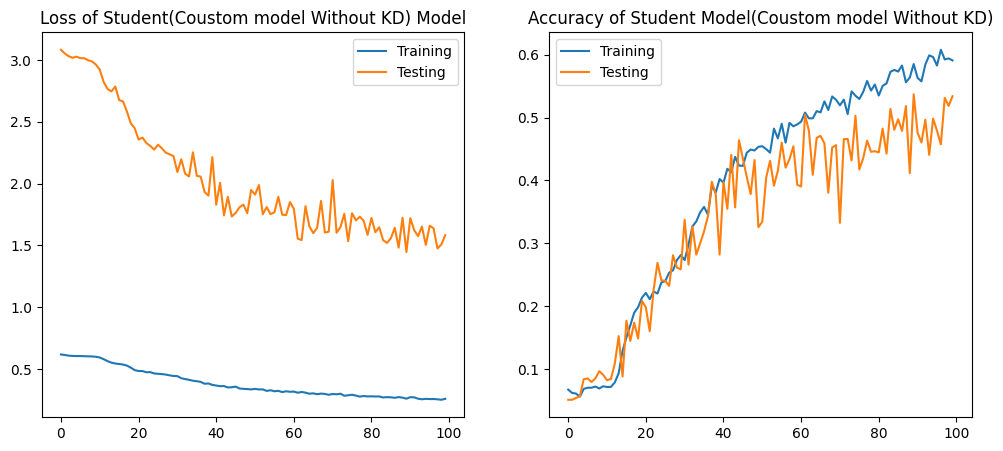

In [ ]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1, 2, 1)
  
# showing image
plt.plot(train_loss,label='Training')
plt.plot(val_los,label='Testing')
plt.legend()
plt.title("Loss of Student(Coustom model Without KD) Model")
fig.add_subplot(1, 2, 2)
  
# showing image
plt.plot(train_acc,label='Training')
plt.plot(val_acc,label='Testing')
plt.legend()
plt.title("Accuracy of Student Model(Coustom model Without KD)")
plt.show()


In [ ]:
classification_report(smodel3,test_loader)

Accuracy of model is : 0.47
                                   precision    recall  f1-score   support

Alstonia Scholaris diseased (P2a)       0.67      0.48      0.56        50
 Alstonia Scholaris healthy (P2b)       0.26      0.56      0.35        34
             Arjun diseased (P1a)       0.56      0.38      0.45        50
              Arjun healthy (P1b)       0.55      0.57      0.56        42
              Bael diseased (P4b)       0.58      0.90      0.70        21
               Basil healthy (P8)       0.28      0.60      0.38        25
           Chinar diseased (P11b)       0.14      0.04      0.06        25
            Chinar healthy (P11a)       0.20      0.41      0.27        17
             Gauva diseased (P3b)       0.21      0.46      0.29        28
              Gauva healthy (P3a)       0.53      0.20      0.29        50
             Jamun diseased (P5b)       0.41      0.84      0.55        51
              Jamun healthy (P5a)       0.75      0.33      0.46       

In [ ]:
train_loss1 = []
val_los1 = []
train_acc1 = []
val_acc1 = []
for i in range(100):
        l1 = []
        l2 = []
        a1 = []
        a2 = []
        start = timer()
        for img,labels in tqdm(sloader2, desc='Training', unit=' unit',leave=False,colour='red'):
            



           # print(end - start)
            
            
            
            img = img.to(device)
            labels = labels.to(device)
            
            output = smodel4(img)
            #print(output.shape)
            probs = F.softmax(output,dim=1)
            max_prob,preds = torch.max(probs,dim=1)
            #print(len(labels))
            acc1 = (torch.sum(preds == labels).item() / len(preds))
            compare = tmodel(img)
            pdist = F.softmax(compare/4,dim=1)  ##Teacher distribution
            max_prob1,preds1 = torch.max(pdist,dim=1)   #Teacher output
            #accu=[]
            a1.append(acc1)
            #gg = np.mean(accu)
            soft_loss_teacher = nn.KLDivLoss(reduction='batchmean')(F.log_softmax(output /4, dim=1), pdist)
            loss = nn.CrossEntropyLoss()(output,labels)
            loss = 0.2*1*loss + 0.8*1*soft_loss_teacher
            l1.append(loss.item())
            loss.backward()
            optimizers.step()
            optimizers.zero_grad()
            
        for a,b in tqdm(val_loader, desc='Training', unit=' unit',leave=False,colour='red'):
                a = a.to(device)
                b = b.to(device)
                rr = smodel4(a)
                val_loss = nn.CrossEntropyLoss()(rr,b)
                l2.append(val_loss.item())
                probs = F.softmax(rr,dim=1)
                max_prob,preds = torch.max(probs,dim=1)
                acc = (torch.sum(preds == b).item() / len(preds))
                a2.append(acc)
        train_loss1.append(np.mean(l1))
        val_los1.append(np.mean(l2))
        train_acc1.append(np.mean(a1))
        val_acc1.append(np.mean(a2))
        end = timer()
        time = end - start
        time = time/60
        print(f'Epoch {i+1}/100: Train Loss==> {np.mean(l1):.2f} Val Loss==> {np.mean(l2):.2f} Train_Acc==> {np.mean(a1):.2f} Val_Acc==> {np.mean(a2):.2f} Time==> {time:.2f} mins')   
        #print(i+1,loss,acc)

Epoch 1/100: Train Loss==> 0.73 Val Loss==> 3.08 Train_Acc==> 0.04 Val_Acc==> 0.05 Time==> 0.04 mins


Epoch 2/100: Train Loss==> 0.72 Val Loss==> 3.04 Train_Acc==> 0.07 Val_Acc==> 0.09 Time==> 0.04 mins


Epoch 3/100: Train Loss==> 0.71 Val Loss==> 2.99 Train_Acc==> 0.07 Val_Acc==> 0.10 Time==> 0.04 mins


Epoch 4/100: Train Loss==> 0.70 Val Loss==> 2.91 Train_Acc==> 0.07 Val_Acc==> 0.08 Time==> 0.04 mins


Epoch 5/100: Train Loss==> 0.67 Val Loss==> 2.81 Train_Acc==> 0.08 Val_Acc==> 0.12 Time==> 0.04 mins


Epoch 6/100: Train Loss==> 0.64 Val Loss==> 2.70 Train_Acc==> 0.13 Val_Acc==> 0.15 Time==> 0.04 mins


Epoch 7/100: Train Loss==> 0.63 Val Loss==> 2.58 Train_Acc==> 0.15 Val_Acc==> 0.18 Time==> 0.04 mins


Epoch 8/100: Train Loss==> 0.62 Val Loss==> 2.77 Train_Acc==> 0.15 Val_Acc==> 0.12 Time==> 0.05 mins


Epoch 9/100: Train Loss==> 0.59 Val Loss==> 2.50 Train_Acc==> 0.17 Val_Acc==> 0.16 Time==> 0.04 mins


Epoch 10/100: Train Loss==> 0.58 Val Loss==> 2.48 Train_Acc==> 0.19 Val_Acc==> 0.18 Time==> 0.04 mins


Epoch 11/100: Train Loss==> 0.58 Val Loss==> 2.46 Train_Acc==> 0.19 Val_Acc==> 0.20 Time==> 0.04 mins


Epoch 12/100: Train Loss==> 0.58 Val Loss==> 2.43 Train_Acc==> 0.20 Val_Acc==> 0.20 Time==> 0.04 mins


Epoch 13/100: Train Loss==> 0.58 Val Loss==> 2.43 Train_Acc==> 0.20 Val_Acc==> 0.20 Time==> 0.05 mins


Epoch 14/100: Train Loss==> 0.57 Val Loss==> 2.38 Train_Acc==> 0.21 Val_Acc==> 0.20 Time==> 0.04 mins


Epoch 15/100: Train Loss==> 0.56 Val Loss==> 2.37 Train_Acc==> 0.20 Val_Acc==> 0.23 Time==> 0.04 mins


Epoch 16/100: Train Loss==> 0.56 Val Loss==> 2.35 Train_Acc==> 0.22 Val_Acc==> 0.25 Time==> 0.04 mins


Epoch 17/100: Train Loss==> 0.55 Val Loss==> 2.38 Train_Acc==> 0.23 Val_Acc==> 0.20 Time==> 0.04 mins


Epoch 18/100: Train Loss==> 0.54 Val Loss==> 2.38 Train_Acc==> 0.23 Val_Acc==> 0.22 Time==> 0.05 mins


Epoch 19/100: Train Loss==> 0.54 Val Loss==> 2.27 Train_Acc==> 0.23 Val_Acc==> 0.21 Time==> 0.04 mins


Epoch 20/100: Train Loss==> 0.53 Val Loss==> 2.28 Train_Acc==> 0.24 Val_Acc==> 0.23 Time==> 0.04 mins


Epoch 21/100: Train Loss==> 0.52 Val Loss==> 2.31 Train_Acc==> 0.25 Val_Acc==> 0.27 Time==> 0.04 mins


Epoch 22/100: Train Loss==> 0.52 Val Loss==> 2.15 Train_Acc==> 0.28 Val_Acc==> 0.31 Time==> 0.04 mins


Epoch 23/100: Train Loss==> 0.51 Val Loss==> 2.18 Train_Acc==> 0.28 Val_Acc==> 0.30 Time==> 0.04 mins


Epoch 24/100: Train Loss==> 0.50 Val Loss==> 2.15 Train_Acc==> 0.30 Val_Acc==> 0.33 Time==> 0.04 mins


Epoch 25/100: Train Loss==> 0.48 Val Loss==> 2.03 Train_Acc==> 0.32 Val_Acc==> 0.34 Time==> 0.04 mins


Epoch 26/100: Train Loss==> 0.47 Val Loss==> 2.01 Train_Acc==> 0.35 Val_Acc==> 0.32 Time==> 0.04 mins


Epoch 27/100: Train Loss==> 0.46 Val Loss==> 1.95 Train_Acc==> 0.36 Val_Acc==> 0.40 Time==> 0.04 mins


Epoch 28/100: Train Loss==> 0.45 Val Loss==> 1.94 Train_Acc==> 0.38 Val_Acc==> 0.39 Time==> 0.04 mins


Epoch 29/100: Train Loss==> 0.45 Val Loss==> 1.91 Train_Acc==> 0.38 Val_Acc==> 0.40 Time==> 0.05 mins


Epoch 30/100: Train Loss==> 0.44 Val Loss==> 1.84 Train_Acc==> 0.37 Val_Acc==> 0.40 Time==> 0.04 mins


Epoch 31/100: Train Loss==> 0.43 Val Loss==> 1.83 Train_Acc==> 0.41 Val_Acc==> 0.36 Time==> 0.04 mins


Epoch 32/100: Train Loss==> 0.43 Val Loss==> 1.79 Train_Acc==> 0.41 Val_Acc==> 0.41 Time==> 0.04 mins


Epoch 33/100: Train Loss==> 0.41 Val Loss==> 1.87 Train_Acc==> 0.44 Val_Acc==> 0.40 Time==> 0.04 mins


Epoch 34/100: Train Loss==> 0.42 Val Loss==> 1.81 Train_Acc==> 0.43 Val_Acc==> 0.37 Time==> 0.05 mins


Epoch 35/100: Train Loss==> 0.41 Val Loss==> 1.71 Train_Acc==> 0.43 Val_Acc==> 0.45 Time==> 0.04 mins


Epoch 36/100: Train Loss==> 0.41 Val Loss==> 1.80 Train_Acc==> 0.42 Val_Acc==> 0.41 Time==> 0.04 mins


Epoch 37/100: Train Loss==> 0.40 Val Loss==> 1.85 Train_Acc==> 0.44 Val_Acc==> 0.39 Time==> 0.04 mins


Epoch 38/100: Train Loss==> 0.40 Val Loss==> 1.72 Train_Acc==> 0.46 Val_Acc==> 0.44 Time==> 0.04 mins


Epoch 39/100: Train Loss==> 0.40 Val Loss==> 1.70 Train_Acc==> 0.47 Val_Acc==> 0.41 Time==> 0.05 mins


Epoch 40/100: Train Loss==> 0.39 Val Loss==> 1.82 Train_Acc==> 0.45 Val_Acc==> 0.39 Time==> 0.04 mins


Epoch 41/100: Train Loss==> 0.38 Val Loss==> 1.73 Train_Acc==> 0.49 Val_Acc==> 0.43 Time==> 0.04 mins


Epoch 42/100: Train Loss==> 0.39 Val Loss==> 1.77 Train_Acc==> 0.47 Val_Acc==> 0.41 Time==> 0.04 mins


Epoch 43/100: Train Loss==> 0.38 Val Loss==> 1.64 Train_Acc==> 0.49 Val_Acc==> 0.43 Time==> 0.04 mins


Epoch 44/100: Train Loss==> 0.38 Val Loss==> 1.77 Train_Acc==> 0.48 Val_Acc==> 0.39 Time==> 0.05 mins


Epoch 45/100: Train Loss==> 0.38 Val Loss==> 1.70 Train_Acc==> 0.49 Val_Acc==> 0.48 Time==> 0.04 mins


Epoch 46/100: Train Loss==> 0.37 Val Loss==> 1.63 Train_Acc==> 0.50 Val_Acc==> 0.52 Time==> 0.04 mins


Epoch 47/100: Train Loss==> 0.37 Val Loss==> 1.72 Train_Acc==> 0.51 Val_Acc==> 0.43 Time==> 0.04 mins


Epoch 48/100: Train Loss==> 0.37 Val Loss==> 1.72 Train_Acc==> 0.50 Val_Acc==> 0.44 Time==> 0.04 mins


Epoch 49/100: Train Loss==> 0.37 Val Loss==> 1.79 Train_Acc==> 0.52 Val_Acc==> 0.44 Time==> 0.05 mins


Epoch 50/100: Train Loss==> 0.36 Val Loss==> 1.73 Train_Acc==> 0.54 Val_Acc==> 0.43 Time==> 0.04 mins


Epoch 51/100: Train Loss==> 0.36 Val Loss==> 1.61 Train_Acc==> 0.53 Val_Acc==> 0.49 Time==> 0.04 mins


Epoch 52/100: Train Loss==> 0.36 Val Loss==> 1.59 Train_Acc==> 0.52 Val_Acc==> 0.50 Time==> 0.04 mins


Epoch 53/100: Train Loss==> 0.35 Val Loss==> 1.60 Train_Acc==> 0.54 Val_Acc==> 0.48 Time==> 0.04 mins


Epoch 54/100: Train Loss==> 0.35 Val Loss==> 1.59 Train_Acc==> 0.55 Val_Acc==> 0.53 Time==> 0.04 mins


Epoch 55/100: Train Loss==> 0.35 Val Loss==> 1.63 Train_Acc==> 0.56 Val_Acc==> 0.51 Time==> 0.04 mins


Epoch 56/100: Train Loss==> 0.35 Val Loss==> 1.56 Train_Acc==> 0.54 Val_Acc==> 0.51 Time==> 0.04 mins


Epoch 57/100: Train Loss==> 0.34 Val Loss==> 1.55 Train_Acc==> 0.56 Val_Acc==> 0.51 Time==> 0.04 mins


Epoch 58/100: Train Loss==> 0.33 Val Loss==> 1.63 Train_Acc==> 0.58 Val_Acc==> 0.49 Time==> 0.04 mins


Epoch 59/100: Train Loss==> 0.35 Val Loss==> 1.54 Train_Acc==> 0.55 Val_Acc==> 0.51 Time==> 0.04 mins


Epoch 60/100: Train Loss==> 0.34 Val Loss==> 1.77 Train_Acc==> 0.57 Val_Acc==> 0.43 Time==> 0.04 mins


Epoch 61/100: Train Loss==> 0.33 Val Loss==> 1.45 Train_Acc==> 0.58 Val_Acc==> 0.57 Time==> 0.04 mins


Epoch 62/100: Train Loss==> 0.33 Val Loss==> 1.54 Train_Acc==> 0.58 Val_Acc==> 0.51 Time==> 0.04 mins


Epoch 63/100: Train Loss==> 0.33 Val Loss==> 1.47 Train_Acc==> 0.58 Val_Acc==> 0.56 Time==> 0.04 mins


Epoch 64/100: Train Loss==> 0.32 Val Loss==> 1.75 Train_Acc==> 0.59 Val_Acc==> 0.42 Time==> 0.04 mins


Epoch 65/100: Train Loss==> 0.32 Val Loss==> 1.61 Train_Acc==> 0.60 Val_Acc==> 0.51 Time==> 0.05 mins


Epoch 66/100: Train Loss==> 0.33 Val Loss==> 1.51 Train_Acc==> 0.59 Val_Acc==> 0.52 Time==> 0.04 mins


Epoch 67/100: Train Loss==> 0.31 Val Loss==> 1.48 Train_Acc==> 0.60 Val_Acc==> 0.53 Time==> 0.04 mins


Epoch 68/100: Train Loss==> 0.31 Val Loss==> 1.51 Train_Acc==> 0.61 Val_Acc==> 0.53 Time==> 0.04 mins


Epoch 69/100: Train Loss==> 0.32 Val Loss==> 1.49 Train_Acc==> 0.59 Val_Acc==> 0.52 Time==> 0.04 mins


Epoch 70/100: Train Loss==> 0.32 Val Loss==> 1.43 Train_Acc==> 0.59 Val_Acc==> 0.53 Time==> 0.05 mins


Epoch 71/100: Train Loss==> 0.32 Val Loss==> 1.50 Train_Acc==> 0.60 Val_Acc==> 0.54 Time==> 0.04 mins


Epoch 72/100: Train Loss==> 0.31 Val Loss==> 1.39 Train_Acc==> 0.62 Val_Acc==> 0.58 Time==> 0.04 mins


Epoch 73/100: Train Loss==> 0.31 Val Loss==> 1.47 Train_Acc==> 0.61 Val_Acc==> 0.53 Time==> 0.04 mins


Epoch 74/100: Train Loss==> 0.30 Val Loss==> 1.40 Train_Acc==> 0.63 Val_Acc==> 0.57 Time==> 0.04 mins


Epoch 75/100: Train Loss==> 0.30 Val Loss==> 1.52 Train_Acc==> 0.60 Val_Acc==> 0.51 Time==> 0.05 mins


Epoch 76/100: Train Loss==> 0.29 Val Loss==> 1.34 Train_Acc==> 0.62 Val_Acc==> 0.60 Time==> 0.04 mins


Epoch 77/100: Train Loss==> 0.30 Val Loss==> 1.37 Train_Acc==> 0.62 Val_Acc==> 0.56 Time==> 0.04 mins


Epoch 78/100: Train Loss==> 0.30 Val Loss==> 1.43 Train_Acc==> 0.62 Val_Acc==> 0.55 Time==> 0.04 mins


Epoch 79/100: Train Loss==> 0.29 Val Loss==> 1.32 Train_Acc==> 0.65 Val_Acc==> 0.61 Time==> 0.04 mins


Epoch 80/100: Train Loss==> 0.30 Val Loss==> 1.38 Train_Acc==> 0.63 Val_Acc==> 0.56 Time==> 0.05 mins


Epoch 81/100: Train Loss==> 0.30 Val Loss==> 1.41 Train_Acc==> 0.64 Val_Acc==> 0.56 Time==> 0.04 mins


Epoch 82/100: Train Loss==> 0.29 Val Loss==> 1.33 Train_Acc==> 0.65 Val_Acc==> 0.58 Time==> 0.04 mins


Epoch 83/100: Train Loss==> 0.29 Val Loss==> 1.39 Train_Acc==> 0.65 Val_Acc==> 0.55 Time==> 0.04 mins


Epoch 84/100: Train Loss==> 0.28 Val Loss==> 1.35 Train_Acc==> 0.64 Val_Acc==> 0.57 Time==> 0.04 mins


Epoch 85/100: Train Loss==> 0.29 Val Loss==> 1.46 Train_Acc==> 0.64 Val_Acc==> 0.55 Time==> 0.05 mins


Epoch 86/100: Train Loss==> 0.28 Val Loss==> 1.40 Train_Acc==> 0.66 Val_Acc==> 0.54 Time==> 0.04 mins


Epoch 87/100: Train Loss==> 0.28 Val Loss==> 1.30 Train_Acc==> 0.64 Val_Acc==> 0.58 Time==> 0.04 mins


Epoch 88/100: Train Loss==> 0.28 Val Loss==> 1.30 Train_Acc==> 0.67 Val_Acc==> 0.58 Time==> 0.04 mins


Epoch 89/100: Train Loss==> 0.28 Val Loss==> 1.40 Train_Acc==> 0.65 Val_Acc==> 0.59 Time==> 0.04 mins


Epoch 90/100: Train Loss==> 0.28 Val Loss==> 1.48 Train_Acc==> 0.66 Val_Acc==> 0.54 Time==> 0.05 mins


Epoch 91/100: Train Loss==> 0.28 Val Loss==> 1.27 Train_Acc==> 0.66 Val_Acc==> 0.62 Time==> 0.04 mins


Epoch 92/100: Train Loss==> 0.28 Val Loss==> 1.44 Train_Acc==> 0.66 Val_Acc==> 0.53 Time==> 0.04 mins


Epoch 93/100: Train Loss==> 0.28 Val Loss==> 1.24 Train_Acc==> 0.66 Val_Acc==> 0.62 Time==> 0.04 mins


Epoch 94/100: Train Loss==> 0.27 Val Loss==> 1.40 Train_Acc==> 0.66 Val_Acc==> 0.56 Time==> 0.04 mins


Epoch 95/100: Train Loss==> 0.27 Val Loss==> 1.28 Train_Acc==> 0.67 Val_Acc==> 0.62 Time==> 0.05 mins


Epoch 96/100: Train Loss==> 0.28 Val Loss==> 1.25 Train_Acc==> 0.65 Val_Acc==> 0.61 Time==> 0.04 mins


Epoch 97/100: Train Loss==> 0.27 Val Loss==> 1.41 Train_Acc==> 0.67 Val_Acc==> 0.55 Time==> 0.04 mins


Epoch 98/100: Train Loss==> 0.26 Val Loss==> 1.37 Train_Acc==> 0.68 Val_Acc==> 0.57 Time==> 0.04 mins


Epoch 99/100: Train Loss==> 0.27 Val Loss==> 1.26 Train_Acc==> 0.66 Val_Acc==> 0.61 Time==> 0.04 mins


Epoch 100/100: Train Loss==> 0.26 Val Loss==> 1.27 Train_Acc==> 0.68 Val_Acc==> 0.60 Time==> 0.04 mins


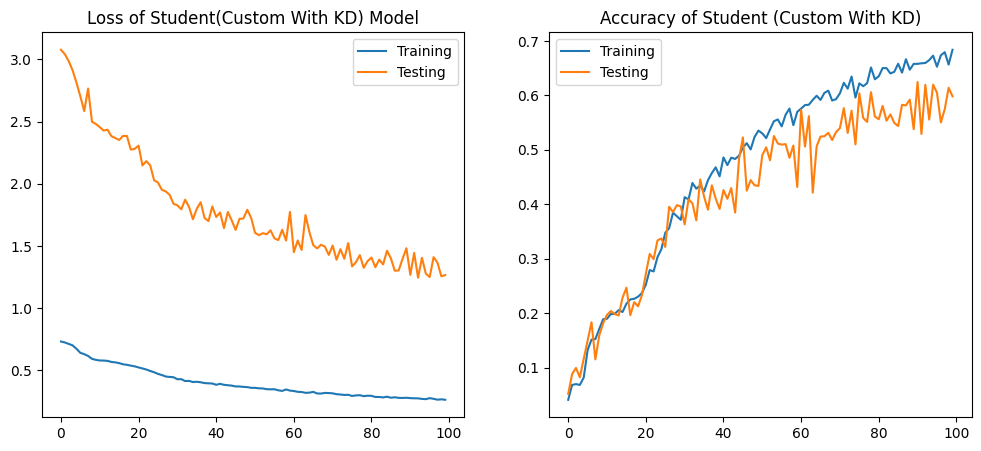

In [ ]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1, 2, 1)
  
# showing image
plt.plot(train_loss1,label='Training')
plt.plot(val_los1,label='Testing')
plt.legend()
plt.title("Loss of Student(Custom With KD) Model")
fig.add_subplot(1, 2, 2)
  
# showing image
plt.plot(train_acc1,label='Training')
plt.plot(val_acc1,label='Testing')
plt.legend()
plt.title("Accuracy of Student (Custom With KD)")
plt.show()


In [ ]:
classification_report(smodel4,test_loader)

Accuracy of model is : 0.58
                                   precision    recall  f1-score   support

Alstonia Scholaris diseased (P2a)       0.71      0.40      0.51        50
 Alstonia Scholaris healthy (P2b)       0.69      0.53      0.60        34
             Arjun diseased (P1a)       0.52      0.64      0.57        50
              Arjun healthy (P1b)       0.70      0.45      0.55        42
              Bael diseased (P4b)       0.69      0.95      0.80        21
               Basil healthy (P8)       0.50      0.40      0.44        25
           Chinar diseased (P11b)       0.40      0.56      0.47        25
            Chinar healthy (P11a)       0.14      0.06      0.08        17
             Gauva diseased (P3b)       0.64      0.25      0.36        28
              Gauva healthy (P3a)       0.37      0.68      0.48        50
             Jamun diseased (P5b)       0.53      0.88      0.66        51
              Jamun healthy (P5a)       0.65      0.52      0.58       

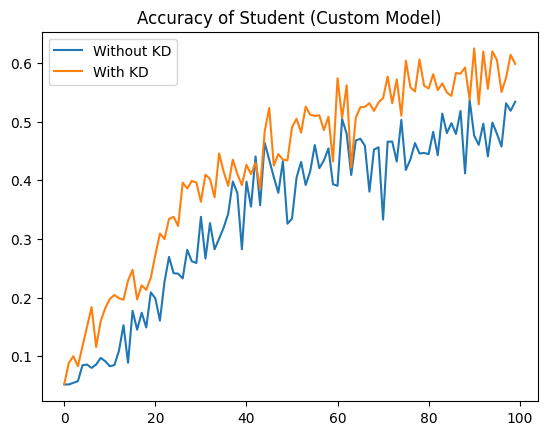

In [ ]:
plt.plot(val_acc,label='Without KD')
plt.plot(val_acc1,label='With KD')
plt.legend()
plt.title("Accuracy of Student (Custom Model)")
plt.show()


In [ ]:
joblib.dump(smodel4, 'csmodel_dnet.pkl')
joblib.dump(smodel1, 'shufflemodel_dnet.pkl')

['shufflemodel_dnet.pkl']

In [ ]:
def classification_report(model,test_loader):
  predictions = []
  accu = []
  l_act = []
  i = 0
  for images_test,labels_test in test_loader:
      #i = i+1```````````````````````````````
      images_test = images_test.to(device)
      labels_test = labels_test.to(device)
      ypred = model(images_test)
      probs = F.softmax(ypred,dim=1)
      max_prob,preds = torch.max(probs,dim=1)
      #print(preds)
      #print(max_prob)
      acc = (torch.sum(preds == labels_test).item() / len(preds))
      accu.append(acc)
      predictions.append(preds)
      l_act.append(labels_test)
      
  print(f'Accuracy of model is : {np.mean(accu):.2f}')
  predictions = [t.cpu().numpy() for t in predictions]
  predictions = np.array(np.concatenate(predictions))
  pd.DataFrame(predictions).value_counts()
  ytrue = [t.cpu().numpy() for t in l_act]
  ytrue = np.array(np.concatenate(ytrue))
  pd.DataFrame(ytrue).value_counts()
  report = pd.DataFrame()
  report['Actual'] = ytrue
  report['Predicted'] = predictions
  report['Actual1'] = le.inverse_transform(report['Actual'])
  report['Predicted1'] = le.inverse_transform(report['Predicted'])
  report5 = report.copy()
  from sklearn.metrics import classification_report
  print(classification_report(report['Actual1'], report['Predicted1']))

In [ ]:
smodel1 = torch.hub.load('pytorch/vision:v0.10.0', 'shufflenet_v2_x1_0', pretrained=1)
smodel1.fc = nn.Sequential(
    nn.Linear(in_features = 1024,out_features=22),
)

for name, child in smodel1.named_children():
   if name in ['stage3','stage4','conv5','fc']:
       print(name + ' is unfrozen')
       for param in child.parameters():
           param.requires_grad = True
   else:
       print(name + ' is frozen')
       for param in child.parameters():
           param.requires_grad = False

smodel2 = torch.hub.load('pytorch/vision:v0.10.0', 'shufflenet_v2_x1_0', pretrained=1)
smodel2.fc = nn.Sequential(
    nn.Linear(in_features = 1024,out_features=22),
)

for name, child in smodel2.named_children():
   if name in ['stage3','stage4','conv5','fc']:
       print(name + ' is unfrozen')
       for param in child.parameters():
           param.requires_grad = True
   else:
       print(name + ' is frozen')
       for param in child.parameters():
           param.requires_grad = False
optimizers = torch.optim.Adadelta(filter(lambda p: p.requires_grad, smodel1.parameters()), lr=0.02)
#smodel2 = smodel()
smodel1 = smodel1.cuda()
smodel2 = smodel2.cuda()
#optimizers = torch.optim.Adadelta(smodel1.parameters(), lr=0.6,weight_decay=1e-5)
optimizers2 = torch.optim.Adadelta(filter(lambda p: p.requires_grad, smodel2.parameters()), lr=0.02)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


conv1 is frozen
maxpool is frozen
stage2 is frozen
stage3 is unfrozen
stage4 is unfrozen
conv5 is unfrozen
fc is unfrozen
conv1 is frozen
maxpool is frozen
stage2 is frozen
stage3 is unfrozen
stage4 is unfrozen
conv5 is unfrozen
fc is unfrozen


In [ ]:
train_loss = []
val_los = []
train_acc = []
val_acc = []
for i in range(100):
        l1 = []
        l2 = []
        a1 = []
        a2 = []
        start = timer()
        for img,labels in tqdm(sloader1, desc='Training', unit=' unit',leave=False,colour='red'):
            



           # print(end - start)
            
            
            
            img = img.to(device)
            labels = labels.to(device)
            
            output = smodel2(img)
            #print(output.shape)
            probs = F.softmax(output,dim=1)
            max_prob,preds = torch.max(probs,dim=1)
            #print(len(labels))
            acc1 = (torch.sum(preds == labels).item() / len(preds))
            #compare = tmodel(img)
            #pdist = F.softmax(compare/4,dim=1)  ##Teacher distribution
            #max_prob1,preds1 = torch.max(pdist,dim=1)   #Teacher output
            #accu=[]
            a1.append(acc1)
            #gg = np.mean(accu)
            #soft_loss_teacher = nn.KLDivLoss(reduction='batchmean')(F.log_softmax(output / 4, dim=1), pdist)
            loss = nn.CrossEntropyLoss()(output,labels)
            #loss = 0.2*loss + 0.8*soft_loss_teacher
            l1.append(loss.item())
            loss.backward()
            optimizers2.step()
            optimizers2.zero_grad()
            
        for a,b in tqdm(val_loader, desc='Training', unit=' unit',leave=False,colour='red'):
                a = a.to(device)
                b = b.to(device)
                rr = smodel2(a)
                val_loss = nn.CrossEntropyLoss()(rr,b)
                l2.append(val_loss.item())
                probs = F.softmax(rr,dim=1)
                max_prob,preds = torch.max(probs,dim=1)
                acc = (torch.sum(preds == b).item() / len(preds))
                a2.append(acc)
        train_loss.append(np.mean(l1))
        val_los.append(np.mean(l2))
        train_acc.append(np.mean(a1))
        val_acc.append(np.mean(a2))
        end = timer()
        time = end - start
        time = time/60
        print(f'Epoch {i+1}/100: Train Loss==> {np.mean(l1):.2f} Val Loss==> {np.mean(l2):.2f} Train_Acc==> {np.mean(a1):.2f} Val_Acc==> {np.mean(a2):.2f} Time==> {time:.2f} mins')   
        #print(i+1,loss,acc)

Epoch 1/100: Train Loss==> 3.09 Val Loss==> 3.09 Train_Acc==> 0.05 Val_Acc==> 0.05 Time==> 0.02 mins


Epoch 2/100: Train Loss==> 3.09 Val Loss==> 3.09 Train_Acc==> 0.06 Val_Acc==> 0.06 Time==> 0.02 mins


Epoch 3/100: Train Loss==> 3.08 Val Loss==> 3.08 Train_Acc==> 0.07 Val_Acc==> 0.06 Time==> 0.02 mins


Epoch 4/100: Train Loss==> 3.08 Val Loss==> 3.08 Train_Acc==> 0.09 Val_Acc==> 0.08 Time==> 0.02 mins


Epoch 5/100: Train Loss==> 3.07 Val Loss==> 3.08 Train_Acc==> 0.11 Val_Acc==> 0.11 Time==> 0.02 mins


Epoch 6/100: Train Loss==> 3.07 Val Loss==> 3.08 Train_Acc==> 0.12 Val_Acc==> 0.14 Time==> 0.02 mins


Epoch 7/100: Train Loss==> 3.06 Val Loss==> 3.07 Train_Acc==> 0.15 Val_Acc==> 0.15 Time==> 0.02 mins


Epoch 8/100: Train Loss==> 3.06 Val Loss==> 3.07 Train_Acc==> 0.15 Val_Acc==> 0.16 Time==> 0.02 mins


Epoch 9/100: Train Loss==> 3.06 Val Loss==> 3.06 Train_Acc==> 0.18 Val_Acc==> 0.17 Time==> 0.02 mins


Epoch 10/100: Train Loss==> 3.05 Val Loss==> 3.06 Train_Acc==> 0.18 Val_Acc==> 0.16 Time==> 0.02 mins


Epoch 11/100: Train Loss==> 3.04 Val Loss==> 3.05 Train_Acc==> 0.19 Val_Acc==> 0.21 Time==> 0.02 mins


Epoch 12/100: Train Loss==> 3.04 Val Loss==> 3.05 Train_Acc==> 0.20 Val_Acc==> 0.17 Time==> 0.02 mins


Epoch 13/100: Train Loss==> 3.03 Val Loss==> 3.04 Train_Acc==> 0.20 Val_Acc==> 0.20 Time==> 0.02 mins


Epoch 14/100: Train Loss==> 3.02 Val Loss==> 3.04 Train_Acc==> 0.20 Val_Acc==> 0.17 Time==> 0.02 mins


Epoch 15/100: Train Loss==> 3.01 Val Loss==> 3.03 Train_Acc==> 0.20 Val_Acc==> 0.19 Time==> 0.02 mins


Epoch 16/100: Train Loss==> 3.00 Val Loss==> 3.02 Train_Acc==> 0.21 Val_Acc==> 0.19 Time==> 0.02 mins


Epoch 17/100: Train Loss==> 3.00 Val Loss==> 3.01 Train_Acc==> 0.19 Val_Acc==> 0.19 Time==> 0.02 mins


Epoch 18/100: Train Loss==> 2.98 Val Loss==> 3.00 Train_Acc==> 0.19 Val_Acc==> 0.19 Time==> 0.03 mins


Epoch 19/100: Train Loss==> 2.97 Val Loss==> 2.99 Train_Acc==> 0.19 Val_Acc==> 0.17 Time==> 0.03 mins


Epoch 20/100: Train Loss==> 2.96 Val Loss==> 2.98 Train_Acc==> 0.19 Val_Acc==> 0.17 Time==> 0.02 mins


Epoch 21/100: Train Loss==> 2.95 Val Loss==> 2.96 Train_Acc==> 0.18 Val_Acc==> 0.18 Time==> 0.02 mins


Epoch 22/100: Train Loss==> 2.93 Val Loss==> 2.97 Train_Acc==> 0.17 Val_Acc==> 0.17 Time==> 0.02 mins


Epoch 23/100: Train Loss==> 2.91 Val Loss==> 2.94 Train_Acc==> 0.17 Val_Acc==> 0.16 Time==> 0.02 mins


Epoch 24/100: Train Loss==> 2.90 Val Loss==> 2.93 Train_Acc==> 0.18 Val_Acc==> 0.17 Time==> 0.02 mins


Epoch 25/100: Train Loss==> 2.88 Val Loss==> 2.91 Train_Acc==> 0.18 Val_Acc==> 0.18 Time==> 0.02 mins


Epoch 26/100: Train Loss==> 2.87 Val Loss==> 2.90 Train_Acc==> 0.18 Val_Acc==> 0.18 Time==> 0.02 mins


Epoch 27/100: Train Loss==> 2.85 Val Loss==> 2.88 Train_Acc==> 0.18 Val_Acc==> 0.16 Time==> 0.02 mins


Epoch 28/100: Train Loss==> 2.84 Val Loss==> 2.87 Train_Acc==> 0.18 Val_Acc==> 0.19 Time==> 0.02 mins


Epoch 29/100: Train Loss==> 2.82 Val Loss==> 2.87 Train_Acc==> 0.18 Val_Acc==> 0.17 Time==> 0.03 mins


Epoch 30/100: Train Loss==> 2.81 Val Loss==> 2.87 Train_Acc==> 0.19 Val_Acc==> 0.16 Time==> 0.02 mins


Epoch 31/100: Train Loss==> 2.79 Val Loss==> 2.85 Train_Acc==> 0.20 Val_Acc==> 0.18 Time==> 0.02 mins


Epoch 32/100: Train Loss==> 2.77 Val Loss==> 2.85 Train_Acc==> 0.21 Val_Acc==> 0.17 Time==> 0.02 mins


Epoch 33/100: Train Loss==> 2.77 Val Loss==> 2.85 Train_Acc==> 0.20 Val_Acc==> 0.20 Time==> 0.02 mins


Epoch 34/100: Train Loss==> 2.75 Val Loss==> 2.82 Train_Acc==> 0.20 Val_Acc==> 0.20 Time==> 0.02 mins


Epoch 35/100: Train Loss==> 2.74 Val Loss==> 2.83 Train_Acc==> 0.22 Val_Acc==> 0.20 Time==> 0.02 mins


Epoch 36/100: Train Loss==> 2.72 Val Loss==> 2.81 Train_Acc==> 0.22 Val_Acc==> 0.22 Time==> 0.02 mins


Epoch 37/100: Train Loss==> 2.71 Val Loss==> 2.80 Train_Acc==> 0.22 Val_Acc==> 0.23 Time==> 0.02 mins


Epoch 38/100: Train Loss==> 2.70 Val Loss==> 2.80 Train_Acc==> 0.23 Val_Acc==> 0.22 Time==> 0.02 mins


Epoch 39/100: Train Loss==> 2.68 Val Loss==> 2.78 Train_Acc==> 0.25 Val_Acc==> 0.21 Time==> 0.02 mins


Epoch 40/100: Train Loss==> 2.68 Val Loss==> 2.77 Train_Acc==> 0.24 Val_Acc==> 0.23 Time==> 0.03 mins


Epoch 41/100: Train Loss==> 2.65 Val Loss==> 2.75 Train_Acc==> 0.26 Val_Acc==> 0.24 Time==> 0.02 mins


Epoch 42/100: Train Loss==> 2.65 Val Loss==> 2.78 Train_Acc==> 0.25 Val_Acc==> 0.21 Time==> 0.02 mins


Epoch 43/100: Train Loss==> 2.62 Val Loss==> 2.75 Train_Acc==> 0.27 Val_Acc==> 0.24 Time==> 0.02 mins


Epoch 44/100: Train Loss==> 2.61 Val Loss==> 2.73 Train_Acc==> 0.28 Val_Acc==> 0.24 Time==> 0.02 mins


Epoch 45/100: Train Loss==> 2.59 Val Loss==> 2.72 Train_Acc==> 0.28 Val_Acc==> 0.24 Time==> 0.02 mins


Epoch 46/100: Train Loss==> 2.58 Val Loss==> 2.74 Train_Acc==> 0.28 Val_Acc==> 0.25 Time==> 0.02 mins


Epoch 47/100: Train Loss==> 2.56 Val Loss==> 2.73 Train_Acc==> 0.29 Val_Acc==> 0.27 Time==> 0.02 mins


Epoch 48/100: Train Loss==> 2.54 Val Loss==> 2.71 Train_Acc==> 0.30 Val_Acc==> 0.27 Time==> 0.02 mins


Epoch 49/100: Train Loss==> 2.52 Val Loss==> 2.66 Train_Acc==> 0.30 Val_Acc==> 0.27 Time==> 0.02 mins


Epoch 50/100: Train Loss==> 2.51 Val Loss==> 2.64 Train_Acc==> 0.30 Val_Acc==> 0.28 Time==> 0.03 mins


Epoch 51/100: Train Loss==> 2.49 Val Loss==> 2.63 Train_Acc==> 0.30 Val_Acc==> 0.30 Time==> 0.02 mins


Epoch 52/100: Train Loss==> 2.47 Val Loss==> 2.66 Train_Acc==> 0.31 Val_Acc==> 0.29 Time==> 0.02 mins


Epoch 53/100: Train Loss==> 2.46 Val Loss==> 2.60 Train_Acc==> 0.31 Val_Acc==> 0.30 Time==> 0.02 mins


Epoch 54/100: Train Loss==> 2.44 Val Loss==> 2.59 Train_Acc==> 0.32 Val_Acc==> 0.29 Time==> 0.02 mins


Epoch 55/100: Train Loss==> 2.41 Val Loss==> 2.60 Train_Acc==> 0.34 Val_Acc==> 0.28 Time==> 0.02 mins


Epoch 56/100: Train Loss==> 2.42 Val Loss==> 2.55 Train_Acc==> 0.31 Val_Acc==> 0.31 Time==> 0.02 mins


Epoch 57/100: Train Loss==> 2.39 Val Loss==> 2.56 Train_Acc==> 0.33 Val_Acc==> 0.29 Time==> 0.02 mins


Epoch 58/100: Train Loss==> 2.37 Val Loss==> 2.55 Train_Acc==> 0.32 Val_Acc==> 0.31 Time==> 0.02 mins


Epoch 59/100: Train Loss==> 2.35 Val Loss==> 2.56 Train_Acc==> 0.33 Val_Acc==> 0.32 Time==> 0.02 mins


Epoch 60/100: Train Loss==> 2.33 Val Loss==> 2.53 Train_Acc==> 0.34 Val_Acc==> 0.32 Time==> 0.02 mins


Epoch 61/100: Train Loss==> 2.32 Val Loss==> 2.51 Train_Acc==> 0.34 Val_Acc==> 0.32 Time==> 0.03 mins


Epoch 62/100: Train Loss==> 2.29 Val Loss==> 2.49 Train_Acc==> 0.35 Val_Acc==> 0.32 Time==> 0.02 mins


Epoch 63/100: Train Loss==> 2.27 Val Loss==> 2.53 Train_Acc==> 0.36 Val_Acc==> 0.31 Time==> 0.02 mins


Epoch 64/100: Train Loss==> 2.26 Val Loss==> 2.48 Train_Acc==> 0.36 Val_Acc==> 0.32 Time==> 0.02 mins


Epoch 65/100: Train Loss==> 2.25 Val Loss==> 2.49 Train_Acc==> 0.36 Val_Acc==> 0.31 Time==> 0.02 mins


Epoch 66/100: Train Loss==> 2.23 Val Loss==> 2.49 Train_Acc==> 0.37 Val_Acc==> 0.31 Time==> 0.02 mins


Epoch 67/100: Train Loss==> 2.22 Val Loss==> 2.47 Train_Acc==> 0.38 Val_Acc==> 0.32 Time==> 0.02 mins


Epoch 68/100: Train Loss==> 2.21 Val Loss==> 2.44 Train_Acc==> 0.37 Val_Acc==> 0.33 Time==> 0.02 mins


Epoch 69/100: Train Loss==> 2.18 Val Loss==> 2.46 Train_Acc==> 0.38 Val_Acc==> 0.32 Time==> 0.02 mins


Epoch 70/100: Train Loss==> 2.16 Val Loss==> 2.39 Train_Acc==> 0.39 Val_Acc==> 0.35 Time==> 0.02 mins


Epoch 71/100: Train Loss==> 2.15 Val Loss==> 2.42 Train_Acc==> 0.39 Val_Acc==> 0.35 Time==> 0.02 mins


Epoch 72/100: Train Loss==> 2.12 Val Loss==> 2.39 Train_Acc==> 0.42 Val_Acc==> 0.35 Time==> 0.03 mins


Epoch 73/100: Train Loss==> 2.11 Val Loss==> 2.38 Train_Acc==> 0.42 Val_Acc==> 0.36 Time==> 0.02 mins


Epoch 74/100: Train Loss==> 2.08 Val Loss==> 2.39 Train_Acc==> 0.44 Val_Acc==> 0.37 Time==> 0.02 mins


Epoch 75/100: Train Loss==> 2.08 Val Loss==> 2.38 Train_Acc==> 0.44 Val_Acc==> 0.36 Time==> 0.02 mins


Epoch 76/100: Train Loss==> 2.06 Val Loss==> 2.41 Train_Acc==> 0.45 Val_Acc==> 0.35 Time==> 0.02 mins


Epoch 77/100: Train Loss==> 2.06 Val Loss==> 2.35 Train_Acc==> 0.44 Val_Acc==> 0.36 Time==> 0.02 mins


Epoch 78/100: Train Loss==> 2.02 Val Loss==> 2.31 Train_Acc==> 0.45 Val_Acc==> 0.39 Time==> 0.02 mins


Epoch 79/100: Train Loss==> 2.02 Val Loss==> 2.30 Train_Acc==> 0.46 Val_Acc==> 0.36 Time==> 0.02 mins


Epoch 80/100: Train Loss==> 1.99 Val Loss==> 2.32 Train_Acc==> 0.47 Val_Acc==> 0.37 Time==> 0.02 mins


Epoch 81/100: Train Loss==> 1.98 Val Loss==> 2.28 Train_Acc==> 0.48 Val_Acc==> 0.40 Time==> 0.02 mins


Epoch 82/100: Train Loss==> 1.96 Val Loss==> 2.32 Train_Acc==> 0.48 Val_Acc==> 0.38 Time==> 0.02 mins


Epoch 83/100: Train Loss==> 1.94 Val Loss==> 2.25 Train_Acc==> 0.49 Val_Acc==> 0.38 Time==> 0.03 mins


Epoch 84/100: Train Loss==> 1.94 Val Loss==> 2.23 Train_Acc==> 0.50 Val_Acc==> 0.39 Time==> 0.02 mins


Epoch 85/100: Train Loss==> 1.92 Val Loss==> 2.30 Train_Acc==> 0.50 Val_Acc==> 0.38 Time==> 0.02 mins


Epoch 86/100: Train Loss==> 1.90 Val Loss==> 2.24 Train_Acc==> 0.52 Val_Acc==> 0.38 Time==> 0.02 mins


Epoch 87/100: Train Loss==> 1.89 Val Loss==> 2.21 Train_Acc==> 0.51 Val_Acc==> 0.40 Time==> 0.02 mins


Epoch 88/100: Train Loss==> 1.87 Val Loss==> 2.21 Train_Acc==> 0.52 Val_Acc==> 0.42 Time==> 0.02 mins


Epoch 89/100: Train Loss==> 1.88 Val Loss==> 2.21 Train_Acc==> 0.52 Val_Acc==> 0.39 Time==> 0.02 mins


Epoch 90/100: Train Loss==> 1.83 Val Loss==> 2.30 Train_Acc==> 0.54 Val_Acc==> 0.37 Time==> 0.02 mins


Epoch 91/100: Train Loss==> 1.82 Val Loss==> 2.21 Train_Acc==> 0.55 Val_Acc==> 0.41 Time==> 0.02 mins


Epoch 92/100: Train Loss==> 1.82 Val Loss==> 2.22 Train_Acc==> 0.53 Val_Acc==> 0.38 Time==> 0.02 mins


Epoch 93/100: Train Loss==> 1.81 Val Loss==> 2.20 Train_Acc==> 0.54 Val_Acc==> 0.37 Time==> 0.02 mins


Epoch 94/100: Train Loss==> 1.78 Val Loss==> 2.18 Train_Acc==> 0.55 Val_Acc==> 0.40 Time==> 0.02 mins


Epoch 95/100: Train Loss==> 1.78 Val Loss==> 2.16 Train_Acc==> 0.55 Val_Acc==> 0.41 Time==> 0.02 mins


Epoch 96/100: Train Loss==> 1.76 Val Loss==> 2.18 Train_Acc==> 0.56 Val_Acc==> 0.40 Time==> 0.02 mins


Epoch 97/100: Train Loss==> 1.76 Val Loss==> 2.15 Train_Acc==> 0.55 Val_Acc==> 0.41 Time==> 0.02 mins


Epoch 98/100: Train Loss==> 1.73 Val Loss==> 2.17 Train_Acc==> 0.56 Val_Acc==> 0.39 Time==> 0.02 mins


Epoch 99/100: Train Loss==> 1.70 Val Loss==> 2.15 Train_Acc==> 0.58 Val_Acc==> 0.42 Time==> 0.02 mins


Epoch 100/100: Train Loss==> 1.70 Val Loss==> 2.15 Train_Acc==> 0.57 Val_Acc==> 0.42 Time==> 0.02 mins


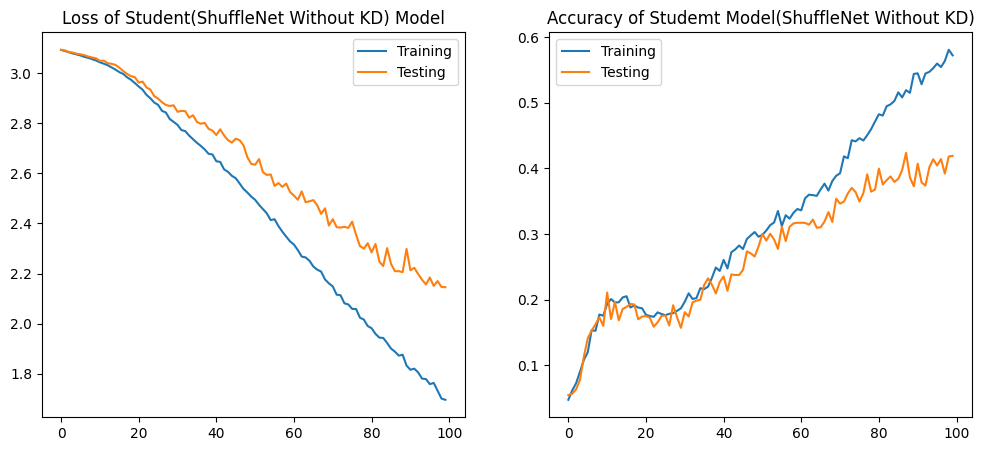

In [ ]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1, 2, 1)
  
# showing image
plt.plot(train_loss,label='Training')
plt.plot(val_los,label='Testing')
plt.legend()
plt.title("Loss of Student(ShuffleNet Without KD) Model")
fig.add_subplot(1, 2, 2)
  
# showing image
plt.plot(train_acc,label='Training')
plt.plot(val_acc,label='Testing')
plt.legend()
plt.title("Accuracy of Studemt Model(ShuffleNet Without KD)")
plt.show()


In [ ]:
classification_report(smodel2,test_loader)

Accuracy of model is : 0.45
                                   precision    recall  f1-score   support

Alstonia Scholaris diseased (P2a)       0.34      0.76      0.47        50
 Alstonia Scholaris healthy (P2b)       0.00      0.00      0.00        34
             Arjun diseased (P1a)       0.33      0.32      0.33        50
              Arjun healthy (P1b)       0.27      0.60      0.37        42
              Bael diseased (P4b)       0.00      0.00      0.00        21
               Basil healthy (P8)       0.00      0.00      0.00        25
           Chinar diseased (P11b)       0.00      0.00      0.00        25
            Chinar healthy (P11a)       0.00      0.00      0.00        17
             Gauva diseased (P3b)       0.00      0.00      0.00        28
              Gauva healthy (P3a)       0.48      0.54      0.51        50
             Jamun diseased (P5b)       0.56      0.88      0.68        51
              Jamun healthy (P5a)       0.55      0.67      0.61       

In [ ]:
train_loss1 = []
val_los1 = []
train_acc1 = []
val_acc1 = []
for i in range(100):
        l1 = []
        l2 = []
        a1 = []
        a2 = []
        start = timer()
        for img,labels in tqdm(sloader1, desc='Training', unit=' unit',leave=False,colour='red'):
            



           # print(end - start)
            
            
            
            img = img.to(device)
            labels = labels.to(device)
            
            output = smodel1(img)
            #print(output.shape)
            probs = F.softmax(output,dim=1)
            max_prob,preds = torch.max(probs,dim=1)
            #print(len(labels))
            acc1 = (torch.sum(preds == labels).item() / len(preds))
            compare = tmodel(img)
            pdist = F.softmax(compare/4,dim=1)  ##Teacher distribution
            max_prob1,preds1 = torch.max(pdist,dim=1)   #Teacher output
            #accu=[]
            a1.append(acc1)
            #gg = np.mean(accu)
            soft_loss_teacher = nn.KLDivLoss(reduction='batchmean')(F.log_softmax(output /4, dim=1), pdist)
            loss = nn.CrossEntropyLoss()(output,labels)
            loss = 0.2*16*loss + 0.8*16*soft_loss_teacher
            l1.append(loss.item())
            loss.backward()
            optimizers.step()
            optimizers.zero_grad()
            
        for a,b in tqdm(val_loader, desc='Training', unit=' unit',leave=False,colour='red'):
                a = a.to(device)
                b = b.to(device)
                rr = smodel1(a)
                val_loss = nn.CrossEntropyLoss()(rr,b)
                l2.append(val_loss.item())
                probs = F.softmax(rr,dim=1)
                max_prob,preds = torch.max(probs,dim=1)
                acc = (torch.sum(preds == b).item() / len(preds))
                a2.append(acc)
        train_loss1.append(np.mean(l1))
        val_los1.append(np.mean(l2))
        train_acc1.append(np.mean(a1))
        val_acc1.append(np.mean(a2))
        end = timer()
        time = end - start
        time = time/60
        print(f'Epoch {i+1}/100: Train Loss==> {np.mean(l1):.2f} Val Loss==> {np.mean(l2):.2f} Train_Acc==> {np.mean(a1):.2f} Val_Acc==> {np.mean(a2):.2f} Time==> {time:.2f} mins')   
        #print(i+1,loss,acc)

Epoch 1/100: Train Loss==> 11.70 Val Loss==> 3.09 Train_Acc==> 0.06 Val_Acc==> 0.06 Time==> 0.06 mins


Epoch 2/100: Train Loss==> 11.65 Val Loss==> 3.08 Train_Acc==> 0.09 Val_Acc==> 0.08 Time==> 0.05 mins


Epoch 3/100: Train Loss==> 11.62 Val Loss==> 3.07 Train_Acc==> 0.12 Val_Acc==> 0.13 Time==> 0.05 mins


Epoch 4/100: Train Loss==> 11.56 Val Loss==> 3.06 Train_Acc==> 0.14 Val_Acc==> 0.16 Time==> 0.05 mins


Epoch 5/100: Train Loss==> 11.51 Val Loss==> 3.05 Train_Acc==> 0.18 Val_Acc==> 0.16 Time==> 0.06 mins


Epoch 6/100: Train Loss==> 11.45 Val Loss==> 3.03 Train_Acc==> 0.19 Val_Acc==> 0.16 Time==> 0.05 mins


Epoch 7/100: Train Loss==> 11.37 Val Loss==> 3.01 Train_Acc==> 0.21 Val_Acc==> 0.18 Time==> 0.05 mins


Epoch 8/100: Train Loss==> 11.27 Val Loss==> 2.98 Train_Acc==> 0.21 Val_Acc==> 0.18 Time==> 0.06 mins


Epoch 9/100: Train Loss==> 11.16 Val Loss==> 2.95 Train_Acc==> 0.21 Val_Acc==> 0.21 Time==> 0.06 mins


Epoch 10/100: Train Loss==> 11.01 Val Loss==> 2.92 Train_Acc==> 0.22 Val_Acc==> 0.19 Time==> 0.05 mins


Epoch 11/100: Train Loss==> 10.88 Val Loss==> 2.90 Train_Acc==> 0.20 Val_Acc==> 0.18 Time==> 0.05 mins


Epoch 12/100: Train Loss==> 10.74 Val Loss==> 2.86 Train_Acc==> 0.21 Val_Acc==> 0.18 Time==> 0.06 mins


Epoch 13/100: Train Loss==> 10.58 Val Loss==> 2.84 Train_Acc==> 0.23 Val_Acc==> 0.20 Time==> 0.05 mins


Epoch 14/100: Train Loss==> 10.44 Val Loss==> 2.82 Train_Acc==> 0.24 Val_Acc==> 0.19 Time==> 0.05 mins


Epoch 15/100: Train Loss==> 10.33 Val Loss==> 2.78 Train_Acc==> 0.25 Val_Acc==> 0.21 Time==> 0.05 mins


Epoch 16/100: Train Loss==> 10.18 Val Loss==> 2.75 Train_Acc==> 0.25 Val_Acc==> 0.24 Time==> 0.06 mins


Epoch 17/100: Train Loss==> 10.06 Val Loss==> 2.74 Train_Acc==> 0.27 Val_Acc==> 0.25 Time==> 0.05 mins


Epoch 18/100: Train Loss==> 9.94 Val Loss==> 2.71 Train_Acc==> 0.28 Val_Acc==> 0.23 Time==> 0.05 mins


Epoch 19/100: Train Loss==> 9.80 Val Loss==> 2.68 Train_Acc==> 0.29 Val_Acc==> 0.26 Time==> 0.05 mins


Epoch 20/100: Train Loss==> 9.70 Val Loss==> 2.67 Train_Acc==> 0.31 Val_Acc==> 0.26 Time==> 0.06 mins


Epoch 21/100: Train Loss==> 9.57 Val Loss==> 2.64 Train_Acc==> 0.31 Val_Acc==> 0.27 Time==> 0.05 mins


Epoch 22/100: Train Loss==> 9.45 Val Loss==> 2.63 Train_Acc==> 0.33 Val_Acc==> 0.28 Time==> 0.05 mins


Epoch 23/100: Train Loss==> 9.36 Val Loss==> 2.60 Train_Acc==> 0.33 Val_Acc==> 0.27 Time==> 0.05 mins


Epoch 24/100: Train Loss==> 9.22 Val Loss==> 2.57 Train_Acc==> 0.34 Val_Acc==> 0.29 Time==> 0.06 mins


Epoch 25/100: Train Loss==> 9.12 Val Loss==> 2.57 Train_Acc==> 0.35 Val_Acc==> 0.29 Time==> 0.05 mins


Epoch 26/100: Train Loss==> 8.97 Val Loss==> 2.51 Train_Acc==> 0.35 Val_Acc==> 0.32 Time==> 0.05 mins


Epoch 27/100: Train Loss==> 8.84 Val Loss==> 2.49 Train_Acc==> 0.36 Val_Acc==> 0.32 Time==> 0.06 mins


Epoch 28/100: Train Loss==> 8.66 Val Loss==> 2.48 Train_Acc==> 0.36 Val_Acc==> 0.32 Time==> 0.06 mins


Epoch 29/100: Train Loss==> 8.55 Val Loss==> 2.46 Train_Acc==> 0.39 Val_Acc==> 0.32 Time==> 0.05 mins


Epoch 30/100: Train Loss==> 8.38 Val Loss==> 2.41 Train_Acc==> 0.39 Val_Acc==> 0.31 Time==> 0.05 mins


Epoch 31/100: Train Loss==> 8.23 Val Loss==> 2.38 Train_Acc==> 0.41 Val_Acc==> 0.33 Time==> 0.06 mins


Epoch 32/100: Train Loss==> 8.06 Val Loss==> 2.32 Train_Acc==> 0.41 Val_Acc==> 0.34 Time==> 0.06 mins


Epoch 33/100: Train Loss==> 7.93 Val Loss==> 2.35 Train_Acc==> 0.41 Val_Acc==> 0.32 Time==> 0.05 mins


Epoch 34/100: Train Loss==> 7.80 Val Loss==> 2.28 Train_Acc==> 0.42 Val_Acc==> 0.33 Time==> 0.05 mins


Epoch 35/100: Train Loss==> 7.66 Val Loss==> 2.27 Train_Acc==> 0.44 Val_Acc==> 0.33 Time==> 0.06 mins


Epoch 36/100: Train Loss==> 7.55 Val Loss==> 2.28 Train_Acc==> 0.45 Val_Acc==> 0.33 Time==> 0.06 mins


Epoch 37/100: Train Loss==> 7.38 Val Loss==> 2.25 Train_Acc==> 0.46 Val_Acc==> 0.35 Time==> 0.06 mins


Epoch 38/100: Train Loss==> 7.33 Val Loss==> 2.19 Train_Acc==> 0.46 Val_Acc==> 0.36 Time==> 0.05 mins


Epoch 39/100: Train Loss==> 7.21 Val Loss==> 2.16 Train_Acc==> 0.46 Val_Acc==> 0.36 Time==> 0.06 mins


Epoch 40/100: Train Loss==> 7.08 Val Loss==> 2.22 Train_Acc==> 0.47 Val_Acc==> 0.34 Time==> 0.05 mins


Epoch 41/100: Train Loss==> 6.94 Val Loss==> 2.10 Train_Acc==> 0.49 Val_Acc==> 0.40 Time==> 0.05 mins


Epoch 42/100: Train Loss==> 6.79 Val Loss==> 2.14 Train_Acc==> 0.49 Val_Acc==> 0.37 Time==> 0.06 mins


Epoch 43/100: Train Loss==> 6.76 Val Loss==> 2.05 Train_Acc==> 0.49 Val_Acc==> 0.42 Time==> 0.06 mins


Epoch 44/100: Train Loss==> 6.63 Val Loss==> 2.10 Train_Acc==> 0.50 Val_Acc==> 0.38 Time==> 0.05 mins


Epoch 45/100: Train Loss==> 6.53 Val Loss==> 2.05 Train_Acc==> 0.51 Val_Acc==> 0.39 Time==> 0.05 mins


Epoch 46/100: Train Loss==> 6.39 Val Loss==> 2.09 Train_Acc==> 0.51 Val_Acc==> 0.38 Time==> 0.06 mins


Epoch 47/100: Train Loss==> 6.24 Val Loss==> 1.98 Train_Acc==> 0.54 Val_Acc==> 0.42 Time==> 0.05 mins


Epoch 48/100: Train Loss==> 6.24 Val Loss==> 1.96 Train_Acc==> 0.51 Val_Acc==> 0.43 Time==> 0.05 mins


Epoch 49/100: Train Loss==> 6.15 Val Loss==> 1.95 Train_Acc==> 0.53 Val_Acc==> 0.45 Time==> 0.05 mins


Epoch 50/100: Train Loss==> 5.99 Val Loss==> 1.97 Train_Acc==> 0.54 Val_Acc==> 0.42 Time==> 0.06 mins


Epoch 51/100: Train Loss==> 5.90 Val Loss==> 1.94 Train_Acc==> 0.55 Val_Acc==> 0.40 Time==> 0.05 mins


Epoch 52/100: Train Loss==> 5.75 Val Loss==> 1.94 Train_Acc==> 0.57 Val_Acc==> 0.42 Time==> 0.05 mins


Epoch 53/100: Train Loss==> 5.67 Val Loss==> 1.88 Train_Acc==> 0.56 Val_Acc==> 0.43 Time==> 0.05 mins


Epoch 54/100: Train Loss==> 5.57 Val Loss==> 1.86 Train_Acc==> 0.56 Val_Acc==> 0.43 Time==> 0.06 mins


Epoch 55/100: Train Loss==> 5.52 Val Loss==> 1.81 Train_Acc==> 0.57 Val_Acc==> 0.45 Time==> 0.05 mins


Epoch 56/100: Train Loss==> 5.37 Val Loss==> 1.81 Train_Acc==> 0.59 Val_Acc==> 0.46 Time==> 0.05 mins


Epoch 57/100: Train Loss==> 5.23 Val Loss==> 1.81 Train_Acc==> 0.60 Val_Acc==> 0.43 Time==> 0.05 mins


Epoch 58/100: Train Loss==> 5.17 Val Loss==> 1.76 Train_Acc==> 0.59 Val_Acc==> 0.45 Time==> 0.06 mins


Epoch 59/100: Train Loss==> 5.02 Val Loss==> 1.79 Train_Acc==> 0.62 Val_Acc==> 0.47 Time==> 0.05 mins


Epoch 60/100: Train Loss==> 4.91 Val Loss==> 1.74 Train_Acc==> 0.62 Val_Acc==> 0.46 Time==> 0.05 mins


Epoch 61/100: Train Loss==> 4.85 Val Loss==> 1.70 Train_Acc==> 0.63 Val_Acc==> 0.47 Time==> 0.06 mins


Epoch 62/100: Train Loss==> 4.71 Val Loss==> 1.70 Train_Acc==> 0.64 Val_Acc==> 0.45 Time==> 0.06 mins


Epoch 63/100: Train Loss==> 4.55 Val Loss==> 1.66 Train_Acc==> 0.65 Val_Acc==> 0.49 Time==> 0.05 mins


Epoch 64/100: Train Loss==> 4.57 Val Loss==> 1.61 Train_Acc==> 0.66 Val_Acc==> 0.50 Time==> 0.05 mins


Epoch 65/100: Train Loss==> 4.35 Val Loss==> 1.70 Train_Acc==> 0.67 Val_Acc==> 0.49 Time==> 0.06 mins


Epoch 66/100: Train Loss==> 4.21 Val Loss==> 1.59 Train_Acc==> 0.68 Val_Acc==> 0.48 Time==> 0.05 mins


Epoch 67/100: Train Loss==> 4.14 Val Loss==> 1.54 Train_Acc==> 0.68 Val_Acc==> 0.50 Time==> 0.05 mins


Epoch 68/100: Train Loss==> 4.06 Val Loss==> 1.59 Train_Acc==> 0.69 Val_Acc==> 0.50 Time==> 0.05 mins


Epoch 69/100: Train Loss==> 3.97 Val Loss==> 1.53 Train_Acc==> 0.69 Val_Acc==> 0.52 Time==> 0.06 mins


Epoch 70/100: Train Loss==> 3.79 Val Loss==> 1.51 Train_Acc==> 0.70 Val_Acc==> 0.50 Time==> 0.05 mins


Epoch 71/100: Train Loss==> 3.77 Val Loss==> 1.53 Train_Acc==> 0.71 Val_Acc==> 0.51 Time==> 0.05 mins


Epoch 72/100: Train Loss==> 3.60 Val Loss==> 1.46 Train_Acc==> 0.72 Val_Acc==> 0.53 Time==> 0.05 mins


Epoch 73/100: Train Loss==> 3.68 Val Loss==> 1.47 Train_Acc==> 0.71 Val_Acc==> 0.53 Time==> 0.06 mins


Epoch 74/100: Train Loss==> 3.46 Val Loss==> 1.44 Train_Acc==> 0.73 Val_Acc==> 0.51 Time==> 0.05 mins


Epoch 75/100: Train Loss==> 3.40 Val Loss==> 1.46 Train_Acc==> 0.74 Val_Acc==> 0.52 Time==> 0.05 mins


Epoch 76/100: Train Loss==> 3.30 Val Loss==> 1.44 Train_Acc==> 0.74 Val_Acc==> 0.53 Time==> 0.06 mins


Epoch 77/100: Train Loss==> 3.23 Val Loss==> 1.38 Train_Acc==> 0.75 Val_Acc==> 0.53 Time==> 0.06 mins


Epoch 78/100: Train Loss==> 3.16 Val Loss==> 1.47 Train_Acc==> 0.77 Val_Acc==> 0.52 Time==> 0.05 mins


Epoch 79/100: Train Loss==> 3.02 Val Loss==> 1.46 Train_Acc==> 0.78 Val_Acc==> 0.50 Time==> 0.05 mins


Epoch 80/100: Train Loss==> 3.06 Val Loss==> 1.42 Train_Acc==> 0.77 Val_Acc==> 0.55 Time==> 0.06 mins


Epoch 81/100: Train Loss==> 2.95 Val Loss==> 1.34 Train_Acc==> 0.79 Val_Acc==> 0.57 Time==> 0.05 mins


Epoch 82/100: Train Loss==> 2.90 Val Loss==> 1.34 Train_Acc==> 0.79 Val_Acc==> 0.56 Time==> 0.05 mins


Epoch 83/100: Train Loss==> 2.83 Val Loss==> 1.33 Train_Acc==> 0.79 Val_Acc==> 0.56 Time==> 0.05 mins


Epoch 84/100: Train Loss==> 2.82 Val Loss==> 1.34 Train_Acc==> 0.80 Val_Acc==> 0.56 Time==> 0.06 mins


Epoch 85/100: Train Loss==> 2.75 Val Loss==> 1.37 Train_Acc==> 0.81 Val_Acc==> 0.56 Time==> 0.05 mins


Epoch 86/100: Train Loss==> 2.64 Val Loss==> 1.33 Train_Acc==> 0.82 Val_Acc==> 0.53 Time==> 0.05 mins


Epoch 87/100: Train Loss==> 2.65 Val Loss==> 1.30 Train_Acc==> 0.81 Val_Acc==> 0.59 Time==> 0.05 mins


Epoch 88/100: Train Loss==> 2.58 Val Loss==> 1.31 Train_Acc==> 0.83 Val_Acc==> 0.56 Time==> 0.06 mins


Epoch 89/100: Train Loss==> 2.50 Val Loss==> 1.35 Train_Acc==> 0.84 Val_Acc==> 0.58 Time==> 0.05 mins


Epoch 90/100: Train Loss==> 2.45 Val Loss==> 1.32 Train_Acc==> 0.85 Val_Acc==> 0.55 Time==> 0.05 mins


Epoch 91/100: Train Loss==> 2.34 Val Loss==> 1.30 Train_Acc==> 0.86 Val_Acc==> 0.58 Time==> 0.06 mins


Epoch 92/100: Train Loss==> 2.35 Val Loss==> 1.37 Train_Acc==> 0.86 Val_Acc==> 0.55 Time==> 0.06 mins


Epoch 93/100: Train Loss==> 2.31 Val Loss==> 1.26 Train_Acc==> 0.86 Val_Acc==> 0.60 Time==> 0.05 mins


Epoch 94/100: Train Loss==> 2.30 Val Loss==> 1.25 Train_Acc==> 0.86 Val_Acc==> 0.62 Time==> 0.05 mins


Epoch 95/100: Train Loss==> 2.17 Val Loss==> 1.22 Train_Acc==> 0.88 Val_Acc==> 0.62 Time==> 0.06 mins


Epoch 96/100: Train Loss==> 2.16 Val Loss==> 1.24 Train_Acc==> 0.88 Val_Acc==> 0.61 Time==> 0.06 mins


Epoch 97/100: Train Loss==> 2.13 Val Loss==> 1.26 Train_Acc==> 0.89 Val_Acc==> 0.61 Time==> 0.05 mins


Epoch 98/100: Train Loss==> 2.12 Val Loss==> 1.19 Train_Acc==> 0.89 Val_Acc==> 0.64 Time==> 0.05 mins


Epoch 99/100: Train Loss==> 2.10 Val Loss==> 1.26 Train_Acc==> 0.89 Val_Acc==> 0.63 Time==> 0.06 mins


Epoch 100/100: Train Loss==> 1.95 Val Loss==> 1.26 Train_Acc==> 0.90 Val_Acc==> 0.62 Time==> 0.05 mins


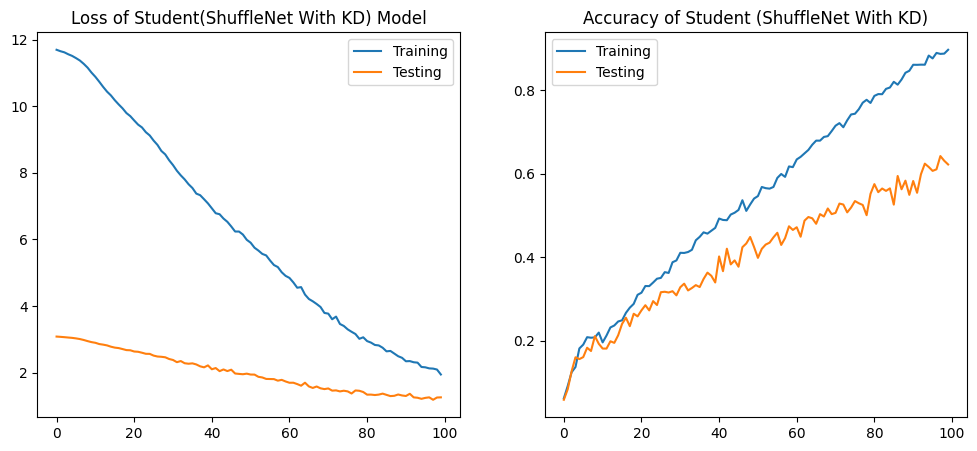

In [ ]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1, 2, 1)
  
# showing image
plt.plot(train_loss1,label='Training')
plt.plot(val_los1,label='Testing')
plt.legend()
plt.title("Loss of Student(ShuffleNet With KD) Model")
fig.add_subplot(1, 2, 2)
  
# showing image
plt.plot(train_acc1,label='Training')
plt.plot(val_acc1,label='Testing')
plt.legend()
plt.title("Accuracy of Student (ShuffleNet With KD)")
plt.show()


In [ ]:
classification_report(smodel1,test_loader)

Accuracy of model is : 0.63
                                   precision    recall  f1-score   support

Alstonia Scholaris diseased (P2a)       0.59      0.74      0.65        50
 Alstonia Scholaris healthy (P2b)       0.52      0.41      0.46        34
             Arjun diseased (P1a)       0.70      0.78      0.74        50
              Arjun healthy (P1b)       0.60      0.57      0.59        42
              Bael diseased (P4b)       0.88      0.33      0.48        21
               Basil healthy (P8)       0.35      0.48      0.41        25
           Chinar diseased (P11b)       0.79      0.44      0.56        25
            Chinar healthy (P11a)       0.00      0.00      0.00        17
             Gauva diseased (P3b)       0.48      0.39      0.43        28
              Gauva healthy (P3a)       0.70      0.64      0.67        50
             Jamun diseased (P5b)       0.59      0.86      0.70        51
              Jamun healthy (P5a)       0.60      0.69      0.64       

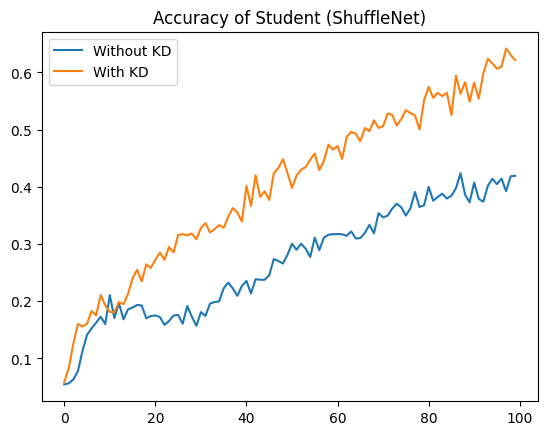

In [ ]:
plt.plot(val_acc,label='Without KD')
plt.plot(val_acc1,label='With KD')
plt.legend()
plt.title("Accuracy of Student (ShuffleNet)")
plt.show()


In [ ]:
joblib.dump(smodel1, 'shufflemodel_dnet.pkl')

['shufflemodel_dnet.pkl']

# ResNET Teacher

In [ ]:
smodel1 = torch.hub.load('pytorch/vision:v0.10.0', 'shufflenet_v2_x1_0', pretrained=1)
smodel1.fc = nn.Sequential(
    nn.Linear(in_features = 1024,out_features=22),
)

for name, child in smodel1.named_children():
   if name in ['stage3','stage4','conv5','fc']:
       print(name + ' is unfrozen')
       for param in child.parameters():
           param.requires_grad = True
   else:
       print(name + ' is frozen')
       for param in child.parameters():
           param.requires_grad = False

smodel2 = torch.hub.load('pytorch/vision:v0.10.0', 'shufflenet_v2_x1_0', pretrained=1)
smodel2.fc = nn.Sequential(
    nn.Linear(in_features = 1024,out_features=22),
)

for name, child in smodel2.named_children():
   if name in ['stage3','stage4','conv5','fc']:
       print(name + ' is unfrozen')
       for param in child.parameters():
           param.requires_grad = True
   else:
       print(name + ' is frozen')
       for param in child.parameters():
           param.requires_grad = False
optimizers = torch.optim.Adadelta(filter(lambda p: p.requires_grad, smodel1.parameters()), lr=0.02)
#smodel2 = smodel()
smodel1 = smodel1.cuda()
smodel2 = smodel2.cuda()
#optimizers = torch.optim.Adadelta(smodel1.parameters(), lr=0.6,weight_decay=1e-5)
optimizers2 = torch.optim.Adadelta(filter(lambda p: p.requires_grad, smodel2.parameters()), lr=0.02)

conv1 is frozen
maxpool is frozen
stage2 is frozen
stage3 is unfrozen
stage4 is unfrozen
conv5 is unfrozen
fc is unfrozen
conv1 is frozen
maxpool is frozen
stage2 is frozen
stage3 is unfrozen
stage4 is unfrozen
conv5 is unfrozen
fc is unfrozen


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


In [ ]:
train_loss = []
val_los = []
train_acc = []
val_acc = []
for i in range(100):
        l1 = []
        l2 = []
        a1 = []
        a2 = []
        start = timer()
        for img,labels in tqdm(sloader1, desc='Training', unit=' unit',leave=False,colour='red'):
            



           # print(end - start)
            
            
            
            img = img.to(device)
            labels = labels.to(device)
            
            output = smodel2(img)
            #print(output.shape)
            probs = F.softmax(output,dim=1)
            max_prob,preds = torch.max(probs,dim=1)
            #print(len(labels))
            acc1 = (torch.sum(preds == labels).item() / len(preds))
            #compare = tmodel(img)
            #pdist = F.softmax(compare/4,dim=1)  ##Teacher distribution
            #max_prob1,preds1 = torch.max(pdist,dim=1)   #Teacher output
            #accu=[]
            a1.append(acc1)
            #gg = np.mean(accu)
            #soft_loss_teacher = nn.KLDivLoss(reduction='batchmean')(F.log_softmax(output / 4, dim=1), pdist)
            loss = nn.CrossEntropyLoss()(output,labels)
            #loss = 0.2*loss + 0.8*soft_loss_teacher
            l1.append(loss.item())
            loss.backward()
            optimizers2.step()
            optimizers2.zero_grad()
            
        for a,b in tqdm(val_loader, desc='Training', unit=' unit',leave=False,colour='red'):
                a = a.to(device)
                b = b.to(device)
                rr = smodel2(a)
                val_loss = nn.CrossEntropyLoss()(rr,b)
                l2.append(val_loss.item())
                probs = F.softmax(rr,dim=1)
                max_prob,preds = torch.max(probs,dim=1)
                acc = (torch.sum(preds == b).item() / len(preds))
                a2.append(acc)
        train_loss.append(np.mean(l1))
        val_los.append(np.mean(l2))
        train_acc.append(np.mean(a1))
        val_acc.append(np.mean(a2))
        end = timer()
        time = end - start
        time = time/60
        print(f'Epoch {i+1}/100: Train Loss==> {np.mean(l1):.2f} Val Loss==> {np.mean(l2):.2f} Train_Acc==> {np.mean(a1):.2f} Val_Acc==> {np.mean(a2):.2f} Time==> {time:.2f} mins')   
        #print(i+1,loss,acc)

Epoch 1/100: Train Loss==> 3.09 Val Loss==> 3.09 Train_Acc==> 0.05 Val_Acc==> 0.04 Time==> 0.02 mins


Epoch 2/100: Train Loss==> 3.09 Val Loss==> 3.09 Train_Acc==> 0.07 Val_Acc==> 0.07 Time==> 0.02 mins


Epoch 3/100: Train Loss==> 3.08 Val Loss==> 3.08 Train_Acc==> 0.07 Val_Acc==> 0.10 Time==> 0.02 mins


Epoch 4/100: Train Loss==> 3.08 Val Loss==> 3.08 Train_Acc==> 0.11 Val_Acc==> 0.10 Time==> 0.02 mins


Epoch 5/100: Train Loss==> 3.07 Val Loss==> 3.07 Train_Acc==> 0.11 Val_Acc==> 0.13 Time==> 0.02 mins


Epoch 6/100: Train Loss==> 3.07 Val Loss==> 3.07 Train_Acc==> 0.13 Val_Acc==> 0.12 Time==> 0.02 mins


Epoch 7/100: Train Loss==> 3.06 Val Loss==> 3.07 Train_Acc==> 0.15 Val_Acc==> 0.14 Time==> 0.02 mins


Epoch 8/100: Train Loss==> 3.06 Val Loss==> 3.06 Train_Acc==> 0.16 Val_Acc==> 0.17 Time==> 0.02 mins


Epoch 9/100: Train Loss==> 3.05 Val Loss==> 3.06 Train_Acc==> 0.16 Val_Acc==> 0.14 Time==> 0.02 mins


Epoch 10/100: Train Loss==> 3.05 Val Loss==> 3.05 Train_Acc==> 0.17 Val_Acc==> 0.17 Time==> 0.02 mins


Epoch 11/100: Train Loss==> 3.04 Val Loss==> 3.04 Train_Acc==> 0.17 Val_Acc==> 0.16 Time==> 0.02 mins


Epoch 12/100: Train Loss==> 3.03 Val Loss==> 3.04 Train_Acc==> 0.17 Val_Acc==> 0.17 Time==> 0.03 mins


Epoch 13/100: Train Loss==> 3.02 Val Loss==> 3.03 Train_Acc==> 0.17 Val_Acc==> 0.17 Time==> 0.02 mins


Epoch 14/100: Train Loss==> 3.01 Val Loss==> 3.02 Train_Acc==> 0.18 Val_Acc==> 0.17 Time==> 0.02 mins


Epoch 15/100: Train Loss==> 3.00 Val Loss==> 3.01 Train_Acc==> 0.18 Val_Acc==> 0.16 Time==> 0.02 mins


Epoch 16/100: Train Loss==> 2.99 Val Loss==> 3.00 Train_Acc==> 0.18 Val_Acc==> 0.13 Time==> 0.02 mins


Epoch 17/100: Train Loss==> 2.98 Val Loss==> 3.00 Train_Acc==> 0.17 Val_Acc==> 0.14 Time==> 0.02 mins


Epoch 18/100: Train Loss==> 2.97 Val Loss==> 2.98 Train_Acc==> 0.16 Val_Acc==> 0.15 Time==> 0.02 mins


Epoch 19/100: Train Loss==> 2.95 Val Loss==> 2.97 Train_Acc==> 0.17 Val_Acc==> 0.13 Time==> 0.02 mins


Epoch 20/100: Train Loss==> 2.94 Val Loss==> 2.96 Train_Acc==> 0.16 Val_Acc==> 0.15 Time==> 0.02 mins


Epoch 21/100: Train Loss==> 2.93 Val Loss==> 2.94 Train_Acc==> 0.16 Val_Acc==> 0.15 Time==> 0.02 mins


Epoch 22/100: Train Loss==> 2.91 Val Loss==> 2.93 Train_Acc==> 0.15 Val_Acc==> 0.17 Time==> 0.02 mins


Epoch 23/100: Train Loss==> 2.89 Val Loss==> 2.92 Train_Acc==> 0.17 Val_Acc==> 0.13 Time==> 0.03 mins


Epoch 24/100: Train Loss==> 2.88 Val Loss==> 2.92 Train_Acc==> 0.16 Val_Acc==> 0.14 Time==> 0.02 mins


Epoch 25/100: Train Loss==> 2.86 Val Loss==> 2.88 Train_Acc==> 0.16 Val_Acc==> 0.13 Time==> 0.02 mins


Epoch 26/100: Train Loss==> 2.84 Val Loss==> 2.88 Train_Acc==> 0.16 Val_Acc==> 0.14 Time==> 0.02 mins


Epoch 27/100: Train Loss==> 2.83 Val Loss==> 2.88 Train_Acc==> 0.17 Val_Acc==> 0.13 Time==> 0.02 mins


Epoch 28/100: Train Loss==> 2.81 Val Loss==> 2.88 Train_Acc==> 0.16 Val_Acc==> 0.15 Time==> 0.02 mins


Epoch 29/100: Train Loss==> 2.80 Val Loss==> 2.85 Train_Acc==> 0.19 Val_Acc==> 0.14 Time==> 0.02 mins


Epoch 30/100: Train Loss==> 2.78 Val Loss==> 2.85 Train_Acc==> 0.18 Val_Acc==> 0.16 Time==> 0.02 mins


Epoch 31/100: Train Loss==> 2.77 Val Loss==> 2.82 Train_Acc==> 0.19 Val_Acc==> 0.17 Time==> 0.02 mins


Epoch 32/100: Train Loss==> 2.76 Val Loss==> 2.81 Train_Acc==> 0.19 Val_Acc==> 0.18 Time==> 0.02 mins


Epoch 33/100: Train Loss==> 2.74 Val Loss==> 2.82 Train_Acc==> 0.21 Val_Acc==> 0.17 Time==> 0.02 mins


Epoch 34/100: Train Loss==> 2.73 Val Loss==> 2.81 Train_Acc==> 0.22 Val_Acc==> 0.20 Time==> 0.03 mins


Epoch 35/100: Train Loss==> 2.71 Val Loss==> 2.82 Train_Acc==> 0.23 Val_Acc==> 0.20 Time==> 0.02 mins


Epoch 36/100: Train Loss==> 2.69 Val Loss==> 2.78 Train_Acc==> 0.24 Val_Acc==> 0.23 Time==> 0.02 mins


Epoch 37/100: Train Loss==> 2.68 Val Loss==> 2.79 Train_Acc==> 0.24 Val_Acc==> 0.22 Time==> 0.02 mins


Epoch 38/100: Train Loss==> 2.67 Val Loss==> 2.77 Train_Acc==> 0.25 Val_Acc==> 0.24 Time==> 0.02 mins


Epoch 39/100: Train Loss==> 2.65 Val Loss==> 2.76 Train_Acc==> 0.27 Val_Acc==> 0.24 Time==> 0.02 mins


Epoch 40/100: Train Loss==> 2.65 Val Loss==> 2.79 Train_Acc==> 0.26 Val_Acc==> 0.22 Time==> 0.02 mins


Epoch 41/100: Train Loss==> 2.64 Val Loss==> 2.76 Train_Acc==> 0.28 Val_Acc==> 0.25 Time==> 0.02 mins


Epoch 42/100: Train Loss==> 2.61 Val Loss==> 2.74 Train_Acc==> 0.28 Val_Acc==> 0.26 Time==> 0.02 mins


Epoch 43/100: Train Loss==> 2.60 Val Loss==> 2.74 Train_Acc==> 0.29 Val_Acc==> 0.23 Time==> 0.02 mins


Epoch 44/100: Train Loss==> 2.58 Val Loss==> 2.70 Train_Acc==> 0.31 Val_Acc==> 0.27 Time==> 0.03 mins


Epoch 45/100: Train Loss==> 2.57 Val Loss==> 2.70 Train_Acc==> 0.30 Val_Acc==> 0.27 Time==> 0.02 mins


Epoch 46/100: Train Loss==> 2.56 Val Loss==> 2.70 Train_Acc==> 0.31 Val_Acc==> 0.27 Time==> 0.02 mins


Epoch 47/100: Train Loss==> 2.56 Val Loss==> 2.68 Train_Acc==> 0.32 Val_Acc==> 0.28 Time==> 0.02 mins


Epoch 48/100: Train Loss==> 2.54 Val Loss==> 2.73 Train_Acc==> 0.32 Val_Acc==> 0.27 Time==> 0.02 mins


Epoch 49/100: Train Loss==> 2.53 Val Loss==> 2.66 Train_Acc==> 0.34 Val_Acc==> 0.31 Time==> 0.02 mins


Epoch 50/100: Train Loss==> 2.51 Val Loss==> 2.68 Train_Acc==> 0.34 Val_Acc==> 0.30 Time==> 0.02 mins


Epoch 51/100: Train Loss==> 2.51 Val Loss==> 2.67 Train_Acc==> 0.35 Val_Acc==> 0.29 Time==> 0.02 mins


Epoch 52/100: Train Loss==> 2.50 Val Loss==> 2.71 Train_Acc==> 0.34 Val_Acc==> 0.30 Time==> 0.02 mins


Epoch 53/100: Train Loss==> 2.47 Val Loss==> 2.65 Train_Acc==> 0.37 Val_Acc==> 0.30 Time==> 0.02 mins


Epoch 54/100: Train Loss==> 2.47 Val Loss==> 2.62 Train_Acc==> 0.34 Val_Acc==> 0.33 Time==> 0.02 mins


Epoch 55/100: Train Loss==> 2.45 Val Loss==> 2.62 Train_Acc==> 0.35 Val_Acc==> 0.31 Time==> 0.03 mins


Epoch 56/100: Train Loss==> 2.45 Val Loss==> 2.63 Train_Acc==> 0.36 Val_Acc==> 0.30 Time==> 0.03 mins


Epoch 57/100: Train Loss==> 2.43 Val Loss==> 2.59 Train_Acc==> 0.36 Val_Acc==> 0.33 Time==> 0.02 mins


Epoch 58/100: Train Loss==> 2.42 Val Loss==> 2.61 Train_Acc==> 0.37 Val_Acc==> 0.31 Time==> 0.02 mins


Epoch 59/100: Train Loss==> 2.40 Val Loss==> 2.58 Train_Acc==> 0.38 Val_Acc==> 0.32 Time==> 0.02 mins


Epoch 60/100: Train Loss==> 2.38 Val Loss==> 2.58 Train_Acc==> 0.37 Val_Acc==> 0.33 Time==> 0.02 mins


Epoch 61/100: Train Loss==> 2.37 Val Loss==> 2.58 Train_Acc==> 0.38 Val_Acc==> 0.31 Time==> 0.02 mins


Epoch 62/100: Train Loss==> 2.35 Val Loss==> 2.55 Train_Acc==> 0.39 Val_Acc==> 0.34 Time==> 0.02 mins


Epoch 63/100: Train Loss==> 2.34 Val Loss==> 2.54 Train_Acc==> 0.40 Val_Acc==> 0.33 Time==> 0.02 mins


Epoch 64/100: Train Loss==> 2.33 Val Loss==> 2.58 Train_Acc==> 0.39 Val_Acc==> 0.31 Time==> 0.02 mins


Epoch 65/100: Train Loss==> 2.30 Val Loss==> 2.58 Train_Acc==> 0.41 Val_Acc==> 0.32 Time==> 0.02 mins


Epoch 66/100: Train Loss==> 2.28 Val Loss==> 2.55 Train_Acc==> 0.41 Val_Acc==> 0.32 Time==> 0.02 mins


Epoch 67/100: Train Loss==> 2.28 Val Loss==> 2.48 Train_Acc==> 0.41 Val_Acc==> 0.34 Time==> 0.03 mins


Epoch 68/100: Train Loss==> 2.26 Val Loss==> 2.51 Train_Acc==> 0.40 Val_Acc==> 0.33 Time==> 0.02 mins


Epoch 69/100: Train Loss==> 2.26 Val Loss==> 2.47 Train_Acc==> 0.41 Val_Acc==> 0.34 Time==> 0.02 mins


Epoch 70/100: Train Loss==> 2.23 Val Loss==> 2.46 Train_Acc==> 0.42 Val_Acc==> 0.34 Time==> 0.02 mins


Epoch 71/100: Train Loss==> 2.21 Val Loss==> 2.48 Train_Acc==> 0.42 Val_Acc==> 0.32 Time==> 0.02 mins


Epoch 72/100: Train Loss==> 2.20 Val Loss==> 2.49 Train_Acc==> 0.43 Val_Acc==> 0.33 Time==> 0.02 mins


Epoch 73/100: Train Loss==> 2.17 Val Loss==> 2.46 Train_Acc==> 0.44 Val_Acc==> 0.34 Time==> 0.02 mins


Epoch 74/100: Train Loss==> 2.18 Val Loss==> 2.41 Train_Acc==> 0.43 Val_Acc==> 0.35 Time==> 0.02 mins


Epoch 75/100: Train Loss==> 2.15 Val Loss==> 2.38 Train_Acc==> 0.43 Val_Acc==> 0.36 Time==> 0.02 mins


Epoch 76/100: Train Loss==> 2.12 Val Loss==> 2.43 Train_Acc==> 0.45 Val_Acc==> 0.32 Time==> 0.02 mins


Epoch 77/100: Train Loss==> 2.11 Val Loss==> 2.39 Train_Acc==> 0.45 Val_Acc==> 0.35 Time==> 0.02 mins


Epoch 78/100: Train Loss==> 2.08 Val Loss==> 2.41 Train_Acc==> 0.45 Val_Acc==> 0.36 Time==> 0.02 mins


Epoch 79/100: Train Loss==> 2.07 Val Loss==> 2.35 Train_Acc==> 0.47 Val_Acc==> 0.37 Time==> 0.02 mins


Epoch 80/100: Train Loss==> 2.06 Val Loss==> 2.35 Train_Acc==> 0.46 Val_Acc==> 0.37 Time==> 0.02 mins


Epoch 81/100: Train Loss==> 2.05 Val Loss==> 2.33 Train_Acc==> 0.45 Val_Acc==> 0.37 Time==> 0.02 mins


Epoch 82/100: Train Loss==> 2.02 Val Loss==> 2.29 Train_Acc==> 0.46 Val_Acc==> 0.38 Time==> 0.02 mins


Epoch 83/100: Train Loss==> 2.00 Val Loss==> 2.29 Train_Acc==> 0.48 Val_Acc==> 0.37 Time==> 0.02 mins


Epoch 84/100: Train Loss==> 2.01 Val Loss==> 2.31 Train_Acc==> 0.47 Val_Acc==> 0.37 Time==> 0.02 mins


Epoch 85/100: Train Loss==> 1.99 Val Loss==> 2.26 Train_Acc==> 0.48 Val_Acc==> 0.39 Time==> 0.02 mins


Epoch 86/100: Train Loss==> 1.95 Val Loss==> 2.25 Train_Acc==> 0.49 Val_Acc==> 0.37 Time==> 0.02 mins


Epoch 87/100: Train Loss==> 1.93 Val Loss==> 2.27 Train_Acc==> 0.50 Val_Acc==> 0.36 Time==> 0.02 mins


Epoch 88/100: Train Loss==> 1.94 Val Loss==> 2.24 Train_Acc==> 0.48 Val_Acc==> 0.38 Time==> 0.02 mins


Epoch 89/100: Train Loss==> 1.91 Val Loss==> 2.19 Train_Acc==> 0.51 Val_Acc==> 0.40 Time==> 0.02 mins


Epoch 90/100: Train Loss==> 1.90 Val Loss==> 2.25 Train_Acc==> 0.50 Val_Acc==> 0.39 Time==> 0.02 mins


Epoch 91/100: Train Loss==> 1.89 Val Loss==> 2.23 Train_Acc==> 0.50 Val_Acc==> 0.37 Time==> 0.02 mins


Epoch 92/100: Train Loss==> 1.85 Val Loss==> 2.17 Train_Acc==> 0.52 Val_Acc==> 0.42 Time==> 0.02 mins


Epoch 93/100: Train Loss==> 1.83 Val Loss==> 2.24 Train_Acc==> 0.52 Val_Acc==> 0.37 Time==> 0.02 mins


Epoch 94/100: Train Loss==> 1.82 Val Loss==> 2.17 Train_Acc==> 0.52 Val_Acc==> 0.40 Time==> 0.02 mins


Epoch 95/100: Train Loss==> 1.80 Val Loss==> 2.13 Train_Acc==> 0.52 Val_Acc==> 0.41 Time==> 0.02 mins


Epoch 96/100: Train Loss==> 1.80 Val Loss==> 2.17 Train_Acc==> 0.51 Val_Acc==> 0.39 Time==> 0.02 mins


Epoch 97/100: Train Loss==> 1.80 Val Loss==> 2.16 Train_Acc==> 0.52 Val_Acc==> 0.41 Time==> 0.02 mins


Epoch 98/100: Train Loss==> 1.76 Val Loss==> 2.21 Train_Acc==> 0.53 Val_Acc==> 0.40 Time==> 0.02 mins


Epoch 99/100: Train Loss==> 1.76 Val Loss==> 2.19 Train_Acc==> 0.53 Val_Acc==> 0.39 Time==> 0.02 mins


Epoch 100/100: Train Loss==> 1.72 Val Loss==> 2.12 Train_Acc==> 0.54 Val_Acc==> 0.42 Time==> 0.02 mins


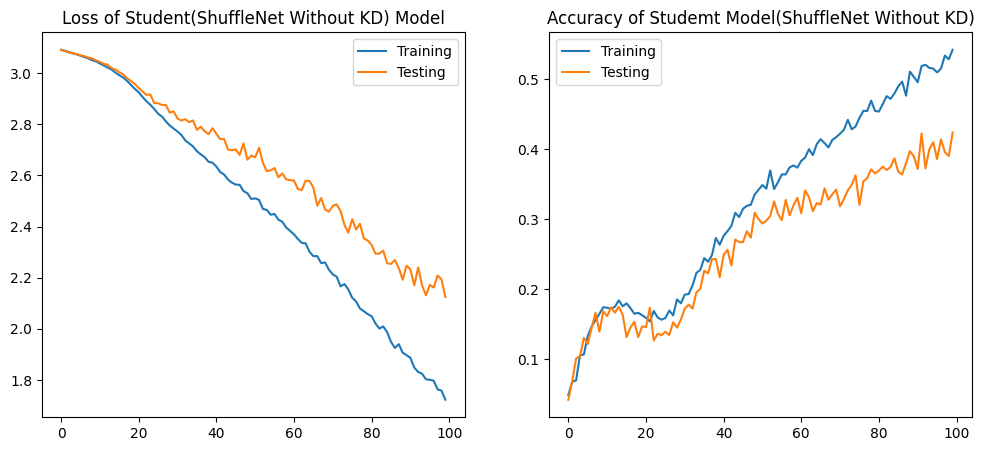

In [ ]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1, 2, 1)
  
# showing image
plt.plot(train_loss,label='Training')
plt.plot(val_los,label='Testing')
plt.legend()
plt.title("Loss of Student(ShuffleNet Without KD) Model")
fig.add_subplot(1, 2, 2)
  
# showing image
plt.plot(train_acc,label='Training')
plt.plot(val_acc,label='Testing')
plt.legend()
plt.title("Accuracy of Studemt Model(ShuffleNet Without KD)")
plt.show()


In [ ]:
classification_report(smodel2,test_loader)

Accuracy of model is : 0.41
                                   precision    recall  f1-score   support

Alstonia Scholaris diseased (P2a)       0.28      0.50      0.36        50
 Alstonia Scholaris healthy (P2b)       0.00      0.00      0.00        34
             Arjun diseased (P1a)       0.46      0.58      0.51        50
              Arjun healthy (P1b)       0.43      0.14      0.21        42
              Bael diseased (P4b)       0.00      0.00      0.00        21
               Basil healthy (P8)       0.00      0.00      0.00        25
           Chinar diseased (P11b)       0.00      0.00      0.00        25
            Chinar healthy (P11a)       0.00      0.00      0.00        17
             Gauva diseased (P3b)       0.00      0.00      0.00        28
              Gauva healthy (P3a)       0.49      0.76      0.59        50
             Jamun diseased (P5b)       0.57      0.84      0.68        51
              Jamun healthy (P5a)       0.53      0.67      0.59       

In [ ]:
train_loss1 = []
val_los1 = []
train_acc1 = []
val_acc1 = []
for i in range(100):
        l1 = []
        l2 = []
        a1 = []
        a2 = []
        start = timer()
        for img,labels in tqdm(sloader1, desc='Training', unit=' unit',leave=False,colour='red'):
            



           # print(end - start)
            
            
            
            img = img.to(device)
            labels = labels.to(device)
            
            output = smodel1(img)
            #print(output.shape)
            probs = F.softmax(output,dim=1)
            max_prob,preds = torch.max(probs,dim=1)
            #print(len(labels))
            acc1 = (torch.sum(preds == labels).item() / len(preds))
            compare = tmodel(img)
            pdist = F.softmax(compare/4,dim=1)  ##Teacher distribution
            max_prob1,preds1 = torch.max(pdist,dim=1)   #Teacher output
            #accu=[]
            a1.append(acc1)
            #gg = np.mean(accu)
            soft_loss_teacher = nn.KLDivLoss(reduction='batchmean')(F.log_softmax(output /4, dim=1), pdist)
            loss = nn.CrossEntropyLoss()(output,labels)
            loss = 0.2*16*loss + 0.8*16*soft_loss_teacher
            l1.append(loss.item())
            loss.backward()
            optimizers.step()
            optimizers.zero_grad()
            
        for a,b in tqdm(val_loader, desc='Training', unit=' unit',leave=False,colour='red'):
                a = a.to(device)
                b = b.to(device)
                rr = smodel1(a)
                val_loss = nn.CrossEntropyLoss()(rr,b)
                l2.append(val_loss.item())
                probs = F.softmax(rr,dim=1)
                max_prob,preds = torch.max(probs,dim=1)
                acc = (torch.sum(preds == b).item() / len(preds))
                a2.append(acc)
        train_loss1.append(np.mean(l1))
        val_los1.append(np.mean(l2))
        train_acc1.append(np.mean(a1))
        val_acc1.append(np.mean(a2))
        end = timer()
        time = end - start
        time = time/60
        print(f'Epoch {i+1}/100: Train Loss==> {np.mean(l1):.2f} Val Loss==> {np.mean(l2):.2f} Train_Acc==> {np.mean(a1):.2f} Val_Acc==> {np.mean(a2):.2f} Time==> {time:.2f} mins')   
        #print(i+1,loss,acc)

Epoch 1/100: Train Loss==> 11.70 Val Loss==> 3.08 Train_Acc==> 0.06 Val_Acc==> 0.07 Time==> 0.05 mins


Epoch 2/100: Train Loss==> 11.64 Val Loss==> 3.08 Train_Acc==> 0.10 Val_Acc==> 0.09 Time==> 0.06 mins


Epoch 3/100: Train Loss==> 11.60 Val Loss==> 3.07 Train_Acc==> 0.13 Val_Acc==> 0.12 Time==> 0.05 mins


Epoch 4/100: Train Loss==> 11.56 Val Loss==> 3.05 Train_Acc==> 0.16 Val_Acc==> 0.14 Time==> 0.05 mins


Epoch 5/100: Train Loss==> 11.50 Val Loss==> 3.04 Train_Acc==> 0.17 Val_Acc==> 0.15 Time==> 0.05 mins


Epoch 6/100: Train Loss==> 11.42 Val Loss==> 3.02 Train_Acc==> 0.17 Val_Acc==> 0.15 Time==> 0.06 mins


Epoch 7/100: Train Loss==> 11.34 Val Loss==> 3.00 Train_Acc==> 0.17 Val_Acc==> 0.15 Time==> 0.05 mins


Epoch 8/100: Train Loss==> 11.25 Val Loss==> 2.98 Train_Acc==> 0.17 Val_Acc==> 0.15 Time==> 0.05 mins


Epoch 9/100: Train Loss==> 11.13 Val Loss==> 2.95 Train_Acc==> 0.16 Val_Acc==> 0.15 Time==> 0.05 mins


Epoch 10/100: Train Loss==> 10.99 Val Loss==> 2.93 Train_Acc==> 0.18 Val_Acc==> 0.13 Time==> 0.06 mins


Epoch 11/100: Train Loss==> 10.87 Val Loss==> 2.89 Train_Acc==> 0.17 Val_Acc==> 0.17 Time==> 0.05 mins


Epoch 12/100: Train Loss==> 10.71 Val Loss==> 2.86 Train_Acc==> 0.17 Val_Acc==> 0.16 Time==> 0.05 mins


Epoch 13/100: Train Loss==> 10.57 Val Loss==> 2.85 Train_Acc==> 0.17 Val_Acc==> 0.15 Time==> 0.06 mins


Epoch 14/100: Train Loss==> 10.47 Val Loss==> 2.82 Train_Acc==> 0.19 Val_Acc==> 0.17 Time==> 0.05 mins


Epoch 15/100: Train Loss==> 10.33 Val Loss==> 2.81 Train_Acc==> 0.20 Val_Acc==> 0.18 Time==> 0.05 mins


Epoch 16/100: Train Loss==> 10.21 Val Loss==> 2.76 Train_Acc==> 0.22 Val_Acc==> 0.20 Time==> 0.05 mins


Epoch 17/100: Train Loss==> 10.10 Val Loss==> 2.76 Train_Acc==> 0.24 Val_Acc==> 0.19 Time==> 0.06 mins


Epoch 18/100: Train Loss==> 9.98 Val Loss==> 2.74 Train_Acc==> 0.27 Val_Acc==> 0.22 Time==> 0.05 mins


Epoch 19/100: Train Loss==> 9.88 Val Loss==> 2.70 Train_Acc==> 0.27 Val_Acc==> 0.24 Time==> 0.05 mins


Epoch 20/100: Train Loss==> 9.75 Val Loss==> 2.68 Train_Acc==> 0.30 Val_Acc==> 0.23 Time==> 0.05 mins


Epoch 21/100: Train Loss==> 9.64 Val Loss==> 2.70 Train_Acc==> 0.31 Val_Acc==> 0.23 Time==> 0.06 mins


Epoch 22/100: Train Loss==> 9.51 Val Loss==> 2.63 Train_Acc==> 0.34 Val_Acc==> 0.27 Time==> 0.05 mins


Epoch 23/100: Train Loss==> 9.36 Val Loss==> 2.61 Train_Acc==> 0.35 Val_Acc==> 0.27 Time==> 0.05 mins


Epoch 24/100: Train Loss==> 9.26 Val Loss==> 2.58 Train_Acc==> 0.37 Val_Acc==> 0.30 Time==> 0.05 mins


Epoch 25/100: Train Loss==> 9.09 Val Loss==> 2.55 Train_Acc==> 0.38 Val_Acc==> 0.31 Time==> 0.06 mins


Epoch 26/100: Train Loss==> 8.99 Val Loss==> 2.53 Train_Acc==> 0.38 Val_Acc==> 0.31 Time==> 0.05 mins


Epoch 27/100: Train Loss==> 8.84 Val Loss==> 2.48 Train_Acc==> 0.40 Val_Acc==> 0.34 Time==> 0.05 mins


Epoch 28/100: Train Loss==> 8.70 Val Loss==> 2.46 Train_Acc==> 0.41 Val_Acc==> 0.33 Time==> 0.05 mins


Epoch 29/100: Train Loss==> 8.52 Val Loss==> 2.42 Train_Acc==> 0.42 Val_Acc==> 0.36 Time==> 0.06 mins


Epoch 30/100: Train Loss==> 8.39 Val Loss==> 2.40 Train_Acc==> 0.42 Val_Acc==> 0.36 Time==> 0.05 mins


Epoch 31/100: Train Loss==> 8.28 Val Loss==> 2.43 Train_Acc==> 0.43 Val_Acc==> 0.34 Time==> 0.05 mins


Epoch 32/100: Train Loss==> 8.07 Val Loss==> 2.34 Train_Acc==> 0.45 Val_Acc==> 0.37 Time==> 0.06 mins


Epoch 33/100: Train Loss==> 7.98 Val Loss==> 2.35 Train_Acc==> 0.44 Val_Acc==> 0.35 Time==> 0.06 mins


Epoch 34/100: Train Loss==> 7.81 Val Loss==> 2.30 Train_Acc==> 0.44 Val_Acc==> 0.37 Time==> 0.05 mins


Epoch 35/100: Train Loss==> 7.65 Val Loss==> 2.26 Train_Acc==> 0.46 Val_Acc==> 0.38 Time==> 0.05 mins


Epoch 36/100: Train Loss==> 7.50 Val Loss==> 2.25 Train_Acc==> 0.46 Val_Acc==> 0.36 Time==> 0.06 mins


Epoch 37/100: Train Loss==> 7.34 Val Loss==> 2.21 Train_Acc==> 0.47 Val_Acc==> 0.39 Time==> 0.05 mins


Epoch 38/100: Train Loss==> 7.23 Val Loss==> 2.17 Train_Acc==> 0.46 Val_Acc==> 0.37 Time==> 0.05 mins


Epoch 39/100: Train Loss==> 7.08 Val Loss==> 2.18 Train_Acc==> 0.48 Val_Acc==> 0.37 Time==> 0.05 mins


Epoch 40/100: Train Loss==> 6.94 Val Loss==> 2.14 Train_Acc==> 0.49 Val_Acc==> 0.41 Time==> 0.08 mins


Epoch 41/100: Train Loss==> 6.87 Val Loss==> 2.13 Train_Acc==> 0.49 Val_Acc==> 0.40 Time==> 0.05 mins


Epoch 42/100: Train Loss==> 6.70 Val Loss==> 2.11 Train_Acc==> 0.50 Val_Acc==> 0.40 Time==> 0.05 mins


Epoch 43/100: Train Loss==> 6.58 Val Loss==> 2.11 Train_Acc==> 0.50 Val_Acc==> 0.39 Time==> 0.05 mins


Epoch 44/100: Train Loss==> 6.55 Val Loss==> 2.09 Train_Acc==> 0.50 Val_Acc==> 0.40 Time==> 0.06 mins


Epoch 45/100: Train Loss==> 6.45 Val Loss==> 2.07 Train_Acc==> 0.51 Val_Acc==> 0.41 Time==> 0.05 mins


Epoch 46/100: Train Loss==> 6.31 Val Loss==> 2.03 Train_Acc==> 0.53 Val_Acc==> 0.43 Time==> 0.05 mins


Epoch 47/100: Train Loss==> 6.19 Val Loss==> 2.02 Train_Acc==> 0.54 Val_Acc==> 0.44 Time==> 0.05 mins


Epoch 48/100: Train Loss==> 6.13 Val Loss==> 1.98 Train_Acc==> 0.54 Val_Acc==> 0.42 Time==> 0.06 mins


Epoch 49/100: Train Loss==> 6.04 Val Loss==> 1.97 Train_Acc==> 0.55 Val_Acc==> 0.46 Time==> 0.05 mins


Epoch 50/100: Train Loss==> 5.92 Val Loss==> 1.97 Train_Acc==> 0.57 Val_Acc==> 0.46 Time==> 0.05 mins


Epoch 51/100: Train Loss==> 5.85 Val Loss==> 1.93 Train_Acc==> 0.57 Val_Acc==> 0.47 Time==> 0.06 mins


Epoch 52/100: Train Loss==> 5.67 Val Loss==> 1.94 Train_Acc==> 0.58 Val_Acc==> 0.44 Time==> 0.06 mins


Epoch 53/100: Train Loss==> 5.57 Val Loss==> 1.92 Train_Acc==> 0.59 Val_Acc==> 0.46 Time==> 0.05 mins


Epoch 54/100: Train Loss==> 5.47 Val Loss==> 1.93 Train_Acc==> 0.59 Val_Acc==> 0.45 Time==> 0.05 mins


Epoch 55/100: Train Loss==> 5.36 Val Loss==> 1.92 Train_Acc==> 0.62 Val_Acc==> 0.42 Time==> 0.06 mins


Epoch 56/100: Train Loss==> 5.29 Val Loss==> 1.90 Train_Acc==> 0.62 Val_Acc==> 0.45 Time==> 0.06 mins


Epoch 57/100: Train Loss==> 5.18 Val Loss==> 1.78 Train_Acc==> 0.61 Val_Acc==> 0.48 Time==> 0.05 mins


Epoch 58/100: Train Loss==> 5.02 Val Loss==> 1.84 Train_Acc==> 0.63 Val_Acc==> 0.46 Time==> 0.05 mins


Epoch 59/100: Train Loss==> 4.99 Val Loss==> 1.82 Train_Acc==> 0.63 Val_Acc==> 0.48 Time==> 0.06 mins


Epoch 60/100: Train Loss==> 4.85 Val Loss==> 1.73 Train_Acc==> 0.64 Val_Acc==> 0.50 Time==> 0.05 mins


Epoch 61/100: Train Loss==> 4.79 Val Loss==> 1.74 Train_Acc==> 0.64 Val_Acc==> 0.48 Time==> 0.05 mins


Epoch 62/100: Train Loss==> 4.66 Val Loss==> 1.75 Train_Acc==> 0.66 Val_Acc==> 0.47 Time==> 0.05 mins


Epoch 63/100: Train Loss==> 4.50 Val Loss==> 1.76 Train_Acc==> 0.67 Val_Acc==> 0.50 Time==> 0.06 mins


Epoch 64/100: Train Loss==> 4.45 Val Loss==> 1.66 Train_Acc==> 0.66 Val_Acc==> 0.48 Time==> 0.05 mins


Epoch 65/100: Train Loss==> 4.35 Val Loss==> 1.70 Train_Acc==> 0.67 Val_Acc==> 0.47 Time==> 0.05 mins


Epoch 66/100: Train Loss==> 4.23 Val Loss==> 1.69 Train_Acc==> 0.68 Val_Acc==> 0.49 Time==> 0.05 mins


Epoch 67/100: Train Loss==> 4.19 Val Loss==> 1.66 Train_Acc==> 0.69 Val_Acc==> 0.50 Time==> 0.06 mins


Epoch 68/100: Train Loss==> 4.04 Val Loss==> 1.64 Train_Acc==> 0.71 Val_Acc==> 0.49 Time==> 0.05 mins


Epoch 69/100: Train Loss==> 4.05 Val Loss==> 1.57 Train_Acc==> 0.69 Val_Acc==> 0.52 Time==> 0.05 mins


Epoch 70/100: Train Loss==> 3.80 Val Loss==> 1.58 Train_Acc==> 0.72 Val_Acc==> 0.50 Time==> 0.05 mins


Epoch 71/100: Train Loss==> 3.79 Val Loss==> 1.61 Train_Acc==> 0.71 Val_Acc==> 0.50 Time==> 0.06 mins


Epoch 72/100: Train Loss==> 3.75 Val Loss==> 1.57 Train_Acc==> 0.72 Val_Acc==> 0.51 Time==> 0.05 mins


Epoch 73/100: Train Loss==> 3.59 Val Loss==> 1.51 Train_Acc==> 0.73 Val_Acc==> 0.54 Time==> 0.05 mins


Epoch 74/100: Train Loss==> 3.51 Val Loss==> 1.51 Train_Acc==> 0.72 Val_Acc==> 0.51 Time==> 0.05 mins


Epoch 75/100: Train Loss==> 3.41 Val Loss==> 1.53 Train_Acc==> 0.74 Val_Acc==> 0.54 Time==> 0.06 mins


Epoch 76/100: Train Loss==> 3.33 Val Loss==> 1.49 Train_Acc==> 0.74 Val_Acc==> 0.51 Time==> 0.05 mins


Epoch 77/100: Train Loss==> 3.26 Val Loss==> 1.56 Train_Acc==> 0.75 Val_Acc==> 0.50 Time==> 0.05 mins


Epoch 78/100: Train Loss==> 3.21 Val Loss==> 1.49 Train_Acc==> 0.76 Val_Acc==> 0.51 Time==> 0.06 mins


Epoch 79/100: Train Loss==> 3.12 Val Loss==> 1.45 Train_Acc==> 0.76 Val_Acc==> 0.54 Time==> 0.06 mins


Epoch 80/100: Train Loss==> 3.05 Val Loss==> 1.46 Train_Acc==> 0.78 Val_Acc==> 0.51 Time==> 0.05 mins


Epoch 81/100: Train Loss==> 3.04 Val Loss==> 1.48 Train_Acc==> 0.77 Val_Acc==> 0.53 Time==> 0.05 mins


Epoch 82/100: Train Loss==> 2.91 Val Loss==> 1.42 Train_Acc==> 0.79 Val_Acc==> 0.53 Time==> 0.06 mins


Epoch 83/100: Train Loss==> 2.95 Val Loss==> 1.39 Train_Acc==> 0.78 Val_Acc==> 0.54 Time==> 0.05 mins


Epoch 84/100: Train Loss==> 2.83 Val Loss==> 1.50 Train_Acc==> 0.79 Val_Acc==> 0.54 Time==> 0.05 mins


Epoch 85/100: Train Loss==> 2.76 Val Loss==> 1.39 Train_Acc==> 0.80 Val_Acc==> 0.57 Time==> 0.05 mins


Epoch 86/100: Train Loss==> 2.67 Val Loss==> 1.40 Train_Acc==> 0.82 Val_Acc==> 0.55 Time==> 0.06 mins


Epoch 87/100: Train Loss==> 2.70 Val Loss==> 1.35 Train_Acc==> 0.81 Val_Acc==> 0.57 Time==> 0.05 mins


Epoch 88/100: Train Loss==> 2.56 Val Loss==> 1.33 Train_Acc==> 0.83 Val_Acc==> 0.58 Time==> 0.05 mins


Epoch 89/100: Train Loss==> 2.59 Val Loss==> 1.39 Train_Acc==> 0.82 Val_Acc==> 0.56 Time==> 0.05 mins


Epoch 90/100: Train Loss==> 2.47 Val Loss==> 1.39 Train_Acc==> 0.83 Val_Acc==> 0.55 Time==> 0.06 mins


Epoch 91/100: Train Loss==> 2.47 Val Loss==> 1.34 Train_Acc==> 0.84 Val_Acc==> 0.57 Time==> 0.05 mins


Epoch 92/100: Train Loss==> 2.42 Val Loss==> 1.37 Train_Acc==> 0.84 Val_Acc==> 0.55 Time==> 0.05 mins


Epoch 93/100: Train Loss==> 2.38 Val Loss==> 1.35 Train_Acc==> 0.85 Val_Acc==> 0.55 Time==> 0.05 mins


Epoch 94/100: Train Loss==> 2.32 Val Loss==> 1.31 Train_Acc==> 0.85 Val_Acc==> 0.58 Time==> 0.06 mins


Epoch 95/100: Train Loss==> 2.22 Val Loss==> 1.30 Train_Acc==> 0.87 Val_Acc==> 0.60 Time==> 0.05 mins


Epoch 96/100: Train Loss==> 2.20 Val Loss==> 1.33 Train_Acc==> 0.87 Val_Acc==> 0.59 Time==> 0.05 mins


Epoch 97/100: Train Loss==> 2.16 Val Loss==> 1.37 Train_Acc==> 0.87 Val_Acc==> 0.58 Time==> 0.05 mins


Epoch 98/100: Train Loss==> 2.12 Val Loss==> 1.28 Train_Acc==> 0.87 Val_Acc==> 0.58 Time==> 0.06 mins


Epoch 99/100: Train Loss==> 2.13 Val Loss==> 1.27 Train_Acc==> 0.88 Val_Acc==> 0.59 Time==> 0.05 mins


Epoch 100/100: Train Loss==> 2.06 Val Loss==> 1.29 Train_Acc==> 0.88 Val_Acc==> 0.58 Time==> 0.05 mins


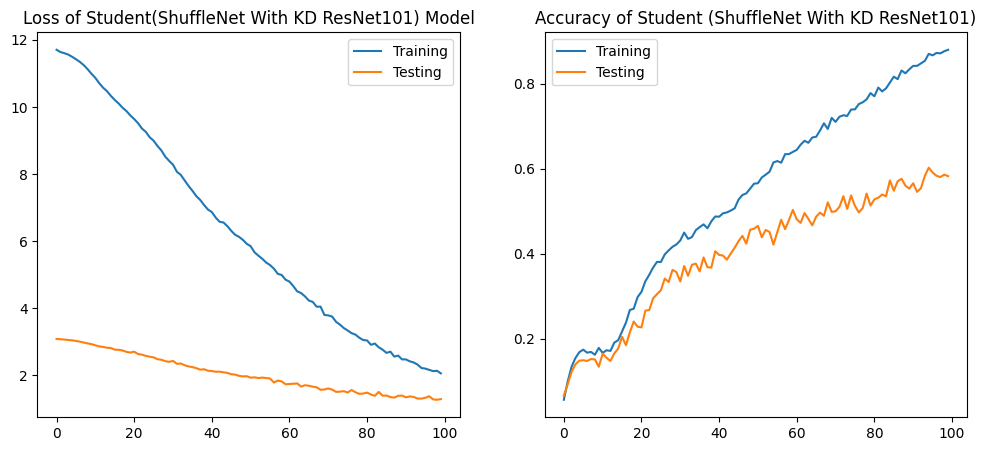

In [ ]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1, 2, 1)
  
# showing image
plt.plot(train_loss1,label='Training')
plt.plot(val_los1,label='Testing')
plt.legend()
plt.title("Loss of Student(ShuffleNet With KD ResNet101) Model")
fig.add_subplot(1, 2, 2)
  
# showing image
plt.plot(train_acc1,label='Training')
plt.plot(val_acc1,label='Testing')
plt.legend()
plt.title("Accuracy of Student (ShuffleNet With KD ResNet101)")
plt.show()


In [ ]:
classification_report(smodel1,test_loader)

Accuracy of model is : 0.63
                                   precision    recall  f1-score   support

Alstonia Scholaris diseased (P2a)       0.55      0.68      0.61        50
 Alstonia Scholaris healthy (P2b)       0.46      0.35      0.40        34
             Arjun diseased (P1a)       0.63      0.76      0.69        50
              Arjun healthy (P1b)       0.54      0.64      0.59        42
              Bael diseased (P4b)       0.00      0.00      0.00        21
               Basil healthy (P8)       0.30      0.48      0.37        25
           Chinar diseased (P11b)       0.78      0.28      0.41        25
            Chinar healthy (P11a)       0.00      0.00      0.00        17
             Gauva diseased (P3b)       0.50      0.32      0.39        28
              Gauva healthy (P3a)       0.80      0.74      0.77        50
             Jamun diseased (P5b)       0.59      0.86      0.70        51
              Jamun healthy (P5a)       0.67      0.70      0.68       

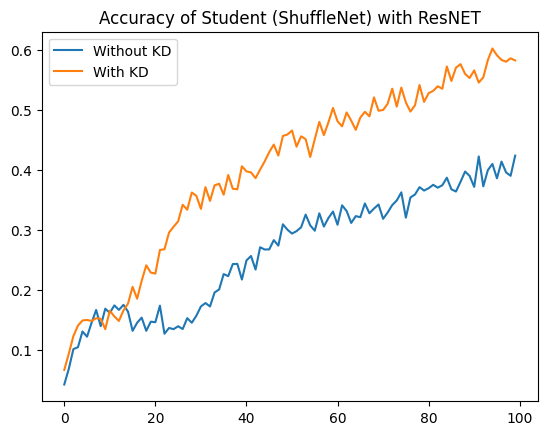

In [ ]:
plt.plot(val_acc,label='Without KD')
plt.plot(val_acc1,label='With KD')
plt.legend()
plt.title("Accuracy of Student (ShuffleNet) with ResNET")
plt.show()


In [ ]:
joblib.dump(smodel1, 'shufflemodel_rnet.pkl')

['shufflemodel_rnet.pkl']

In [ ]:
import torch
import torch.nn as nn

class smodel(nn.Module):
    def __init__(self):
        super(smodel, self).__init__()
        
        # Define convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=5, stride=2)
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv4 = nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3, padding=1)
        self.relu4 = nn.ReLU()
        # Define fully connected layers
        self.fc1 = nn.Linear(in_features=392 , out_features=22)
        #self.relu3 = nn.ReLU()
        #self.fc2 = nn.Linear(in_features=250, out_features=22)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.pool3(x)
        x = self.conv4(x)
        x = self.relu4(x)
        #print(x.shape)
        x = torch.flatten(x,1)
        #print(x.shape)
        x = self.fc1(x)
        #x = self.relu3(x)
        #x = self.fc2(x)
        #print(x.shape)
        return x


In [ ]:
smodel3 = smodel()
smodel3 = smodel3.cuda()
smodel4 = smodel()
smodel4 = smodel4.cuda()
optimizers = torch.optim.Adadelta(smodel4.parameters(), lr=0.3)
optimizers2 = torch.optim.Adadelta(smodel3.parameters(), lr=0.3)

In [ ]:
train_loss = []
val_los = []
train_acc = []
val_acc = []
for i in range(100):
        l1 = []
        l2 = []
        a1 = []
        a2 = []
        start = timer()
        for img,labels in tqdm(sloader2, desc='Training', unit=' unit',leave=False,colour='red'):
            



           # print(end - start)
            
            
            
            img = img.to(device)
            labels = labels.to(device)
            
            output = smodel3(img)
            #print(output.shape)
            probs = F.softmax(output,dim=1)
            max_prob,preds = torch.max(probs,dim=1)
            #print(len(labels))
            acc1 = (torch.sum(preds == labels).item() / len(preds))
            compare = smodel3(img)
            pdist = F.softmax(compare/4,dim=1)  ##Teacher distribution
            max_prob1,preds1 = torch.max(pdist,dim=1)   #Teacher output
            #accu=[]
            a1.append(acc1)
            #gg = np.mean(accu)
            soft_loss_teacher = nn.KLDivLoss(reduction='batchmean')(F.log_softmax(output / 4, dim=1), pdist)
            loss = nn.CrossEntropyLoss()(output,labels)
            loss = 0.2*loss + 0.8*soft_loss_teacher
            l1.append(loss.item())
            loss.backward()
            optimizers2.step()
            optimizers2.zero_grad()
            
        for a,b in tqdm(val_loader, desc='Training', unit=' unit',leave=False,colour='red'):
                a = a.to(device)
                b = b.to(device)
                rr = smodel3(a)
                val_loss = nn.CrossEntropyLoss()(rr,b)
                l2.append(val_loss.item())
                probs = F.softmax(rr,dim=1)
                max_prob,preds = torch.max(probs,dim=1)
                acc = (torch.sum(preds == b).item() / len(preds))
                a2.append(acc)
        train_loss.append(np.mean(l1))
        val_los.append(np.mean(l2))
        train_acc.append(np.mean(a1))
        val_acc.append(np.mean(a2))
        end = timer()
        time = end - start
        time = time/60
        print(f'Epoch {i+1}/100: Train Loss==> {np.mean(l1):.2f} Val Loss==> {np.mean(l2):.2f} Train_Acc==> {np.mean(a1):.2f} Val_Acc==> {np.mean(a2):.2f}')   
        #print(i+1,loss,acc)

Epoch 1/100: Train Loss==> 0.62 Val Loss==> 3.08 Train_Acc==> 0.06 Val_Acc==> 0.07


Epoch 2/100: Train Loss==> 0.61 Val Loss==> 3.06 Train_Acc==> 0.07 Val_Acc==> 0.05


Epoch 3/100: Train Loss==> 0.61 Val Loss==> 3.05 Train_Acc==> 0.06 Val_Acc==> 0.06


Epoch 4/100: Train Loss==> 0.61 Val Loss==> 3.03 Train_Acc==> 0.07 Val_Acc==> 0.08


Epoch 5/100: Train Loss==> 0.61 Val Loss==> 3.01 Train_Acc==> 0.07 Val_Acc==> 0.08


Epoch 6/100: Train Loss==> 0.60 Val Loss==> 3.01 Train_Acc==> 0.07 Val_Acc==> 0.10


Epoch 7/100: Train Loss==> 0.60 Val Loss==> 3.01 Train_Acc==> 0.07 Val_Acc==> 0.08


Epoch 8/100: Train Loss==> 0.60 Val Loss==> 3.01 Train_Acc==> 0.07 Val_Acc==> 0.09


Epoch 9/100: Train Loss==> 0.60 Val Loss==> 3.00 Train_Acc==> 0.08 Val_Acc==> 0.10


Epoch 10/100: Train Loss==> 0.60 Val Loss==> 3.00 Train_Acc==> 0.07 Val_Acc==> 0.09


Epoch 11/100: Train Loss==> 0.60 Val Loss==> 2.99 Train_Acc==> 0.09 Val_Acc==> 0.09


Epoch 12/100: Train Loss==> 0.60 Val Loss==> 2.94 Train_Acc==> 0.07 Val_Acc==> 0.11


Epoch 13/100: Train Loss==> 0.58 Val Loss==> 2.84 Train_Acc==> 0.11 Val_Acc==> 0.15


Epoch 14/100: Train Loss==> 0.56 Val Loss==> 2.74 Train_Acc==> 0.14 Val_Acc==> 0.16


Epoch 15/100: Train Loss==> 0.54 Val Loss==> 2.60 Train_Acc==> 0.16 Val_Acc==> 0.17


Epoch 16/100: Train Loss==> 0.53 Val Loss==> 2.61 Train_Acc==> 0.16 Val_Acc==> 0.14


Epoch 17/100: Train Loss==> 0.52 Val Loss==> 2.53 Train_Acc==> 0.16 Val_Acc==> 0.18


Epoch 18/100: Train Loss==> 0.51 Val Loss==> 2.46 Train_Acc==> 0.18 Val_Acc==> 0.17


Epoch 19/100: Train Loss==> 0.50 Val Loss==> 2.45 Train_Acc==> 0.17 Val_Acc==> 0.20


Epoch 20/100: Train Loss==> 0.49 Val Loss==> 2.42 Train_Acc==> 0.20 Val_Acc==> 0.18


Epoch 21/100: Train Loss==> 0.49 Val Loss==> 2.39 Train_Acc==> 0.18 Val_Acc==> 0.20


Epoch 22/100: Train Loss==> 0.49 Val Loss==> 2.39 Train_Acc==> 0.19 Val_Acc==> 0.21


Epoch 23/100: Train Loss==> 0.48 Val Loss==> 2.40 Train_Acc==> 0.20 Val_Acc==> 0.20


Epoch 24/100: Train Loss==> 0.48 Val Loss==> 2.58 Train_Acc==> 0.20 Val_Acc==> 0.13


Epoch 25/100: Train Loss==> 0.48 Val Loss==> 2.32 Train_Acc==> 0.21 Val_Acc==> 0.25


Epoch 26/100: Train Loss==> 0.47 Val Loss==> 2.31 Train_Acc==> 0.21 Val_Acc==> 0.25


Epoch 27/100: Train Loss==> 0.48 Val Loss==> 2.32 Train_Acc==> 0.22 Val_Acc==> 0.24


Epoch 28/100: Train Loss==> 0.48 Val Loss==> 2.42 Train_Acc==> 0.21 Val_Acc==> 0.16


Epoch 29/100: Train Loss==> 0.47 Val Loss==> 2.30 Train_Acc==> 0.21 Val_Acc==> 0.24


Epoch 30/100: Train Loss==> 0.47 Val Loss==> 2.38 Train_Acc==> 0.21 Val_Acc==> 0.18


Epoch 31/100: Train Loss==> 0.47 Val Loss==> 2.41 Train_Acc==> 0.23 Val_Acc==> 0.16


Epoch 32/100: Train Loss==> 0.46 Val Loss==> 2.36 Train_Acc==> 0.23 Val_Acc==> 0.19


Epoch 33/100: Train Loss==> 0.46 Val Loss==> 2.39 Train_Acc==> 0.22 Val_Acc==> 0.18


Epoch 34/100: Train Loss==> 0.46 Val Loss==> 2.23 Train_Acc==> 0.23 Val_Acc==> 0.27


Epoch 35/100: Train Loss==> 0.46 Val Loss==> 2.38 Train_Acc==> 0.24 Val_Acc==> 0.19


Epoch 36/100: Train Loss==> 0.46 Val Loss==> 2.26 Train_Acc==> 0.26 Val_Acc==> 0.24


Epoch 37/100: Train Loss==> 0.46 Val Loss==> 2.26 Train_Acc==> 0.25 Val_Acc==> 0.21


Epoch 38/100: Train Loss==> 0.46 Val Loss==> 2.25 Train_Acc==> 0.25 Val_Acc==> 0.22


Epoch 39/100: Train Loss==> 0.45 Val Loss==> 2.23 Train_Acc==> 0.27 Val_Acc==> 0.26


Epoch 40/100: Train Loss==> 0.45 Val Loss==> 2.28 Train_Acc==> 0.25 Val_Acc==> 0.25


Epoch 41/100: Train Loss==> 0.45 Val Loss==> 2.19 Train_Acc==> 0.27 Val_Acc==> 0.26


Epoch 42/100: Train Loss==> 0.44 Val Loss==> 2.23 Train_Acc==> 0.27 Val_Acc==> 0.19


Epoch 43/100: Train Loss==> 0.44 Val Loss==> 2.25 Train_Acc==> 0.29 Val_Acc==> 0.25


Epoch 44/100: Train Loss==> 0.44 Val Loss==> 2.37 Train_Acc==> 0.28 Val_Acc==> 0.22


Epoch 45/100: Train Loss==> 0.44 Val Loss==> 2.15 Train_Acc==> 0.27 Val_Acc==> 0.28


Epoch 46/100: Train Loss==> 0.43 Val Loss==> 2.21 Train_Acc==> 0.28 Val_Acc==> 0.25


Epoch 47/100: Train Loss==> 0.43 Val Loss==> 2.13 Train_Acc==> 0.29 Val_Acc==> 0.29


Epoch 48/100: Train Loss==> 0.42 Val Loss==> 2.17 Train_Acc==> 0.30 Val_Acc==> 0.26


Epoch 49/100: Train Loss==> 0.43 Val Loss==> 2.13 Train_Acc==> 0.30 Val_Acc==> 0.27


Epoch 50/100: Train Loss==> 0.42 Val Loss==> 2.17 Train_Acc==> 0.31 Val_Acc==> 0.31


Epoch 51/100: Train Loss==> 0.42 Val Loss==> 2.17 Train_Acc==> 0.31 Val_Acc==> 0.27


Epoch 52/100: Train Loss==> 0.41 Val Loss==> 2.30 Train_Acc==> 0.31 Val_Acc==> 0.26


Epoch 53/100: Train Loss==> 0.42 Val Loss==> 2.13 Train_Acc==> 0.31 Val_Acc==> 0.28


Epoch 54/100: Train Loss==> 0.41 Val Loss==> 2.24 Train_Acc==> 0.34 Val_Acc==> 0.26


Epoch 55/100: Train Loss==> 0.41 Val Loss==> 2.28 Train_Acc==> 0.34 Val_Acc==> 0.26


Epoch 56/100: Train Loss==> 0.41 Val Loss==> 2.10 Train_Acc==> 0.33 Val_Acc==> 0.30


Epoch 57/100: Train Loss==> 0.40 Val Loss==> 2.22 Train_Acc==> 0.35 Val_Acc==> 0.27


Epoch 58/100: Train Loss==> 0.40 Val Loss==> 2.11 Train_Acc==> 0.36 Val_Acc==> 0.29


Epoch 59/100: Train Loss==> 0.40 Val Loss==> 2.15 Train_Acc==> 0.36 Val_Acc==> 0.30


Epoch 60/100: Train Loss==> 0.39 Val Loss==> 2.08 Train_Acc==> 0.38 Val_Acc==> 0.33


Epoch 61/100: Train Loss==> 0.39 Val Loss==> 2.08 Train_Acc==> 0.38 Val_Acc==> 0.34


Epoch 62/100: Train Loss==> 0.39 Val Loss==> 2.08 Train_Acc==> 0.37 Val_Acc==> 0.34


Epoch 63/100: Train Loss==> 0.38 Val Loss==> 2.02 Train_Acc==> 0.40 Val_Acc==> 0.31


Epoch 64/100: Train Loss==> 0.38 Val Loss==> 2.14 Train_Acc==> 0.38 Val_Acc==> 0.31


Epoch 65/100: Train Loss==> 0.37 Val Loss==> 2.00 Train_Acc==> 0.40 Val_Acc==> 0.36


Epoch 66/100: Train Loss==> 0.37 Val Loss==> 2.11 Train_Acc==> 0.41 Val_Acc==> 0.31


Epoch 67/100: Train Loss==> 0.37 Val Loss==> 1.98 Train_Acc==> 0.41 Val_Acc==> 0.35


Epoch 68/100: Train Loss==> 0.37 Val Loss==> 1.96 Train_Acc==> 0.43 Val_Acc==> 0.36


Epoch 69/100: Train Loss==> 0.36 Val Loss==> 1.99 Train_Acc==> 0.42 Val_Acc==> 0.37


Epoch 70/100: Train Loss==> 0.36 Val Loss==> 1.85 Train_Acc==> 0.43 Val_Acc==> 0.43


Epoch 71/100: Train Loss==> 0.36 Val Loss==> 1.91 Train_Acc==> 0.44 Val_Acc==> 0.38


Epoch 72/100: Train Loss==> 0.35 Val Loss==> 1.81 Train_Acc==> 0.44 Val_Acc==> 0.43


Epoch 73/100: Train Loss==> 0.35 Val Loss==> 1.75 Train_Acc==> 0.44 Val_Acc==> 0.45


Epoch 74/100: Train Loss==> 0.34 Val Loss==> 2.17 Train_Acc==> 0.45 Val_Acc==> 0.28


Epoch 75/100: Train Loss==> 0.34 Val Loss==> 1.77 Train_Acc==> 0.48 Val_Acc==> 0.43


Epoch 76/100: Train Loss==> 0.34 Val Loss==> 1.80 Train_Acc==> 0.47 Val_Acc==> 0.43


Epoch 77/100: Train Loss==> 0.33 Val Loss==> 1.79 Train_Acc==> 0.47 Val_Acc==> 0.42


Epoch 78/100: Train Loss==> 0.33 Val Loss==> 1.80 Train_Acc==> 0.47 Val_Acc==> 0.42


Epoch 79/100: Train Loss==> 0.33 Val Loss==> 1.72 Train_Acc==> 0.48 Val_Acc==> 0.48


Epoch 80/100: Train Loss==> 0.32 Val Loss==> 1.87 Train_Acc==> 0.50 Val_Acc==> 0.40


Epoch 81/100: Train Loss==> 0.32 Val Loss==> 1.82 Train_Acc==> 0.49 Val_Acc==> 0.40


Epoch 82/100: Train Loss==> 0.32 Val Loss==> 1.73 Train_Acc==> 0.49 Val_Acc==> 0.44


Epoch 83/100: Train Loss==> 0.31 Val Loss==> 1.79 Train_Acc==> 0.50 Val_Acc==> 0.43


Epoch 84/100: Train Loss==> 0.30 Val Loss==> 1.70 Train_Acc==> 0.53 Val_Acc==> 0.47


Epoch 85/100: Train Loss==> 0.31 Val Loss==> 1.67 Train_Acc==> 0.50 Val_Acc==> 0.47


Epoch 86/100: Train Loss==> 0.30 Val Loss==> 1.74 Train_Acc==> 0.52 Val_Acc==> 0.46


Epoch 87/100: Train Loss==> 0.30 Val Loss==> 1.66 Train_Acc==> 0.50 Val_Acc==> 0.49


Epoch 88/100: Train Loss==> 0.30 Val Loss==> 1.56 Train_Acc==> 0.52 Val_Acc==> 0.51


Epoch 89/100: Train Loss==> 0.29 Val Loss==> 1.60 Train_Acc==> 0.53 Val_Acc==> 0.50


Epoch 90/100: Train Loss==> 0.30 Val Loss==> 1.56 Train_Acc==> 0.53 Val_Acc==> 0.48


Epoch 91/100: Train Loss==> 0.30 Val Loss==> 1.85 Train_Acc==> 0.52 Val_Acc==> 0.40


Epoch 92/100: Train Loss==> 0.29 Val Loss==> 1.54 Train_Acc==> 0.54 Val_Acc==> 0.50


Epoch 93/100: Train Loss==> 0.29 Val Loss==> 1.64 Train_Acc==> 0.52 Val_Acc==> 0.48


Epoch 94/100: Train Loss==> 0.29 Val Loss==> 1.82 Train_Acc==> 0.54 Val_Acc==> 0.41


Epoch 95/100: Train Loss==> 0.29 Val Loss==> 1.59 Train_Acc==> 0.53 Val_Acc==> 0.49


Epoch 96/100: Train Loss==> 0.28 Val Loss==> 1.64 Train_Acc==> 0.54 Val_Acc==> 0.47


Epoch 97/100: Train Loss==> 0.28 Val Loss==> 1.63 Train_Acc==> 0.55 Val_Acc==> 0.48


Epoch 98/100: Train Loss==> 0.28 Val Loss==> 1.77 Train_Acc==> 0.56 Val_Acc==> 0.42


Epoch 99/100: Train Loss==> 0.28 Val Loss==> 1.44 Train_Acc==> 0.55 Val_Acc==> 0.52


Epoch 100/100: Train Loss==> 0.27 Val Loss==> 1.55 Train_Acc==> 0.56 Val_Acc==> 0.52


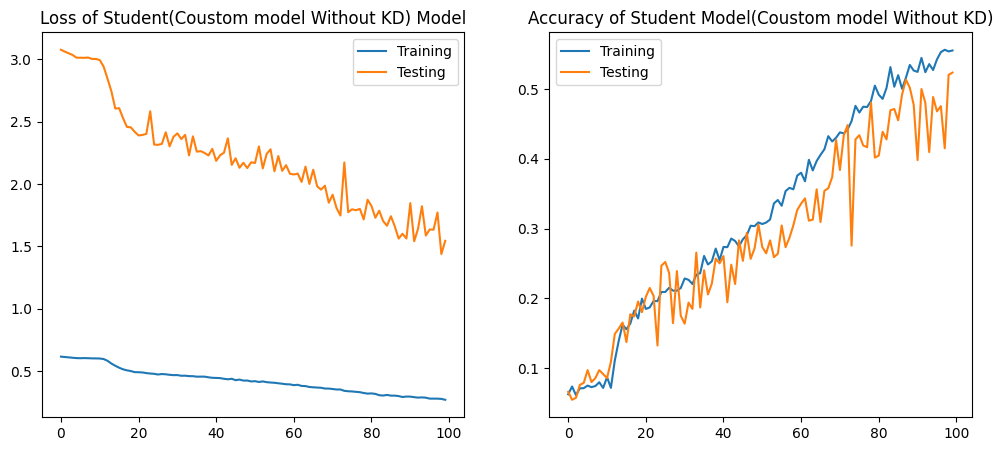

In [ ]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1, 2, 1)
  
# showing image
plt.plot(train_loss,label='Training')
plt.plot(val_los,label='Testing')
plt.legend()
plt.title("Loss of Student(Coustom model Without KD) Model")
fig.add_subplot(1, 2, 2)
  
# showing image
plt.plot(train_acc,label='Training')
plt.plot(val_acc,label='Testing')
plt.legend()
plt.title("Accuracy of Student Model(Coustom model Without KD)")
plt.show()


In [ ]:
classification_report(smodel3,test_loader)

Accuracy of model is : 0.54
                                   precision    recall  f1-score   support

Alstonia Scholaris diseased (P2a)       0.53      0.80      0.64        50
 Alstonia Scholaris healthy (P2b)       0.59      0.38      0.46        34
             Arjun diseased (P1a)       0.67      0.32      0.43        50
              Arjun healthy (P1b)       0.95      0.45      0.61        42
              Bael diseased (P4b)       0.85      0.81      0.83        21
               Basil healthy (P8)       0.50      0.12      0.19        25
           Chinar diseased (P11b)       0.40      0.48      0.44        25
            Chinar healthy (P11a)       0.00      0.00      0.00        17
             Gauva diseased (P3b)       0.33      0.14      0.20        28
              Gauva healthy (P3a)       0.82      0.18      0.30        50
             Jamun diseased (P5b)       0.58      0.92      0.71        51
              Jamun healthy (P5a)       0.75      0.28      0.41       

In [ ]:
train_loss1 = []
val_los1 = []
train_acc1 = []
val_acc1 = []
for i in range(100):
        l1 = []
        l2 = []
        a1 = []
        a2 = []
        start = timer()
        for img,labels in tqdm(sloader2, desc='Training', unit=' unit',leave=False,colour='red'):
            



           # print(end - start)
            
            
            
            img = img.to(device)
            labels = labels.to(device)
            
            output = smodel4(img)
            #print(output.shape)
            probs = F.softmax(output,dim=1)
            max_prob,preds = torch.max(probs,dim=1)
            #print(len(labels))
            acc1 = (torch.sum(preds == labels).item() / len(preds))
            compare = tmodel2(img)
            pdist = F.softmax(compare/4,dim=1)  ##Teacher distribution
            max_prob1,preds1 = torch.max(pdist,dim=1)   #Teacher output
            #accu=[]
            a1.append(acc1)
            #gg = np.mean(accu)
            soft_loss_teacher = nn.KLDivLoss(reduction='batchmean')(F.log_softmax(output /4, dim=1), pdist)
            loss = nn.CrossEntropyLoss()(output,labels)
            loss = 0.2*1*loss + 0.8*1*soft_loss_teacher
            l1.append(loss.item())
            loss.backward()
            optimizers.step()
            optimizers.zero_grad()
            
        for a,b in tqdm(val_loader, desc='Training', unit=' unit',leave=False,colour='red'):
                a = a.to(device)
                b = b.to(device)
                rr = smodel4(a)
                val_loss = nn.CrossEntropyLoss()(rr,b)
                l2.append(val_loss.item())
                probs = F.softmax(rr,dim=1)
                max_prob,preds = torch.max(probs,dim=1)
                acc = (torch.sum(preds == b).item() / len(preds))
                a2.append(acc)
        train_loss1.append(np.mean(l1))
        val_los1.append(np.mean(l2))
        train_acc1.append(np.mean(a1))
        val_acc1.append(np.mean(a2))
        end = timer()
        time = end - start
        time = time/60
        print(f'Epoch {i+1}/100: Train Loss==> {np.mean(l1):.2f} Val Loss==> {np.mean(l2):.2f} Train_Acc==> {np.mean(a1):.2f} Val_Acc==> {np.mean(a2):.2f} Time==> {time:.2f} mins')   
        #print(i+1,loss,acc)

Epoch 1/100: Train Loss==> 1.08 Val Loss==> 3.07 Train_Acc==> 0.07 Val_Acc==> 0.06 Time==> 0.05 mins


Epoch 2/100: Train Loss==> 1.08 Val Loss==> 3.04 Train_Acc==> 0.06 Val_Acc==> 0.07 Time==> 0.05 mins


Epoch 3/100: Train Loss==> 1.10 Val Loss==> 3.02 Train_Acc==> 0.06 Val_Acc==> 0.08 Time==> 0.05 mins


Epoch 4/100: Train Loss==> 1.05 Val Loss==> 3.05 Train_Acc==> 0.07 Val_Acc==> 0.08 Time==> 0.05 mins


Epoch 5/100: Train Loss==> 1.04 Val Loss==> 3.05 Train_Acc==> 0.07 Val_Acc==> 0.07 Time==> 0.05 mins


Epoch 6/100: Train Loss==> 1.04 Val Loss==> 3.05 Train_Acc==> 0.06 Val_Acc==> 0.07 Time==> 0.05 mins


Epoch 7/100: Train Loss==> 1.05 Val Loss==> 3.03 Train_Acc==> 0.07 Val_Acc==> 0.09 Time==> 0.05 mins


Epoch 8/100: Train Loss==> 1.02 Val Loss==> 2.99 Train_Acc==> 0.07 Val_Acc==> 0.11 Time==> 0.05 mins


Epoch 9/100: Train Loss==> 0.97 Val Loss==> 2.89 Train_Acc==> 0.08 Val_Acc==> 0.12 Time==> 0.05 mins


Epoch 10/100: Train Loss==> 0.95 Val Loss==> 2.77 Train_Acc==> 0.13 Val_Acc==> 0.14 Time==> 0.05 mins


Epoch 11/100: Train Loss==> 0.94 Val Loss==> 2.69 Train_Acc==> 0.15 Val_Acc==> 0.21 Time==> 0.05 mins


Epoch 12/100: Train Loss==> 0.93 Val Loss==> 2.65 Train_Acc==> 0.16 Val_Acc==> 0.19 Time==> 0.05 mins


Epoch 13/100: Train Loss==> 0.89 Val Loss==> 2.68 Train_Acc==> 0.18 Val_Acc==> 0.16 Time==> 0.05 mins


Epoch 14/100: Train Loss==> 0.87 Val Loss==> 2.59 Train_Acc==> 0.18 Val_Acc==> 0.20 Time==> 0.05 mins


Epoch 15/100: Train Loss==> 0.88 Val Loss==> 2.59 Train_Acc==> 0.19 Val_Acc==> 0.16 Time==> 0.05 mins


Epoch 16/100: Train Loss==> 0.85 Val Loss==> 2.43 Train_Acc==> 0.22 Val_Acc==> 0.25 Time==> 0.05 mins


Epoch 17/100: Train Loss==> 0.84 Val Loss==> 2.49 Train_Acc==> 0.23 Val_Acc==> 0.24 Time==> 0.05 mins


Epoch 18/100: Train Loss==> 0.81 Val Loss==> 2.48 Train_Acc==> 0.24 Val_Acc==> 0.25 Time==> 0.05 mins


Epoch 19/100: Train Loss==> 0.82 Val Loss==> 2.39 Train_Acc==> 0.24 Val_Acc==> 0.23 Time==> 0.05 mins


Epoch 20/100: Train Loss==> 0.81 Val Loss==> 2.45 Train_Acc==> 0.25 Val_Acc==> 0.21 Time==> 0.05 mins


Epoch 21/100: Train Loss==> 0.79 Val Loss==> 2.57 Train_Acc==> 0.26 Val_Acc==> 0.21 Time==> 0.05 mins


Epoch 22/100: Train Loss==> 0.79 Val Loss==> 2.38 Train_Acc==> 0.25 Val_Acc==> 0.17 Time==> 0.05 mins


Epoch 23/100: Train Loss==> 0.79 Val Loss==> 2.46 Train_Acc==> 0.27 Val_Acc==> 0.18 Time==> 0.05 mins


Epoch 24/100: Train Loss==> 0.77 Val Loss==> 2.40 Train_Acc==> 0.27 Val_Acc==> 0.26 Time==> 0.05 mins


Epoch 25/100: Train Loss==> 0.75 Val Loss==> 2.30 Train_Acc==> 0.27 Val_Acc==> 0.29 Time==> 0.05 mins


Epoch 26/100: Train Loss==> 0.76 Val Loss==> 2.23 Train_Acc==> 0.28 Val_Acc==> 0.31 Time==> 0.05 mins


Epoch 27/100: Train Loss==> 0.75 Val Loss==> 2.32 Train_Acc==> 0.28 Val_Acc==> 0.24 Time==> 0.05 mins


Epoch 28/100: Train Loss==> 0.76 Val Loss==> 2.32 Train_Acc==> 0.28 Val_Acc==> 0.22 Time==> 0.05 mins


Epoch 29/100: Train Loss==> 0.73 Val Loss==> 2.18 Train_Acc==> 0.31 Val_Acc==> 0.29 Time==> 0.05 mins


Epoch 30/100: Train Loss==> 0.76 Val Loss==> 2.13 Train_Acc==> 0.31 Val_Acc==> 0.32 Time==> 0.05 mins


Epoch 31/100: Train Loss==> 0.74 Val Loss==> 2.25 Train_Acc==> 0.32 Val_Acc==> 0.28 Time==> 0.05 mins


Epoch 32/100: Train Loss==> 0.74 Val Loss==> 2.58 Train_Acc==> 0.31 Val_Acc==> 0.19 Time==> 0.05 mins


Epoch 33/100: Train Loss==> 0.72 Val Loss==> 2.33 Train_Acc==> 0.32 Val_Acc==> 0.24 Time==> 0.05 mins


Epoch 34/100: Train Loss==> 0.72 Val Loss==> 2.14 Train_Acc==> 0.32 Val_Acc==> 0.32 Time==> 0.05 mins


Epoch 35/100: Train Loss==> 0.71 Val Loss==> 2.21 Train_Acc==> 0.34 Val_Acc==> 0.30 Time==> 0.05 mins


Epoch 36/100: Train Loss==> 0.72 Val Loss==> 2.25 Train_Acc==> 0.33 Val_Acc==> 0.30 Time==> 0.05 mins


Epoch 37/100: Train Loss==> 0.70 Val Loss==> 2.23 Train_Acc==> 0.33 Val_Acc==> 0.24 Time==> 0.05 mins


Epoch 38/100: Train Loss==> 0.71 Val Loss==> 2.17 Train_Acc==> 0.34 Val_Acc==> 0.30 Time==> 0.05 mins


Epoch 39/100: Train Loss==> 0.70 Val Loss==> 2.10 Train_Acc==> 0.35 Val_Acc==> 0.31 Time==> 0.05 mins


Epoch 40/100: Train Loss==> 0.68 Val Loss==> 2.04 Train_Acc==> 0.35 Val_Acc==> 0.30 Time==> 0.05 mins


Epoch 41/100: Train Loss==> 0.69 Val Loss==> 2.27 Train_Acc==> 0.34 Val_Acc==> 0.30 Time==> 0.05 mins


Epoch 42/100: Train Loss==> 0.70 Val Loss==> 2.02 Train_Acc==> 0.35 Val_Acc==> 0.38 Time==> 0.05 mins


Epoch 43/100: Train Loss==> 0.69 Val Loss==> 2.06 Train_Acc==> 0.37 Val_Acc==> 0.32 Time==> 0.05 mins


Epoch 44/100: Train Loss==> 0.68 Val Loss==> 2.07 Train_Acc==> 0.36 Val_Acc==> 0.30 Time==> 0.05 mins


Epoch 45/100: Train Loss==> 0.68 Val Loss==> 2.04 Train_Acc==> 0.37 Val_Acc==> 0.30 Time==> 0.05 mins


Epoch 46/100: Train Loss==> 0.67 Val Loss==> 2.08 Train_Acc==> 0.36 Val_Acc==> 0.33 Time==> 0.05 mins


Epoch 47/100: Train Loss==> 0.69 Val Loss==> 2.06 Train_Acc==> 0.36 Val_Acc==> 0.33 Time==> 0.05 mins


Epoch 48/100: Train Loss==> 0.65 Val Loss==> 2.09 Train_Acc==> 0.39 Val_Acc==> 0.34 Time==> 0.05 mins


Epoch 49/100: Train Loss==> 0.70 Val Loss==> 2.07 Train_Acc==> 0.38 Val_Acc==> 0.32 Time==> 0.05 mins


Epoch 50/100: Train Loss==> 0.67 Val Loss==> 2.13 Train_Acc==> 0.38 Val_Acc==> 0.33 Time==> 0.05 mins


Epoch 51/100: Train Loss==> 0.66 Val Loss==> 1.93 Train_Acc==> 0.40 Val_Acc==> 0.36 Time==> 0.05 mins


Epoch 52/100: Train Loss==> 0.64 Val Loss==> 1.99 Train_Acc==> 0.39 Val_Acc==> 0.36 Time==> 0.05 mins


Epoch 53/100: Train Loss==> 0.66 Val Loss==> 2.11 Train_Acc==> 0.40 Val_Acc==> 0.34 Time==> 0.05 mins


Epoch 54/100: Train Loss==> 0.66 Val Loss==> 1.86 Train_Acc==> 0.41 Val_Acc==> 0.41 Time==> 0.05 mins


Epoch 55/100: Train Loss==> 0.64 Val Loss==> 2.06 Train_Acc==> 0.41 Val_Acc==> 0.37 Time==> 0.05 mins


Epoch 56/100: Train Loss==> 0.65 Val Loss==> 2.03 Train_Acc==> 0.41 Val_Acc==> 0.36 Time==> 0.05 mins


Epoch 57/100: Train Loss==> 0.66 Val Loss==> 2.13 Train_Acc==> 0.43 Val_Acc==> 0.31 Time==> 0.05 mins


Epoch 58/100: Train Loss==> 0.65 Val Loss==> 2.02 Train_Acc==> 0.43 Val_Acc==> 0.39 Time==> 0.05 mins


Epoch 59/100: Train Loss==> 0.63 Val Loss==> 2.03 Train_Acc==> 0.41 Val_Acc==> 0.33 Time==> 0.05 mins


Epoch 60/100: Train Loss==> 0.62 Val Loss==> 1.86 Train_Acc==> 0.44 Val_Acc==> 0.40 Time==> 0.05 mins


Epoch 61/100: Train Loss==> 0.60 Val Loss==> 1.93 Train_Acc==> 0.44 Val_Acc==> 0.37 Time==> 0.05 mins


Epoch 62/100: Train Loss==> 0.60 Val Loss==> 2.14 Train_Acc==> 0.44 Val_Acc==> 0.30 Time==> 0.05 mins


Epoch 63/100: Train Loss==> 0.61 Val Loss==> 1.81 Train_Acc==> 0.46 Val_Acc==> 0.44 Time==> 0.05 mins


Epoch 64/100: Train Loss==> 0.62 Val Loss==> 1.85 Train_Acc==> 0.45 Val_Acc==> 0.41 Time==> 0.05 mins


Epoch 65/100: Train Loss==> 0.61 Val Loss==> 1.93 Train_Acc==> 0.47 Val_Acc==> 0.41 Time==> 0.05 mins


Epoch 66/100: Train Loss==> 0.61 Val Loss==> 1.91 Train_Acc==> 0.45 Val_Acc==> 0.39 Time==> 0.05 mins


Epoch 67/100: Train Loss==> 0.57 Val Loss==> 1.84 Train_Acc==> 0.48 Val_Acc==> 0.44 Time==> 0.05 mins


Epoch 68/100: Train Loss==> 0.59 Val Loss==> 1.85 Train_Acc==> 0.49 Val_Acc==> 0.38 Time==> 0.05 mins


Epoch 69/100: Train Loss==> 0.58 Val Loss==> 1.73 Train_Acc==> 0.49 Val_Acc==> 0.46 Time==> 0.05 mins


Epoch 70/100: Train Loss==> 0.57 Val Loss==> 1.77 Train_Acc==> 0.50 Val_Acc==> 0.43 Time==> 0.05 mins


Epoch 71/100: Train Loss==> 0.58 Val Loss==> 1.75 Train_Acc==> 0.49 Val_Acc==> 0.42 Time==> 0.05 mins


Epoch 72/100: Train Loss==> 0.57 Val Loss==> 1.72 Train_Acc==> 0.51 Val_Acc==> 0.42 Time==> 0.05 mins


Epoch 73/100: Train Loss==> 0.56 Val Loss==> 1.71 Train_Acc==> 0.51 Val_Acc==> 0.47 Time==> 0.05 mins


Epoch 74/100: Train Loss==> 0.56 Val Loss==> 1.70 Train_Acc==> 0.52 Val_Acc==> 0.44 Time==> 0.05 mins


Epoch 75/100: Train Loss==> 0.55 Val Loss==> 1.91 Train_Acc==> 0.51 Val_Acc==> 0.40 Time==> 0.05 mins


Epoch 76/100: Train Loss==> 0.52 Val Loss==> 1.63 Train_Acc==> 0.53 Val_Acc==> 0.50 Time==> 0.05 mins


Epoch 77/100: Train Loss==> 0.56 Val Loss==> 1.66 Train_Acc==> 0.53 Val_Acc==> 0.49 Time==> 0.05 mins


Epoch 78/100: Train Loss==> 0.54 Val Loss==> 1.68 Train_Acc==> 0.54 Val_Acc==> 0.50 Time==> 0.05 mins


Epoch 79/100: Train Loss==> 0.54 Val Loss==> 1.67 Train_Acc==> 0.53 Val_Acc==> 0.48 Time==> 0.05 mins


Epoch 80/100: Train Loss==> 0.54 Val Loss==> 1.76 Train_Acc==> 0.53 Val_Acc==> 0.41 Time==> 0.05 mins


Epoch 81/100: Train Loss==> 0.52 Val Loss==> 1.65 Train_Acc==> 0.54 Val_Acc==> 0.48 Time==> 0.05 mins


Epoch 82/100: Train Loss==> 0.50 Val Loss==> 1.57 Train_Acc==> 0.56 Val_Acc==> 0.49 Time==> 0.05 mins


Epoch 83/100: Train Loss==> 0.51 Val Loss==> 1.48 Train_Acc==> 0.56 Val_Acc==> 0.53 Time==> 0.05 mins


Epoch 84/100: Train Loss==> 0.51 Val Loss==> 1.66 Train_Acc==> 0.55 Val_Acc==> 0.48 Time==> 0.05 mins


Epoch 85/100: Train Loss==> 0.51 Val Loss==> 1.58 Train_Acc==> 0.54 Val_Acc==> 0.49 Time==> 0.05 mins


Epoch 86/100: Train Loss==> 0.52 Val Loss==> 1.59 Train_Acc==> 0.55 Val_Acc==> 0.53 Time==> 0.05 mins


Epoch 87/100: Train Loss==> 0.50 Val Loss==> 1.55 Train_Acc==> 0.56 Val_Acc==> 0.53 Time==> 0.05 mins


Epoch 88/100: Train Loss==> 0.49 Val Loss==> 1.47 Train_Acc==> 0.57 Val_Acc==> 0.52 Time==> 0.05 mins


Epoch 89/100: Train Loss==> 0.52 Val Loss==> 1.62 Train_Acc==> 0.57 Val_Acc==> 0.49 Time==> 0.05 mins


Epoch 90/100: Train Loss==> 0.49 Val Loss==> 1.49 Train_Acc==> 0.56 Val_Acc==> 0.51 Time==> 0.05 mins


Epoch 91/100: Train Loss==> 0.50 Val Loss==> 1.67 Train_Acc==> 0.58 Val_Acc==> 0.47 Time==> 0.05 mins


Epoch 92/100: Train Loss==> 0.49 Val Loss==> 1.63 Train_Acc==> 0.58 Val_Acc==> 0.49 Time==> 0.05 mins


Epoch 93/100: Train Loss==> 0.49 Val Loss==> 1.52 Train_Acc==> 0.60 Val_Acc==> 0.53 Time==> 0.05 mins


Epoch 94/100: Train Loss==> 0.49 Val Loss==> 1.55 Train_Acc==> 0.58 Val_Acc==> 0.54 Time==> 0.05 mins


Epoch 95/100: Train Loss==> 0.48 Val Loss==> 1.51 Train_Acc==> 0.58 Val_Acc==> 0.55 Time==> 0.05 mins


Epoch 96/100: Train Loss==> 0.47 Val Loss==> 1.35 Train_Acc==> 0.59 Val_Acc==> 0.56 Time==> 0.05 mins


Epoch 97/100: Train Loss==> 0.47 Val Loss==> 1.58 Train_Acc==> 0.59 Val_Acc==> 0.50 Time==> 0.05 mins


Epoch 98/100: Train Loss==> 0.47 Val Loss==> 1.42 Train_Acc==> 0.56 Val_Acc==> 0.55 Time==> 0.05 mins


Epoch 99/100: Train Loss==> 0.47 Val Loss==> 1.50 Train_Acc==> 0.59 Val_Acc==> 0.56 Time==> 0.05 mins


Epoch 100/100: Train Loss==> 0.47 Val Loss==> 1.40 Train_Acc==> 0.60 Val_Acc==> 0.58 Time==> 0.05 mins


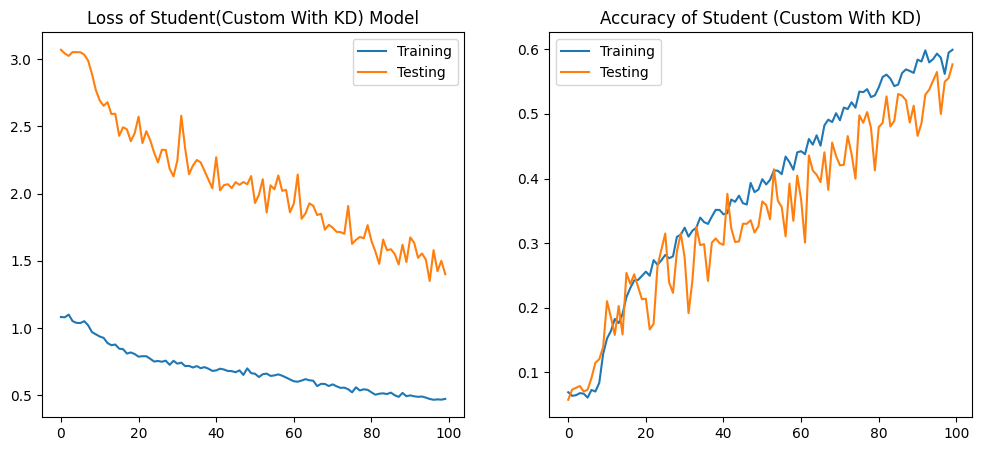

In [ ]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1, 2, 1)
  
# showing image
plt.plot(train_loss1,label='Training')
plt.plot(val_los1,label='Testing')
plt.legend()
plt.title("Loss of Student(Custom With KD) Model")
fig.add_subplot(1, 2, 2)
  
# showing image
plt.plot(train_acc1,label='Training')
plt.plot(val_acc1,label='Testing')
plt.legend()
plt.title("Accuracy of Student (Custom With KD)")
plt.show()


In [ ]:
classification_report(smodel4,test_loader)

Accuracy of model is : 0.59
                                   precision    recall  f1-score   support

Alstonia Scholaris diseased (P2a)       0.44      0.84      0.58        50
 Alstonia Scholaris healthy (P2b)       1.00      0.24      0.38        34
             Arjun diseased (P1a)       0.71      0.58      0.64        50
              Arjun healthy (P1b)       0.65      0.48      0.55        42
              Bael diseased (P4b)       0.59      0.76      0.67        21
               Basil healthy (P8)       0.40      0.40      0.40        25
           Chinar diseased (P11b)       0.56      0.40      0.47        25
            Chinar healthy (P11a)       0.33      0.24      0.28        17
             Gauva diseased (P3b)       0.44      0.29      0.35        28
              Gauva healthy (P3a)       0.67      0.52      0.58        50
             Jamun diseased (P5b)       0.70      0.76      0.73        51
              Jamun healthy (P5a)       0.67      0.65      0.66       

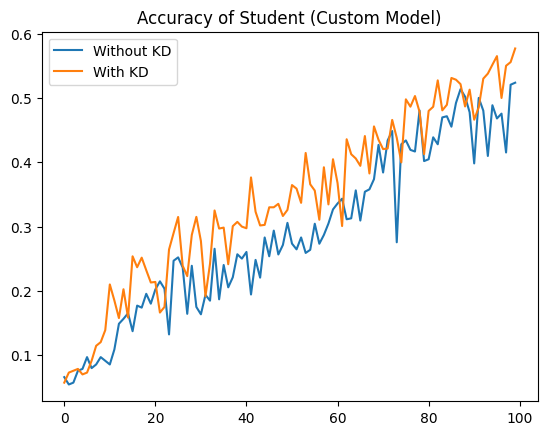

In [ ]:
plt.plot(val_acc,label='Without KD')
plt.plot(val_acc1,label='With KD')
plt.legend()
plt.title("Accuracy of Student (Custom Model)")
plt.show()


In [ ]:
joblib.dump(smodel4, 'csmodel_rnet.pkl')

['csmodel_rnet.pkl']

In [ ]:
import joblib
smodel1 = joblib.load('shufflemodel_dnet.pkl').cuda()
smodel2 = joblib.load('csmodel_dnet.pkl').cuda()
smodel3 = joblib.load('shufflemodel_rnet.pkl').cuda()
smodel4 = joblib.load('csmodel_rnet.pkl').cuda()

# Ensemble

In [ ]:
start = timer()
predictions1 = []
predictions2 = []
predictions3 = []
predictions4 = []
max1 = []
max2 = []
max3 = []
max4 = []
accu = []
l_act = []
i = 0
for images_test,labels_test in test_loader:
    #i = i+1```````````````````````````````
    images_test = images_test.to(device)
    labels_test = labels_test.to(device)
    ypred = smodel2(images_test)
    probs = F.softmax(ypred,dim=1)
    max_prob,preds = torch.max(probs,dim=1)
    max1.append(max_prob)
    predictions2.append(preds)
    
    
    ypred = smodel1(images_test)
    probs = F.softmax(ypred,dim=1)
    max_prob,preds = torch.max(probs,dim=1)
    max2.append(max_prob)
    predictions1.append(preds)
    
    
    ypred = smodel3(images_test)
    probs = F.softmax(ypred,dim=1)
    max_prob,preds = torch.max(probs,dim=1)
    max3.append(max_prob)
    predictions3.append(preds)
    
    ypred = smodel4(images_test)
    probs = F.softmax(ypred,dim=1)
    max_prob,preds = torch.max(probs,dim=1)
    max4.append(max_prob)
    predictions4.append(preds)
    #print(preds)
    #print(max_prob)
    #acc = (torch.sum(preds == labels_test).item() / len(preds))
    #accu.append(acc)
    #predictions.append(preds)
    l_act.append(labels_test)
    print(labels_test)


tensor([ 2,  4, 11, 14, 15,  2,  7,  0, 18, 17, 10,  9, 19, 13, 11,  2,  0, 18,
        11, 16,  0, 16,  8, 17,  6, 15,  1, 19, 10, 19,  6, 19, 17, 18, 11,  5,
        21, 19,  9, 11, 16, 19, 21, 21, 21, 19, 20,  6,  2, 10, 13, 11,  5,  4,
         1, 19, 18, 20, 19,  7,  8, 16,  0, 18, 17,  8,  1,  3, 19,  7,  2, 20,
         5,  1,  0, 18, 11, 10,  2, 19, 21,  8, 18,  2,  4,  3, 11,  2,  0, 21,
        20,  4, 10, 21, 18,  2,  0,  3, 19, 13, 13, 18,  2, 21,  0, 16,  0, 10,
        16,  6,  3,  2, 20, 19, 11, 21, 19, 16,  9,  0, 20, 19, 11, 19,  1,  5,
        16, 11], device='cuda:0')
tensor([18,  1,  6, 18, 17, 12,  4, 21,  3,  6, 21,  3, 19, 19, 17, 20, 19, 16,
         5, 16,  5, 21,  1, 10, 10,  3, 10, 11, 10,  3,  3, 17, 21,  9,  1, 12,
         0,  3, 21,  2,  9, 10, 18,  6, 18,  5,  9, 12, 12, 19, 20,  0, 10,  9,
         1, 16,  4, 16,  1, 16, 18,  2,  4, 19,  4, 20, 16,  0, 20, 10, 19, 12,
        20,  2,  9, 16,  9,  6, 12,  1,  5,  4,  3,  9,  3,  7, 12,  9, 19,  9,
      

In [ ]:
p1 = []
for i in predictions1:
    for j in i:
        p1.append(j.item())
p2 = []
for i in predictions2:
    for j in i:
        p2.append(j.item())
p3 = []
for i in predictions3:
    for j in i:
        p3.append(j.item())
p4 = []
for i in predictions4:
    for j in i:
        p4.append(j.item())
    

In [ ]:
ytrue = []
for i in l_act:
    for j in i:
        ytrue.append(j.item())

In [ ]:
m1 = []
m2 = []
m3 = []
m4 = []
for i in max1:
    for j in i:
        m1.append(j.item())
for i in max2:
    for j in i:
        m2.append(j.item())
for i in max3:
    for j in i:
        m3.append(j.item())
for i in max4:
    for j in i:
        m4.append(j.item())
    
#predictions[0]

In [ ]:
from collections import Counter
def most_frequent(List):
    return max(set(List), key = List.count)

In [ ]:
def ensemble(p1,p2,p3,p4):
    final_pred = []
    for i in range(len(p1)):
        compare = []
        prob = []
        compare.append(p1[i])
        compare.append(p2[i])
        compare.append(p3[i])
        compare.append(p4[i])
        prob.append(m1[i])
        prob.append(m2[i])
        prob.append(m3[i])
        prob.append(m4[i])
       # print(prob)
        a = most_frequent(compare) 
        d = Counter(compare)
        count = d[a]
        if(count==1):
            maximum = np.argmax(prob,0)
            final_pred.append(compare[maximum])
        else:
            final_pred.append(a)
    return final_pred

In [ ]:
final = ensemble(p1,p2,p3,p4)

In [ ]:
report = pd.DataFrame()
report['Actual'] = ytrue
report['Predicted'] = final
report_ensemble = report.copy()
from sklearn.metrics import classification_report
print(classification_report(report['Actual'], report['Predicted']))

              precision    recall  f1-score   support

           0       0.55      0.80      0.65        50
           1       0.75      0.53      0.62        34
           2       0.64      0.82      0.72        50
           3       0.76      0.69      0.72        42
           4       0.84      0.76      0.80        21
           5       0.52      0.44      0.48        25
           6       0.56      0.36      0.44        25
           7       0.00      0.00      0.00        17
           8       0.60      0.43      0.50        28
           9       0.71      0.68      0.69        50
          10       0.61      0.84      0.71        51
          11       0.58      0.59      0.59        54
          12       0.62      0.30      0.40        27
          13       0.16      0.13      0.14        23
          14       0.00      0.00      0.00        11
          15       0.73      0.67      0.70        24
          16       0.84      0.88      0.86        52
          17       0.83    

In [ ]:
import copy

def ema(model, ema_model, alpha=0.9):
        for param in ema_model.parameters():
            param.requires_grad = False

        with torch.no_grad():
            for ema_param, param in zip(ema_model.parameters(), model.parameters()):
                ema_param.mul_(alpha).add_((1 - alpha) * param)

        return ema_model

In [ ]:
smodel1 = torch.hub.load('pytorch/vision:v0.10.0', 'shufflenet_v2_x1_0', pretrained=1)
smodel1.fc = nn.Sequential(
    nn.Linear(in_features = 1024,out_features=22),
)

for name, child in smodel1.named_children():
   if name in ['stage3','stage4','conv5','fc']:
       print(name + ' is unfrozen')
       for param in child.parameters():
           param.requires_grad = True
   else:
       print(name + ' is frozen')
       for param in child.parameters():
           param.requires_grad = False

smodel2 = torch.hub.load('pytorch/vision:v0.10.0', 'shufflenet_v2_x1_0', pretrained=1)
smodel2.fc = nn.Sequential(
    nn.Linear(in_features = 1024,out_features=22),
)

for name, child in smodel2.named_children():
   if name in ['stage3','stage4','conv5','fc']:
       print(name + ' is unfrozen')
       for param in child.parameters():
           param.requires_grad = True
   else:
       print(name + ' is frozen')
       for param in child.parameters():
           param.requires_grad = False
optimizers = torch.optim.Adadelta(filter(lambda p: p.requires_grad, smodel1.parameters()), lr=0.02)
#smodel2 = smodel()
smodel1 = smodel1.cuda()
smodel2 = smodel2.cuda()
#optimizers = torch.optim.Adadelta(smodel1.parameters(), lr=0.6,weight_decay=1e-5)
optimizers2 = torch.optim.Adadelta(filter(lambda p: p.requires_grad, smodel2.parameters()), lr=0.02)

conv1 is frozen
maxpool is frozen
stage2 is frozen
stage3 is unfrozen
stage4 is unfrozen
conv5 is unfrozen
fc is unfrozen
conv1 is frozen
maxpool is frozen
stage2 is frozen
stage3 is unfrozen
stage4 is unfrozen
conv5 is unfrozen
fc is unfrozen


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


In [ ]:
ema_model = copy.deepcopy(smodel1)

In [ ]:
train_loss = []
val_los = []
train_acc = []
val_acc = []
ema_acc = []
ema_los = []
for i in range(100):
        l1 = []
        l2 = []
        l4=[]
        l3 = []
        a1 = []
        a2 = []
        a3 = []
        start = timer()
        for img,labels in tqdm(sloader1, desc='Training', unit=' unit',leave=False,colour='red'):
            



           # print(end - start)
            
            
            
            img = img.to(device)
            labels = labels.to(device)
            
            output = smodel1(img)
            #print(output.shape)
            probs = F.softmax(output,dim=1)
            max_prob,preds = torch.max(probs,dim=1)
            #print(len(labels))
            acc1 = (torch.sum(preds == labels).item() / len(preds))
            compare = tmodel(img)
            pdist = F.softmax(compare/4,dim=1)  ##Teacher distribution
            max_prob1,preds1 = torch.max(pdist,dim=1)   #Teacher output
            #accu=[]
            a1.append(acc1)
            #gg = np.mean(accu)
            soft_loss_teacher = nn.KLDivLoss(reduction='batchmean')(F.log_softmax(output /4, dim=1), pdist)
            loss = nn.CrossEntropyLoss()(output,labels)
            loss = 0.2*16*loss + 0.8*16*soft_loss_teacher
            l1.append(loss.item())
            loss.backward()
            optimizers.step()
            optimizers.zero_grad()
        ema_model = ema(smodel1, ema_model, alpha=0.9)   
        for a,b in tqdm(val_loader, desc='Training', unit=' unit',leave=False,colour='red'):
                a = a.to(device)
                b = b.to(device)
                rr = smodel1(a)
                val_loss = nn.CrossEntropyLoss()(rr,b)
                l2.append(val_loss.item())
                probs = F.softmax(rr,dim=1)
                max_prob,preds = torch.max(probs,dim=1)
                acc = (torch.sum(preds == b).item() / len(preds))
                a2.append(acc)
                rr = ema_model(a)
                ema_test_loss = nn.CrossEntropyLoss()(rr,b)
                l4.append(ema_test_loss.item())
                probs = F.softmax(rr,dim=1)
                max_prob,preds = torch.max(probs,dim=1)
                acc = (torch.sum(preds == b).item() / len(preds))
                a3.append(acc)
        train_loss.append(np.mean(l1))
        val_los.append(np.mean(l2))
        ema_los.append(np.mean(l4))
        train_acc.append(np.mean(a1))
        val_acc.append(np.mean(a2))
        ema_acc.append(np.mean(a3))
        end = timer()
        time = end - start
        time = time/60
        print(f'Epoch {i+1}/40: Train Loss==> {np.mean(l1):.2f} Test Loss==> {np.mean(l2):.2f} Test Loss(EMA)==> {np.mean(l4):.2f}  Train_Acc==> {np.mean(a1):.2f} Test_Acc==> {np.mean(a2):.2f} Test_Acc(EMA)==> {np.mean(a3):.2f}')   
        

Epoch 1/40: Train Loss==> 20.02 Test Loss==> 3.08 Test Loss(EMA)==> 3.09  Train_Acc==> 0.07 Test_Acc==> 0.06 Test_Acc(EMA)==> 0.04


Epoch 2/40: Train Loss==> 20.02 Test Loss==> 3.07 Test Loss(EMA)==> 3.09  Train_Acc==> 0.10 Test_Acc==> 0.12 Test_Acc(EMA)==> 0.07


Epoch 3/40: Train Loss==> 19.95 Test Loss==> 3.06 Test Loss(EMA)==> 3.09  Train_Acc==> 0.14 Test_Acc==> 0.11 Test_Acc(EMA)==> 0.06


Epoch 4/40: Train Loss==> 19.98 Test Loss==> 3.05 Test Loss(EMA)==> 3.08  Train_Acc==> 0.19 Test_Acc==> 0.13 Test_Acc(EMA)==> 0.06


Epoch 5/40: Train Loss==> 20.00 Test Loss==> 3.04 Test Loss(EMA)==> 3.08  Train_Acc==> 0.21 Test_Acc==> 0.13 Test_Acc(EMA)==> 0.08


Epoch 6/40: Train Loss==> 19.64 Test Loss==> 3.02 Test Loss(EMA)==> 3.07  Train_Acc==> 0.22 Test_Acc==> 0.17 Test_Acc(EMA)==> 0.08


Epoch 7/40: Train Loss==> 19.66 Test Loss==> 2.99 Test Loss(EMA)==> 3.07  Train_Acc==> 0.23 Test_Acc==> 0.19 Test_Acc(EMA)==> 0.12


Epoch 8/40: Train Loss==> 19.27 Test Loss==> 2.96 Test Loss(EMA)==> 3.06  Train_Acc==> 0.24 Test_Acc==> 0.20 Test_Acc(EMA)==> 0.12


Epoch 9/40: Train Loss==> 19.39 Test Loss==> 2.94 Test Loss(EMA)==> 3.05  Train_Acc==> 0.24 Test_Acc==> 0.21 Test_Acc(EMA)==> 0.13


Epoch 10/40: Train Loss==> 19.06 Test Loss==> 2.90 Test Loss(EMA)==> 3.04  Train_Acc==> 0.24 Test_Acc==> 0.19 Test_Acc(EMA)==> 0.14


Epoch 11/40: Train Loss==> 18.91 Test Loss==> 2.86 Test Loss(EMA)==> 3.02  Train_Acc==> 0.24 Test_Acc==> 0.21 Test_Acc(EMA)==> 0.15


Epoch 12/40: Train Loss==> 18.61 Test Loss==> 2.82 Test Loss(EMA)==> 3.01  Train_Acc==> 0.25 Test_Acc==> 0.21 Test_Acc(EMA)==> 0.17


Epoch 13/40: Train Loss==> 18.45 Test Loss==> 2.79 Test Loss(EMA)==> 2.99  Train_Acc==> 0.25 Test_Acc==> 0.21 Test_Acc(EMA)==> 0.16


Epoch 14/40: Train Loss==> 18.06 Test Loss==> 2.75 Test Loss(EMA)==> 2.97  Train_Acc==> 0.26 Test_Acc==> 0.21 Test_Acc(EMA)==> 0.18


Epoch 15/40: Train Loss==> 17.88 Test Loss==> 2.72 Test Loss(EMA)==> 2.94  Train_Acc==> 0.27 Test_Acc==> 0.27 Test_Acc(EMA)==> 0.20


Epoch 16/40: Train Loss==> 17.59 Test Loss==> 2.69 Test Loss(EMA)==> 2.92  Train_Acc==> 0.28 Test_Acc==> 0.27 Test_Acc(EMA)==> 0.18


Epoch 17/40: Train Loss==> 17.43 Test Loss==> 2.67 Test Loss(EMA)==> 2.90  Train_Acc==> 0.28 Test_Acc==> 0.27 Test_Acc(EMA)==> 0.19


Epoch 18/40: Train Loss==> 17.03 Test Loss==> 2.66 Test Loss(EMA)==> 2.87  Train_Acc==> 0.30 Test_Acc==> 0.25 Test_Acc(EMA)==> 0.21


Epoch 19/40: Train Loss==> 17.08 Test Loss==> 2.57 Test Loss(EMA)==> 2.83  Train_Acc==> 0.31 Test_Acc==> 0.30 Test_Acc(EMA)==> 0.23


Epoch 20/40: Train Loss==> 16.70 Test Loss==> 2.53 Test Loss(EMA)==> 2.79  Train_Acc==> 0.33 Test_Acc==> 0.30 Test_Acc(EMA)==> 0.23


Epoch 21/40: Train Loss==> 16.29 Test Loss==> 2.51 Test Loss(EMA)==> 2.76  Train_Acc==> 0.33 Test_Acc==> 0.33 Test_Acc(EMA)==> 0.25


Epoch 22/40: Train Loss==> 16.11 Test Loss==> 2.48 Test Loss(EMA)==> 2.74  Train_Acc==> 0.35 Test_Acc==> 0.32 Test_Acc(EMA)==> 0.25


Epoch 23/40: Train Loss==> 15.78 Test Loss==> 2.47 Test Loss(EMA)==> 2.72  Train_Acc==> 0.36 Test_Acc==> 0.33 Test_Acc(EMA)==> 0.27


Epoch 24/40: Train Loss==> 15.61 Test Loss==> 2.38 Test Loss(EMA)==> 2.67  Train_Acc==> 0.37 Test_Acc==> 0.36 Test_Acc(EMA)==> 0.29


Epoch 25/40: Train Loss==> 15.07 Test Loss==> 2.36 Test Loss(EMA)==> 2.64  Train_Acc==> 0.38 Test_Acc==> 0.37 Test_Acc(EMA)==> 0.31


Epoch 26/40: Train Loss==> 14.82 Test Loss==> 2.33 Test Loss(EMA)==> 2.61  Train_Acc==> 0.39 Test_Acc==> 0.36 Test_Acc(EMA)==> 0.31


Epoch 27/40: Train Loss==> 14.33 Test Loss==> 2.30 Test Loss(EMA)==> 2.57  Train_Acc==> 0.40 Test_Acc==> 0.37 Test_Acc(EMA)==> 0.33


Epoch 28/40: Train Loss==> 14.26 Test Loss==> 2.30 Test Loss(EMA)==> 2.55  Train_Acc==> 0.41 Test_Acc==> 0.38 Test_Acc(EMA)==> 0.32


Epoch 29/40: Train Loss==> 13.97 Test Loss==> 2.22 Test Loss(EMA)==> 2.49  Train_Acc==> 0.41 Test_Acc==> 0.39 Test_Acc(EMA)==> 0.36


Epoch 30/40: Train Loss==> 13.61 Test Loss==> 2.22 Test Loss(EMA)==> 2.47  Train_Acc==> 0.42 Test_Acc==> 0.39 Test_Acc(EMA)==> 0.35


Epoch 31/40: Train Loss==> 13.28 Test Loss==> 2.19 Test Loss(EMA)==> 2.44  Train_Acc==> 0.43 Test_Acc==> 0.39 Test_Acc(EMA)==> 0.37


Epoch 32/40: Train Loss==> 13.34 Test Loss==> 2.14 Test Loss(EMA)==> 2.39  Train_Acc==> 0.42 Test_Acc==> 0.41 Test_Acc(EMA)==> 0.39


Epoch 33/40: Train Loss==> 13.09 Test Loss==> 2.19 Test Loss(EMA)==> 2.39  Train_Acc==> 0.44 Test_Acc==> 0.37 Test_Acc(EMA)==> 0.36


Epoch 34/40: Train Loss==> 12.85 Test Loss==> 2.17 Test Loss(EMA)==> 2.35  Train_Acc==> 0.45 Test_Acc==> 0.41 Test_Acc(EMA)==> 0.39


Epoch 35/40: Train Loss==> 12.70 Test Loss==> 2.11 Test Loss(EMA)==> 2.30  Train_Acc==> 0.45 Test_Acc==> 0.41 Test_Acc(EMA)==> 0.37


Epoch 36/40: Train Loss==> 12.40 Test Loss==> 2.10 Test Loss(EMA)==> 2.27  Train_Acc==> 0.47 Test_Acc==> 0.40 Test_Acc(EMA)==> 0.39


Epoch 37/40: Train Loss==> 12.13 Test Loss==> 2.13 Test Loss(EMA)==> 2.26  Train_Acc==> 0.48 Test_Acc==> 0.41 Test_Acc(EMA)==> 0.38


Epoch 38/40: Train Loss==> 11.98 Test Loss==> 2.09 Test Loss(EMA)==> 2.22  Train_Acc==> 0.48 Test_Acc==> 0.43 Test_Acc(EMA)==> 0.40


Epoch 39/40: Train Loss==> 12.02 Test Loss==> 2.10 Test Loss(EMA)==> 2.22  Train_Acc==> 0.49 Test_Acc==> 0.43 Test_Acc(EMA)==> 0.39


Epoch 40/40: Train Loss==> 11.87 Test Loss==> 2.15 Test Loss(EMA)==> 2.22  Train_Acc==> 0.49 Test_Acc==> 0.41 Test_Acc(EMA)==> 0.39


Epoch 41/40: Train Loss==> 11.53 Test Loss==> 2.11 Test Loss(EMA)==> 2.21  Train_Acc==> 0.50 Test_Acc==> 0.42 Test_Acc(EMA)==> 0.39


Epoch 42/40: Train Loss==> 11.31 Test Loss==> 2.02 Test Loss(EMA)==> 2.13  Train_Acc==> 0.50 Test_Acc==> 0.44 Test_Acc(EMA)==> 0.41


Epoch 43/40: Train Loss==> 11.23 Test Loss==> 2.02 Test Loss(EMA)==> 2.11  Train_Acc==> 0.50 Test_Acc==> 0.43 Test_Acc(EMA)==> 0.41


Epoch 44/40: Train Loss==> 10.88 Test Loss==> 2.05 Test Loss(EMA)==> 2.12  Train_Acc==> 0.51 Test_Acc==> 0.42 Test_Acc(EMA)==> 0.40


Epoch 45/40: Train Loss==> 10.85 Test Loss==> 2.06 Test Loss(EMA)==> 2.11  Train_Acc==> 0.52 Test_Acc==> 0.45 Test_Acc(EMA)==> 0.40


Epoch 46/40: Train Loss==> 10.77 Test Loss==> 2.11 Test Loss(EMA)==> 2.15  Train_Acc==> 0.51 Test_Acc==> 0.43 Test_Acc(EMA)==> 0.41


Epoch 47/40: Train Loss==> 10.62 Test Loss==> 1.98 Test Loss(EMA)==> 2.06  Train_Acc==> 0.53 Test_Acc==> 0.45 Test_Acc(EMA)==> 0.45


Epoch 48/40: Train Loss==> 10.54 Test Loss==> 2.03 Test Loss(EMA)==> 2.10  Train_Acc==> 0.53 Test_Acc==> 0.46 Test_Acc(EMA)==> 0.43


Epoch 49/40: Train Loss==> 10.43 Test Loss==> 1.96 Test Loss(EMA)==> 2.03  Train_Acc==> 0.53 Test_Acc==> 0.45 Test_Acc(EMA)==> 0.43


Epoch 50/40: Train Loss==> 10.38 Test Loss==> 2.01 Test Loss(EMA)==> 2.06  Train_Acc==> 0.52 Test_Acc==> 0.44 Test_Acc(EMA)==> 0.43


Epoch 51/40: Train Loss==> 10.18 Test Loss==> 1.98 Test Loss(EMA)==> 2.05  Train_Acc==> 0.53 Test_Acc==> 0.45 Test_Acc(EMA)==> 0.42


Epoch 52/40: Train Loss==> 9.98 Test Loss==> 1.93 Test Loss(EMA)==> 2.00  Train_Acc==> 0.54 Test_Acc==> 0.45 Test_Acc(EMA)==> 0.43


Epoch 53/40: Train Loss==> 10.02 Test Loss==> 2.00 Test Loss(EMA)==> 2.04  Train_Acc==> 0.55 Test_Acc==> 0.45 Test_Acc(EMA)==> 0.44


Epoch 54/40: Train Loss==> 9.75 Test Loss==> 1.94 Test Loss(EMA)==> 2.00  Train_Acc==> 0.55 Test_Acc==> 0.46 Test_Acc(EMA)==> 0.44


Epoch 55/40: Train Loss==> 9.74 Test Loss==> 1.91 Test Loss(EMA)==> 1.99  Train_Acc==> 0.55 Test_Acc==> 0.47 Test_Acc(EMA)==> 0.46


Epoch 56/40: Train Loss==> 9.47 Test Loss==> 1.95 Test Loss(EMA)==> 2.01  Train_Acc==> 0.57 Test_Acc==> 0.46 Test_Acc(EMA)==> 0.43


Epoch 57/40: Train Loss==> 9.34 Test Loss==> 1.87 Test Loss(EMA)==> 1.95  Train_Acc==> 0.57 Test_Acc==> 0.46 Test_Acc(EMA)==> 0.45


Epoch 58/40: Train Loss==> 9.17 Test Loss==> 1.90 Test Loss(EMA)==> 1.96  Train_Acc==> 0.58 Test_Acc==> 0.45 Test_Acc(EMA)==> 0.44


Epoch 59/40: Train Loss==> 9.19 Test Loss==> 1.88 Test Loss(EMA)==> 1.96  Train_Acc==> 0.59 Test_Acc==> 0.47 Test_Acc(EMA)==> 0.46


Epoch 60/40: Train Loss==> 8.85 Test Loss==> 1.84 Test Loss(EMA)==> 1.93  Train_Acc==> 0.59 Test_Acc==> 0.48 Test_Acc(EMA)==> 0.46


Epoch 61/40: Train Loss==> 8.77 Test Loss==> 1.85 Test Loss(EMA)==> 1.92  Train_Acc==> 0.60 Test_Acc==> 0.47 Test_Acc(EMA)==> 0.46


Epoch 62/40: Train Loss==> 8.53 Test Loss==> 1.78 Test Loss(EMA)==> 1.89  Train_Acc==> 0.62 Test_Acc==> 0.50 Test_Acc(EMA)==> 0.48


Epoch 63/40: Train Loss==> 8.47 Test Loss==> 1.90 Test Loss(EMA)==> 1.99  Train_Acc==> 0.62 Test_Acc==> 0.47 Test_Acc(EMA)==> 0.45


Epoch 64/40: Train Loss==> 8.42 Test Loss==> 1.79 Test Loss(EMA)==> 1.89  Train_Acc==> 0.62 Test_Acc==> 0.46 Test_Acc(EMA)==> 0.45


Epoch 65/40: Train Loss==> 8.10 Test Loss==> 1.82 Test Loss(EMA)==> 1.92  Train_Acc==> 0.64 Test_Acc==> 0.47 Test_Acc(EMA)==> 0.45


Epoch 66/40: Train Loss==> 8.02 Test Loss==> 1.71 Test Loss(EMA)==> 1.82  Train_Acc==> 0.63 Test_Acc==> 0.49 Test_Acc(EMA)==> 0.48


Epoch 67/40: Train Loss==> 7.77 Test Loss==> 1.78 Test Loss(EMA)==> 1.87  Train_Acc==> 0.65 Test_Acc==> 0.51 Test_Acc(EMA)==> 0.47


Epoch 68/40: Train Loss==> 7.66 Test Loss==> 1.74 Test Loss(EMA)==> 1.84  Train_Acc==> 0.65 Test_Acc==> 0.48 Test_Acc(EMA)==> 0.47


Epoch 69/40: Train Loss==> 7.53 Test Loss==> 1.78 Test Loss(EMA)==> 1.89  Train_Acc==> 0.67 Test_Acc==> 0.48 Test_Acc(EMA)==> 0.47


Epoch 70/40: Train Loss==> 7.54 Test Loss==> 1.74 Test Loss(EMA)==> 1.84  Train_Acc==> 0.66 Test_Acc==> 0.50 Test_Acc(EMA)==> 0.49


Epoch 71/40: Train Loss==> 7.41 Test Loss==> 1.78 Test Loss(EMA)==> 1.88  Train_Acc==> 0.67 Test_Acc==> 0.48 Test_Acc(EMA)==> 0.47


Epoch 72/40: Train Loss==> 7.07 Test Loss==> 1.61 Test Loss(EMA)==> 1.73  Train_Acc==> 0.69 Test_Acc==> 0.53 Test_Acc(EMA)==> 0.51


Epoch 73/40: Train Loss==> 6.79 Test Loss==> 1.74 Test Loss(EMA)==> 1.83  Train_Acc==> 0.69 Test_Acc==> 0.48 Test_Acc(EMA)==> 0.47


Epoch 74/40: Train Loss==> 6.89 Test Loss==> 1.77 Test Loss(EMA)==> 1.88  Train_Acc==> 0.69 Test_Acc==> 0.51 Test_Acc(EMA)==> 0.49


Epoch 75/40: Train Loss==> 6.82 Test Loss==> 1.71 Test Loss(EMA)==> 1.83  Train_Acc==> 0.69 Test_Acc==> 0.52 Test_Acc(EMA)==> 0.50


Epoch 76/40: Train Loss==> 6.62 Test Loss==> 1.67 Test Loss(EMA)==> 1.77  Train_Acc==> 0.69 Test_Acc==> 0.54 Test_Acc(EMA)==> 0.51


Epoch 77/40: Train Loss==> 6.43 Test Loss==> 1.65 Test Loss(EMA)==> 1.75  Train_Acc==> 0.71 Test_Acc==> 0.51 Test_Acc(EMA)==> 0.49


Epoch 78/40: Train Loss==> 6.31 Test Loss==> 1.58 Test Loss(EMA)==> 1.69  Train_Acc==> 0.71 Test_Acc==> 0.53 Test_Acc(EMA)==> 0.51


Epoch 79/40: Train Loss==> 6.31 Test Loss==> 1.53 Test Loss(EMA)==> 1.66  Train_Acc==> 0.70 Test_Acc==> 0.53 Test_Acc(EMA)==> 0.50


Epoch 80/40: Train Loss==> 6.07 Test Loss==> 1.62 Test Loss(EMA)==> 1.72  Train_Acc==> 0.72 Test_Acc==> 0.51 Test_Acc(EMA)==> 0.49


Epoch 81/40: Train Loss==> 5.99 Test Loss==> 1.69 Test Loss(EMA)==> 1.81  Train_Acc==> 0.73 Test_Acc==> 0.51 Test_Acc(EMA)==> 0.50


Epoch 82/40: Train Loss==> 5.86 Test Loss==> 1.56 Test Loss(EMA)==> 1.65  Train_Acc==> 0.73 Test_Acc==> 0.54 Test_Acc(EMA)==> 0.52


Epoch 83/40: Train Loss==> 5.75 Test Loss==> 1.57 Test Loss(EMA)==> 1.66  Train_Acc==> 0.73 Test_Acc==> 0.51 Test_Acc(EMA)==> 0.49


Epoch 84/40: Train Loss==> 5.66 Test Loss==> 1.50 Test Loss(EMA)==> 1.60  Train_Acc==> 0.73 Test_Acc==> 0.55 Test_Acc(EMA)==> 0.52


Epoch 85/40: Train Loss==> 5.51 Test Loss==> 1.61 Test Loss(EMA)==> 1.70  Train_Acc==> 0.74 Test_Acc==> 0.53 Test_Acc(EMA)==> 0.50


Epoch 86/40: Train Loss==> 5.45 Test Loss==> 1.56 Test Loss(EMA)==> 1.65  Train_Acc==> 0.75 Test_Acc==> 0.54 Test_Acc(EMA)==> 0.51


Epoch 87/40: Train Loss==> 5.24 Test Loss==> 1.63 Test Loss(EMA)==> 1.69  Train_Acc==> 0.75 Test_Acc==> 0.54 Test_Acc(EMA)==> 0.53


Epoch 88/40: Train Loss==> 5.29 Test Loss==> 1.44 Test Loss(EMA)==> 1.52  Train_Acc==> 0.75 Test_Acc==> 0.55 Test_Acc(EMA)==> 0.54


Epoch 89/40: Train Loss==> 5.06 Test Loss==> 1.51 Test Loss(EMA)==> 1.57  Train_Acc==> 0.77 Test_Acc==> 0.55 Test_Acc(EMA)==> 0.55


Epoch 90/40: Train Loss==> 5.04 Test Loss==> 1.55 Test Loss(EMA)==> 1.64  Train_Acc==> 0.76 Test_Acc==> 0.54 Test_Acc(EMA)==> 0.53


Epoch 91/40: Train Loss==> 4.84 Test Loss==> 1.57 Test Loss(EMA)==> 1.63  Train_Acc==> 0.77 Test_Acc==> 0.53 Test_Acc(EMA)==> 0.50


Epoch 92/40: Train Loss==> 4.80 Test Loss==> 1.56 Test Loss(EMA)==> 1.63  Train_Acc==> 0.76 Test_Acc==> 0.55 Test_Acc(EMA)==> 0.52


Epoch 93/40: Train Loss==> 4.60 Test Loss==> 1.44 Test Loss(EMA)==> 1.51  Train_Acc==> 0.78 Test_Acc==> 0.57 Test_Acc(EMA)==> 0.54


Epoch 94/40: Train Loss==> 4.55 Test Loss==> 1.53 Test Loss(EMA)==> 1.60  Train_Acc==> 0.78 Test_Acc==> 0.57 Test_Acc(EMA)==> 0.55


Epoch 95/40: Train Loss==> 4.49 Test Loss==> 1.42 Test Loss(EMA)==> 1.48  Train_Acc==> 0.80 Test_Acc==> 0.58 Test_Acc(EMA)==> 0.55


Epoch 96/40: Train Loss==> 4.38 Test Loss==> 1.57 Test Loss(EMA)==> 1.64  Train_Acc==> 0.80 Test_Acc==> 0.56 Test_Acc(EMA)==> 0.54


Epoch 97/40: Train Loss==> 4.32 Test Loss==> 1.47 Test Loss(EMA)==> 1.54  Train_Acc==> 0.80 Test_Acc==> 0.54 Test_Acc(EMA)==> 0.52


Epoch 98/40: Train Loss==> 4.17 Test Loss==> 1.50 Test Loss(EMA)==> 1.53  Train_Acc==> 0.80 Test_Acc==> 0.59 Test_Acc(EMA)==> 0.57


Epoch 99/40: Train Loss==> 4.17 Test Loss==> 1.46 Test Loss(EMA)==> 1.51  Train_Acc==> 0.81 Test_Acc==> 0.56 Test_Acc(EMA)==> 0.54


Epoch 100/40: Train Loss==> 4.05 Test Loss==> 1.48 Test Loss(EMA)==> 1.53  Train_Acc==> 0.82 Test_Acc==> 0.57 Test_Acc(EMA)==> 0.55
